# Table of Contents

1. [Introduction](#1-introduction)  
2. [Install & Import Libraries](#2-install--import-libraries)  
   2.1 [Libraries Import and Configuration](#21-libraries-import-and-configuration)  
3. [Data Loading & Preprocessing](#3-data-loading--preprocessing)  
   3.1 [Season Data Consolidation](#31-season-data-consolidation)  
   3.2 [Consolidated Data Loading](#32-consolidated-data-loading)  
   3.3 [Data Cleaning](#33-data-cleaning)  
&nbsp;&nbsp;&nbsp;&nbsp;3.3.1 [Null Values](#331-null-values)  
&nbsp;&nbsp;&nbsp;&nbsp;3.3.2 [Feature Descriptions](#332-feature-descriptions)  
&nbsp;&nbsp;&nbsp;&nbsp;3.3.3 [Consolidation of Bookmaker Odds](#333-consolidation-of-bookmaker-odds)  
&nbsp;&nbsp;&nbsp;&nbsp;3.3.4 [Goals Distribution](#334-goals-distribution)  
&nbsp;&nbsp;&nbsp;&nbsp;3.3.5 [Target Class Distribution](#335-target-class-distribution)  
4. [Features Engineering](#4-features-engineering)  
   4.1 [Elo Ratings API Integration](#41-elo-ratings-api-integration)  
   4.2 [Season Categorization](#42-season-categorization)  
   4.3 [Team Season Ratings](#43-team-season-ratings)  
   4.4 [Season Cumulative Stats](#44-season-cumulative-stats)  
   4.5 [Rolling Average Goals](#45-rolling-average-goals)  
   4.6 [Head-to-Head Metrics](#46-head-to-head-metrics)  
   4.7 [Ref Impact Score](#47-ref-impact-score)  
   4.8 [Final Engineered Data](#48-final-engineered-data)  
5. [Dimensionality Reduction](#5-dimensionality-reduction)  
   5.1 [PCA Analysis](#51-pca-analysis)  
6. [Train-Test Split & Transformation](#6-train-test-split--transformation)  
7. [Model Selection & Training](#7-model-selection--training)  
   7.1 [XGBoost Model](#71-xgboost-model)  
   7.2 [Deep Neural Network](#72-deep-neural-network)  
   7.3 [Shallow Neural Network](#73-shallow-neural-network)  
   7.4 [Random Forest](#74-random-forest)  
   7.5 [Support Vector Machine Models (Linear, Polynomial, RBF)](#75-support-vector-machine-models-linear-polynomial-rbf)  
   7.6 [Ridge Classifier](#76-ridge-classifier)  
   7.7 [Initial Model Evaluation](#77-initial-model-evaluation)  
8. [Ensemble Models](#8-ensemble-models)  
   8.1 [Ridge Classifier and SVM Ensemble Model](#81-ridge-classifier-and-svm-ensemble-model)  
   8.2 [SVM, Neural Network, and XGBoost Ensemble Model](#82-svm-neural-network-and-xgboost-ensemble-model)  
   8.3 [Logistic Regression, SVM, and XGBoost Ensemble Model](#83-logistic-regression-svm-and-xgboost-ensemble-model)  
9. [Best Model Evaluation & Submission](#9-best-model-evaluation--submission)  
   9.1 [Best Model Accuracy by Season](#91-best-model-accuracy-by-season)  
10. [Conclusion](#10-conclusion)  

# 1. Introduction


This project develops a comprehensive machine learning pipeline for predicting `English Premier League (EPL) match outcomes`. The notebook progresses through several key stages: data acquisition and preprocessing of historical match data spanning multiple seasons; feature engineering to create predictive variables including team performance metrics, ELO ratings, and head-to-head statistics; exploratory data analysis to understand patterns and class distributions; and model development using various algorithms (XGBoost, SVM, Neural Networks, Random Forest, and Ridge Classifier). The pipeline incorporates dimensionality reduction through PCA, proper train-test splitting with appropriate transformations for categorical and numerical features, and culminates in an optimized ensemble model that combines the strengths of multiple classifiers. Throughout the notebook, visualizations and performance metrics help evaluate model effectiveness and provide insights into the factors that influence match outcomes in the EPL.

THe best model in our project was the standalone `SVM` model using the `RBF` kernel, achieving scores of:
  Accuracy: 0.7303
  F1 Score: 0.7355
  Precision: 0.7443
  Recall: 0.7303

# 2. Install & Import Libraries

This section establishes the computational environment by installing a comprehensive suite of Python libraries essential for building and optimizing the EPL match prediction model. Each package is installed via `pip`, ensuring that the underlying system is provisioned with the necessary tools for data manipulation, model training, hyperparameter tuning, visualization, and network analysis. Below is an in-depth explanation of the installed dependencies and their relevance in a machine learning pipeline:

In [ ]:
#run this or pip install requirements.txt
!pip install xgboost
!pip install tensorflow
!pip install keras
!pip install keras-tuner
!pip install scikit-learn
!pip install seaborn
!pip install matplotlib
!pip install pandas
!pip install numpy
!pip install requests
!pip install joblib

## 2.1 Libraries Import and Configuration

- Standard Libraries: General purpose libraries that are used in most of the code.
- Data Analysis Libraries: Libraries that are used for data analysis.
- Visualization Libraries: Libraries that are used for visualization.
- Scikit-Learn Libraries: Libraries that are used for machine learning.
- XGBoost Libraries: Libraries that are used for gradient boosting.
- TensorFlow Libraries: Libraries that are used for deep learning.
- Keras Tuner Libraries: Libraries that are used for hyperparameter tuning.
- Joblib Libraries: Libraries that are used for parallel computing.

- Preprocessing: 
  - `SimpleImputer` for addressing missing data issues.
  - `StandardScaler` for feature scaling to ensure normalization.
  - `LabelEncoder` for converting categorical variables into numerical labels.
  - `OneHotEncoder` for encoding categorical variables into binary vectors.
- Modeling and Evaluation:
  - `LogisticRegression` for baseline binary/multiclass classification.
  - `RandomForestClassifier`, `RidgeClassifier`, and `VotingClassifier` for ensemble and regularized linear modeling.
  - `SVC` (Support Vector Classifier) and `plot_confusion_matrix` for SVM-based classification and performance visualization.
- Metrics: 
  - `accuracy_score`, `confusion_matrix`, and `classification_report` to quantitatively assess model performance.
- Model Selection & Validation:
  - `GridSearchCV` and `RandomizedSearchCV` for systematic hyperparameter tuning.
  - `cross_val_score` and `StratifiedKFold` for robust cross-validation.
  - `train_test_split` for creating training and validation datasets.
- Dimensionality Reduction:
  - `PCA` (Principal Component Analysis) for reducing feature dimensionality while retaining variance.

  
- Neural Networks:
  - `Sequential` model for constructing feed-forward neural networks in a linear stack.
  - `Dense` layers for fully connected neural network components.
  - `Dropout` layers to mitigate overfitting by randomly deactivating neurons during training.
  - `Adam` optimizer for adaptive learning rate optimization during neural network training.
  - `EarlyStopping` callback to halt training when performance ceases to improve, thus preventing overfitting.


In [12]:
## Import Required Libraries

# ------------------- Standard Libraries -------------------
import os
import warnings
warnings.filterwarnings('ignore')
import datetime
import requests
import json
import time
import pickle
import glob
import traceback

# -------------------- Data Analysis -----------------------
import pandas as pd
import numpy as np

# ------------------- Visualization ------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

# ------------------- Scikit-Learn -------------------------
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import (train_test_split, GridSearchCV, StratifiedKFold, TimeSeriesSplit, cross_val_score, RandomizedSearchCV)
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score, precision_score, recall_score)
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import (RandomForestClassifier, VotingClassifier, StackingClassifier,HistGradientBoostingClassifier)
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA

# ---------------------- XGBoost ---------------------------
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance

# --------------------- TensorFlow -------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
# ----------------------- Keras Tuner ----------------------
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

# ------------------------ Joblib --------------------------
import joblib
from joblib import Parallel, delayed

# 3. Data Loading & Preprocessing

This code block implements an ETL (Extract, Transform, Load) pipeline for consolidating CSV files containing EPL season match data into a single, unified DataFrame. To standardize and merge heterogeneous data sources by enforcing a consistent schema, critical for downstream machine learning predictive modeling.

#### 1. Defining Paths and File Locations
- **Base and Raw Data Paths**:  
  The base directory is set, and subsequent subdirectories for raw data and the final output file are defined using the `os.path.join` utility. This ensures platform-independent path management.
  
- **Output Path Specification**:  
  The consolidated dataset is destined to be saved as `consolidated_raw.csv` within the designated data folder, facilitating later access for model training or analysis.

#### 2. Identification and Ordering of Data Files
- **File Filtering**:  
  The code identifies all CSV files in the raw data folder that adhere to a naming convention (i.e., starting with `"epl-"`). This filter mechanism is crucial to exclude unrelated files and focus on match data.
  
- **Sorting Files**:  
  Sorting the list of CSV files guarantees a systematic and chronological processing order, which is beneficial when integrating temporal data or sequential season records.

#### 3. Schema Standardization via a Master File
- **Master File Selection**:  
  The file `"epl-24-25.csv"` is designated as the master reference file. This file’s column structure is considered the canonical schema against which all other datasets are aligned.
  
- **Reading the Master File**:  
  The master file is loaded into a DataFrame (`df_master`) with a robust parser setting (`on_bad_lines='skip'`) to circumvent any potential formatting inconsistencies. The column list extracted from this file serves as the schema template.

#### 4. Iterative Data Ingestion and Harmonization
- **Looping Over Files**:  
  The script iterates over the remaining CSV files. For each file:
  - **Error Handling**:  
    A try-except block is employed to catch and log any read errors, ensuring that a single corrupt or misformatted file does not halt the overall process.
  - **Schema Reindexing**:  
    Each temporary DataFrame (`df_temp`) is reindexed to conform to the master file’s column structure. This step is pivotal for aligning features across different seasons or data sources, thereby enabling a seamless concatenation.
  - **Data Concatenation**:  
    The standardized DataFrames are concatenated into a single `consolidated_df` using `pd.concat` with `ignore_index=True`, which resets the index for a continuous, clean merged dataset.

#### 5. Saving the Consolidated DataFrame
- **Exporting to CSV**:  
  The final consolidated DataFrame is saved as a CSV file at the specified output path. This output serves as a unified dataset ready for advanced preprocessing, exploratory data analysis, and subsequent machine learning model training.

## 3.1 Season Data Consolidation

In [ ]:
# Define paths
# *** ADJUST THIS PATH TO YOUR LOCAL MACHINE ***
base_path = "/Users/shehab/Desktop/pl-match-data"
raw_data_folder = os.path.join(base_path, "data", "raw_data")
output_path = os.path.join(base_path, "data", "consolidated_raw.csv")

# Get all CSV files matching "epl-XX-YY.csv"
all_files = [
    f for f in os.listdir(raw_data_folder) 
    if f.endswith(".csv") and f.startswith("epl-")
]
# Sort them so we can process them in an orderly manner
all_files = sorted(all_files)

master_file = "epl-24-25.csv"
master_path = os.path.join(raw_data_folder, master_file)

# Read the master file
# If there's still a parser error in the master file, use on_bad_lines='skip' as well.
df_master = pd.read_csv(master_path, on_bad_lines='skip')
master_columns = df_master.columns.tolist()

# Initialize the consolidated DataFrame with the master data
consolidated_df = df_master.copy()

# Loop through the rest of the files
for filename in all_files:
    if filename == master_file:
        continue  # skip the master file since we've already read it
    
    current_path = os.path.join(raw_data_folder, filename)
    
    # Attempt to read each file with different encodings
    try:
        # First try utf-8
        df_temp = pd.read_csv(current_path, on_bad_lines='skip')
    except UnicodeDecodeError:
        try:
            # If utf-8 fails, try latin-1 (a more permissive encoding)
            df_temp = pd.read_csv(current_path, on_bad_lines='skip', encoding='latin-1')
            print(f"Successfully read {filename} using latin-1 encoding")
        except Exception as e:
            print(f"Error reading {filename}: {e}")
            # Optionally skip this file or re-raise. For now, we'll skip.
            continue
    except Exception as e:
        print(f"Error reading {filename}: {e}")
        # Optionally skip this file or re-raise. For now, we'll skip.
        continue
    
    # Align columns with the master columns
    df_temp = df_temp.reindex(columns=master_columns)
    
    # Concatenate
    consolidated_df = pd.concat([consolidated_df, df_temp], ignore_index=True)

# Save the final DataFrame
consolidated_df.to_csv(output_path, index=False)
print(f"Consolidated data saved to {output_path}")

## 3.2 Consolidated Data Loading

In [ ]:
# Load the data
raw_df = pd.read_csv(output_path)
df = raw_df.copy()

# Drop the single row with no values (all NaN)
df = df.dropna(how='all')
print(f"Dropped {len(raw_df) - len(df)} completely empty rows")

# Function to handle mixed date formats
def parse_mixed_dates(date_str):
    if pd.isna(date_str):
        return pd.NaT
    
    try:
        # Try DD/MM/YYYY format first
        return pd.to_datetime(date_str, format='%d/%m/%Y')
    except:
        try:
            # Try DD/MM/YY format
            return pd.to_datetime(date_str, format='%d/%m/%y')
        except:
            # If both fail, return NaT
            return pd.NaT

# Apply the custom parser to handle both formats
df['Date'] = df['Date'].apply(parse_mixed_dates)

# Count how many dates were successfully parsed
valid_dates = df['Date'].notna().sum()
print(f"Successfully parsed {valid_dates} dates out of {len(df)} rows")

# We're not splitting the data here anymore
# Just use the full dataset for further processing
print(f"Full dataset size: {len(df)} rows")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

## 3.3 Data Cleaning

### 3.3.1 Null Values

drop_columns_with_nulls(): Function to drop columns with null values, we use threshold of 20% eliminating columns that are not uniform across the dataset. We fix the remaining null values found in betting odds by creating consolidated odds columns.

In [ ]:
def drop_columns_with_nulls(df: pd.DataFrame, threshold: float = 0.4, plot: bool = False) -> pd.DataFrame:
    """
    Drops columns from the DataFrame where the fraction of null values exceeds
    the specified threshold. Optionally, plots a bar chart showing the count of
    nulls per column with a red dotted line at the drop threshold.
    
    Parameters
    ----------
    df : pd.DataFrame
        The input DataFrame.
    threshold : float, optional
        A fraction between 0 and 1 representing the maximum allowable fraction 
        of NaNs. Columns with a higher NaN fraction are dropped.
        Default is 0.4 (40%).
    plot : bool, optional
        Whether to plot a bar chart of the null counts per column. 
        Default is False.
        
    Returns
    -------
    pd.DataFrame
        A DataFrame with columns dropped if they exceeded the null threshold.
    """
    # Count of nulls per column
    null_count = df.isnull().sum()
    total_rows = len(df)
    
    # Fraction of nulls per column
    fraction_null = null_count / total_rows
    
    # Determine columns to drop
    cols_to_drop = fraction_null[fraction_null > threshold].index
    
    # Plot if requested
    if plot:
        plt.figure(figsize=(12, 6))
        # Plot bar chart of null counts
        plt.bar(range(len(null_count)), null_count.values, color='skyblue')
        plt.xticks(range(len(null_count)), null_count.index, rotation=90)
        
        # Red dotted line for the *absolute* threshold = threshold * total_rows
        y_threshold = threshold * total_rows
        plt.axhline(y=y_threshold, color='red', linestyle=':', linewidth=2, 
                    label=f'Drop Threshold ({threshold*100}%)')
        
        plt.title('Count of Null Values per Column')
        plt.xlabel('Columns')
        plt.ylabel('Null Count')
        plt.legend()
        plt.tight_layout()
        plt.show()
    
    # Drop columns that exceed the threshold
    df_dropped = df.drop(cols_to_drop, axis=1)
    
    print(f"Columns dropped (null fraction > {threshold}): {list(cols_to_drop)}")
    
    return df_dropped


# 1) Print out null stats for each column
for col in df.columns:
    col_null_count = df[col].isnull().sum()
    col_null_fraction = col_null_count / len(df)
    print(f"Column '{col}': Null count = {col_null_count}, Fraction = {col_null_fraction:.2%}")

# 2) Drop columns where the fraction of nulls is over 20% (0.20) and plot the bar chart
threshold_value = 0.20
df = drop_columns_with_nulls(df, threshold=threshold_value, plot=True)

print("\nShape of original df:", df.shape)
print("Shape of df after dropping columns:", df.shape)

In [ ]:
def visualize_missing_data(df):
    """
    Generates a bar chart of missing value counts by column.

    Parameters
    ----------
    df : pd.DataFrame
        The input DataFrame to visualize.
    """

    # Create a bar chart of missing values
    missing_counts = df.isnull().sum().sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_counts.values, y=missing_counts.index, palette='rocket')
    plt.title('Total Missing Values by Column')
    plt.xlabel('Count of Missing Values')
    plt.ylabel('Columns')
    for i, v in enumerate(missing_counts.values):
        plt.text(v + 0.5, i, str(v), va='center')
    plt.tight_layout()
    plt.show()

# Example usage after loading df:
visualize_missing_data(df)

In [ ]:
df.columns

### 3.3.2 Feature Descriptions

In [ ]:
feature_descriptions = {
    "Div": "League division",
    "Date": "Match date",
    "HomeTeam": "Home team",
    "AwayTeam": "Away team",
    "FTHG": "Full-time home goals",
    "FTAG": "Full-time away goals",
    "FTR": "Full-time result (H/D/A)",
    "HTHG": "Half-time home goals",
    "HTAG": "Half-time away goals",
    "HTR": "Half-time result (H/D/A)",
    "Referee": "Match referee",
    "HS": "Home shots",
    "AS": "Away shots",
    "HST": "Home shots on target",
    "AST": "Away shots on target",
    "HF": "Home fouls",
    "AF": "Away fouls",
    "HC": "Home corners",
    "AC": "Away corners",
    "HY": "Home yellows",
    "AY": "Away yellows",
    "HR": "Home reds",
    "AR": "Away reds",
    "B365H": "Bet365 home odds",
    "B365D": "Bet365 draw odds",
    "B365A": "Bet365 away odds",
    "BWH": "Bet&Win home odds",
    "BWD": "Bet&Win draw odds",
    "BWA": "Bet&Win away odds",
    "WHH": "William Hill home odds",
    "WHD": "William Hill draw odds",
    "WHA": "William Hill away odds"
}

for i in range(len(df.columns)):
    print(feature_descriptions[df.columns[i]],":",df.columns[i])


In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
#Show Null value counts of betting odds
df[['B365A', 'B365D', 'B365H', 'BWA', 'BWD', 'BWH', 'WHA', 'WHD', 'WHH']].isnull().sum()

### 3.3.3 Consolidation of Bookmaker Odds

Creatign consolidated odds usign our 3 bookmakers, significantly reducing the number of null values in betting odds.
  - Column Filtering: For each odds type (home, draw, away), the function defines a list of potential source columns. It then filters these lists to include only the columns present in the DataFrame, preventing key errors.
  - Row-wise Averaging: The function calculates the mean across available odds columns for each row, ignoring NaN values (akin to a simple imputation method). The resulting averages are rounded to two decimal places.
  - Feature Augmentation: The newly computed averages are appended to the DataFrame as:
    - `CHO`: Consolidated Home Odds
    - `CDO`: Consolidated Draw Odds
    - `CAO`: Consolidated Away Odds

In [ ]:
def consolidate_odds(df):
    """
    Create consolidated average odds from Bet365, Bet&Win, and William Hill.
    
    This function:
      1) Averages the available columns for each row, ignoring any NaN values.
      2) Creates three new columns:
         CHO -> Consolidated Home Odds
         CDO -> Consolidated Draw Odds
         CAO -> Consolidated Away Odds
    
    Required columns (any missing column is just ignored per row):
      Home odds: B365H, BWH, WHH
      Draw odds: B365D, BWD, WHD
      Away odds: B365A, BWA, WHA
    
    Example:
      - If B365H is NaN but BWH and WHH are present, CHO is the average of BWH and WHH.
      - If all three are NaN for a row, CHO is NaN for that match.
    
    Parameters
    ----------
    df : pd.DataFrame
        DataFrame containing odds from the three bookmakers.
    
    Returns
    -------
    pd.DataFrame
        The same DataFrame with three new columns: CHO, CDO, CAO.
    """
    
    # List of columns for each odds type
    home_cols = ["B365H", "BWH", "WHH"]
    draw_cols = ["B365D", "BWD", "WHD"]
    away_cols = ["B365A", "BWA", "WHA"]
    
    # Safely select only columns that exist in df (avoids KeyError if a column is missing entirely)
    home_cols_in_df = [col for col in home_cols if col in df.columns]
    draw_cols_in_df = [col for col in draw_cols if col in df.columns]
    away_cols_in_df = [col for col in away_cols if col in df.columns]
    
    # Compute means row-wise, ignoring NaN. If a row has all NaNs, result is NaN. #Simple Imputer
    df["CHO"] = round(df[home_cols_in_df].mean(axis=1, skipna=True),2)
    df["CDO"] = round(df[draw_cols_in_df].mean(axis=1, skipna=True),2)
    df["CAO"] = round(df[away_cols_in_df].mean(axis=1, skipna=True),2)
    
    return df


df=consolidate_odds(df)
df.head()


In [ ]:
#drop non consolidated betting odds columns
df.drop(columns=['B365A', 'B365D', 'B365H', 'BWA', 'BWD', 'BWH', 'WHA', 'WHD', 'WHH'], inplace=True)
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
num_rows_with_nans = df.isnull().any(axis=1).sum()
print(f"Number of rows with at least one NaN value: {num_rows_with_nans}")

In [ ]:
#fetch rows of null values
df[df[['CHO', 'CDO', 'CAO']].isnull().any(axis=1)]

In [ ]:
#assign 0 to all null values
df.fillna(0, inplace=True)
df.isnull().sum()

In [ ]:
def plot_odds_vs_outcome(df, home_odds_col='CHO', away_odds_col='CAO', target_col='FTR'):
    """
    Creates a scatter plot of home vs. away odds, colored by match outcome.

    Parameters
    ----------
    df : pd.DataFrame
        Dataset containing odds columns and the final outcome.
    home_odds_col : str
        Column name for consolidated home odds.
    away_odds_col : str
        Column name for consolidated away odds.
    target_col : str
        Column indicating the final outcome (H, D, A).
    """
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=home_odds_col, y=away_odds_col, hue=target_col, alpha=0.7)
    plt.title('Home vs. Away Odds by Outcome')
    plt.xlabel('Home Odds (Consolidated)')
    plt.ylabel('Away Odds (Consolidated)')
    plt.legend(title='Outcome')
    plt.show()

plot_odds_vs_outcome(df)

### 3.3.5 Target Class Distribution

plot_target_distribution() displays the significant imbalance in the target class distribution, with a majority of home wins realtive to both away and draw wins. Draws are the least frequent outcome and this becomes a limitation for our predictive models, the challenge here becomes finding a model that can increase the accuracy of draws.


In [ ]:
def plot_target_distribution(df, target_col='FTR'):
    """
    Plots the distribution of the target variable (e.g., 'FTR').
    
    Parameters
    ----------
    df : pd.DataFrame
        The input DataFrame.
    target_col : str
        The column name of the target variable.
    """
    plt.figure(figsize=(6, 6))
    target_counts = df[target_col].value_counts()
    colors = sns.color_palette('muted', n_colors=len(target_counts))

    # Pie chart
    plt.pie(
        target_counts.values,
        labels=target_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors
    )
    plt.title(f'{target_col} Distribution', fontsize=14)
    plt.show()

    # Bar chart
    plt.figure(figsize=(6, 4))
    sns.barplot(x=target_counts.index, y=target_counts.values, palette='muted')
    plt.title(f'{target_col} Count', fontsize=14)
    plt.xlabel(target_col)
    plt.ylabel('Count')
    for i, v in enumerate(target_counts.values):
        plt.text(i - 0.1, v + 0.5, str(v), fontsize=10)
    plt.tight_layout()
    plt.show()

plot_target_distribution(df, target_col='FTR')

In [ ]:
def plot_outcomes_over_time(df, date_col='Date', target_col='FTR'):
    """
    Creates an interactive scatter plot of match outcomes over time.

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame containing the match data.
    date_col : str
        Column name for the date of the match.
    target_col : str
        Column name for the target variable (e.g., 'FTR').
    """
    # Check if date_col exists in the DataFrame
    if date_col not in df.columns:
        print(f"Error: '{date_col}' column not found in DataFrame. Available columns: {df.columns.tolist()}")
        return
    
    # Ensure date_col is datetime
    if not pd.api.types.is_datetime64_any_dtype(df[date_col]):
        df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    
    # Create a subset for interactive plotting
    plot_df = df[[date_col, target_col, 'HomeTeam', 'AwayTeam']].dropna(subset=[date_col, target_col])
    plot_df.sort_values(date_col, inplace=True)

    # Create the figure
    fig = px.scatter(
        plot_df,
        x=date_col,
        y=target_col,
        color=target_col,
        hover_data=['HomeTeam', 'AwayTeam'],
        title='Match Outcomes Over Time'
    )
    fig.update_yaxes(categoryorder='array', categoryarray=['A','D','H'])
    
    # Make sure to return the figure and use display or show
    pio.renderers.default = "notebook"
    return fig

plot_outcomes_over_time(df)

### 3.3.6 Feature Correlation

plot_correlation_heatmap() displays the correlation between numeric features, highlighting the strong positive correlation between home and away goals scored, in half time to full time. Also as expected bookmaker odds are correlated with each other.

In [ ]:
def plot_correlation_heatmap(df, method='pearson'):
    """
    Plots a correlation heatmap for numeric columns in the DataFrame
    and prints the top 10 highest correlations.

    Parameters
    ----------
    df : pd.DataFrame
        The input DataFrame.
    method : str
        Correlation method: 'pearson', 'kendall', or 'spearman'.
    """
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    corr_matrix = numeric_df.corr(method=method)

    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=False, cmap='RdBu_r', center=0)
    plt.title(f'{method.capitalize()} Correlation Heatmap', fontsize=14)
    plt.tight_layout()
    plt.show()

    # Get top 10 absolute correlations (excluding self-correlation)
    c = corr_matrix.abs().unstack()
    c = c[c < 1].sort_values(ascending=False)
    top_corrs = c.head(10)
    print(f"\nTop 10 {method.capitalize()} Correlations (absolute):")
    for (col1, col2), val in top_corrs.items():
        print(f"{col1} vs {col2}: {val:.3f}")

plot_correlation_heatmap(df)

### 3.3.7 Goals Distribution

plot_numeric_distributions() displays the distribution of goals scored in full time, half time and the difference between the two.

We can see that distibutions of goals tend to be in the range of 0-4 with 5+ goals for a single side being outlier matches within the datset. This may serve to skew our engineering features if we are not careful.

In [ ]:
def plot_numeric_distributions(df, numeric_cols=None):
    """
    Plots histograms and KDE for a given list of numeric columns to show their distribution.
    Adds bar labels for FTHG and FTAG distributions.

    Parameters
    ----------
    df : pd.DataFrame
        The input DataFrame.
    numeric_cols : list of str
        Specific numeric columns to plot. If None, automatically selects all numeric columns.
    """
    if numeric_cols is None:
        numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

    # Limit to a reasonable number of plots
    max_plots = 9
    numeric_cols = numeric_cols[:max_plots]

    # Set up subplots
    num_cols = len(numeric_cols)
    n_rows = (num_cols + 2) // 3
    fig, axes = plt.subplots(n_rows, 3, figsize=(15, 4*n_rows))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        # Create histogram
        hist = sns.histplot(data=df, x=col, kde=True, ax=axes[i], color='teal')
        axes[i].set_title(f'Distribution: {col}', fontsize=12)
        
        # Add bar labels for FTHG and FTAG
        if col in ['FTHG', 'FTAG']:
            # Get the histogram data
            for p in hist.patches:
                height = p.get_height()
                if height > 0:  # Only label bars with data
                    axes[i].annotate(f'{int(height)}',
                                    (p.get_x() + p.get_width()/2., height),
                                    ha='center', va='bottom',
                                    fontsize=8, color='black')

    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

plot_numeric_distributions(df, numeric_cols=['FTHG', 'FTAG'])

# 4. Features Engineering

## 4.1 Elo Ratings Api Integration

ETL pipeline for fetching and parsing Elo ratings from the clubelo API and assigning them to each match, based on the match date. 

Using nested functions:
- `build_team_map()` returns a dict mapping 'original_team_name' -> 'api_friendly_team_name' , this make our team names api friendly, manually changing outliers like "Nott'm Forest" to "Forest"
- `fetch_elo_csv()` retrieves raw CSV data from an external API using HTTP requests.
- `save_elo_csv()` writes the fetched CSV text to disk in a specified output folder.
- `parse_elo_csv()` reads the downloaded CSV into a DataFrame, ensuring it contains essential columns (`From`, `To`, `Elo`), converts date columns into datetime objects, and sorts the data by the start date.
- `get_elo_for_date()` retrieves the Elo rating for a given match date from a team's Elo DataFrame by verifying that the date falls between the "From" and "To" intervals.
- `fetch_and_assign_elo()` automates the entire process, including team mapping, data retrieval, parsing, and assignment of Elo ratings to the match dataset.


In [36]:
BASE_URL = "http://api.clubelo.com/"

def build_team_map(df, home_col="HomeTeam", away_col="AwayTeam"):
    """
    Returns a dict mapping 'original_team_name' -> 'api_friendly_team_name'
    by removing spaces and handling special cases like "Nott'm Forest".
    """
    all_teams = pd.unique(df[[home_col, away_col]].values.ravel("K"))
    team_map = {}
    for team in all_teams:
        if pd.isna(team):
            # If there's a NaN or missing value, skip or handle as needed
            continue
        if team == "Nott'm Forest":
            team_map[team] = "Forest"
        else:
            team_map[team] = team.replace(" ", "")
    return team_map

def fetch_elo_csv(api_friendly_team):
    """
    Fetches the raw CSV text for a given team name (already scrubbed).
    """
    url = f"{BASE_URL}{api_friendly_team}"
    response = requests.get(url)
    response.raise_for_status()  # Raises HTTPError if the request was unsuccessful
    return response.text

def save_elo_csv(team_name, csv_text, out_folder="data/raw_data/elo_ratings"):
    """
    Saves the CSV text to out_folder/{team_name}.csv
    """
    os.makedirs(out_folder, exist_ok=True)
    filepath = os.path.join(out_folder, f"{team_name}.csv")
    with open(filepath, "w", encoding="utf-8") as f:
        f.write(csv_text)
    return filepath

def parse_elo_csv(filepath):
    """
    Reads the Elo CSV into a DataFrame with columns:
      - From
      - To
      - Elo
    Adjusts for the new headers: Rank, Club, Country, Level, Elo, From, To

    Ensures 'From' and 'To' are parsed as datetime, then sorts by 'From'.
    """
    df_elo = pd.read_csv(filepath)
    
    # Check for columns that must exist: 'From', 'To', 'Elo'
    required_cols = {"From", "To", "Elo"}
    if not required_cols.issubset(df_elo.columns):
        raise ValueError(f"Missing expected columns in {filepath}. Check CSV format.")

    df_elo["From"] = pd.to_datetime(df_elo["From"], errors="coerce")
    df_elo["To"]   = pd.to_datetime(df_elo["To"],   errors="coerce")

    # Sort so the earliest "From" is first
    df_elo.sort_values("From", inplace=True)
    df_elo.reset_index(drop=True, inplace=True)
    return df_elo

def get_elo_for_date(elo_df, match_date):
    """
    Given a single team's elo_df with 'From', 'To', and 'Elo',
    returns the Elo rating where (From <= match_date <= To).

    If no row covers that date, returns NaN.
    """
    if pd.isna(match_date):
        return float("nan")
    
    mask = (elo_df["From"] <= match_date) & (elo_df["To"] >= match_date)
    matched_rows = elo_df.loc[mask]
    
    if not matched_rows.empty:
        # If multiple rows match, take the first
        return matched_rows.iloc[0]["Elo"]
    else:
        return float("nan")

def fetch_and_assign_elo(df, 
                         date_col="Date", 
                         home_col="HomeTeam", 
                         away_col="AwayTeam",
                         out_folder="data/raw_data/elo_ratings"):
    """
    Main function to:
      1) Build team_map from df (home_col & away_col).
      2) For each unique 'API-friendly' team, fetch and save Elo CSV.
      3) Parse each saved CSV into a dict { original_team_name: elo_df }.
      4) Convert df[date_col] to datetime if not already.
      5) For each row, find 'HomeElo' and 'AwayElo' by matching the date 
         to the intervals in the respective team's elo_df.
      6) Return the updated df with 'HomeElo' and 'AwayElo' columns.
    """
    # 1) Build team map
    team_map = build_team_map(df, home_col=home_col, away_col=away_col)

    # 2) Fetch and save each CSV
    #    (You could add logic to skip if the file already exists, for speed.)
    for orig_name, api_name in team_map.items():
        if not api_name:  
            # In case some name is empty or NaN
            continue
        try:
            csv_text = fetch_elo_csv(api_name)
            save_elo_csv(api_name, csv_text, out_folder=out_folder)
        except Exception as e:
            print(f"Warning: could not fetch ELO for {orig_name} ({api_name}): {e}")
            # You could decide to skip or re-raise here.

    # 3) Parse each saved CSV => a dictionary of DataFrames
    elo_dataframes = {}
    for orig_name, api_name in team_map.items():
        if not api_name:
            elo_dataframes[orig_name] = pd.DataFrame()  # or skip
            continue
        filepath = os.path.join(out_folder, f"{api_name}.csv")
        if not os.path.exists(filepath):
            # If the file was never saved (maybe an error?), skip
            elo_dataframes[orig_name] = pd.DataFrame()
            continue
        try:
            elo_dataframes[orig_name] = parse_elo_csv(filepath)
        except Exception as e:
            print(f"Warning: could not parse ELO CSV for {orig_name} ({api_name}): {e}")
            elo_dataframes[orig_name] = pd.DataFrame()

    # 4) Ensure df[date_col] is datetime
    if not pd.api.types.is_datetime64_any_dtype(df[date_col]):
        df[date_col] = pd.to_datetime(df[date_col], errors="coerce")

    # 5) For each row, find HomeElo and AwayElo
    home_elos = []
    away_elos = []

    for idx, row in df.iterrows():
        match_date = row[date_col]
        home_team = row[home_col]
        away_team = row[away_col]

        # ELO for home team
        home_elo_df = elo_dataframes.get(home_team, pd.DataFrame())
        if not home_elo_df.empty and pd.notnull(match_date):
            home_elo_val = get_elo_for_date(home_elo_df, match_date)
        else:
            home_elo_val = float("nan")

        # ELO for away team
        away_elo_df = elo_dataframes.get(away_team, pd.DataFrame())
        if not away_elo_df.empty and pd.notnull(match_date):
            away_elo_val = get_elo_for_date(away_elo_df, match_date)
        else:
            away_elo_val = float("nan")

        home_elos.append(home_elo_val)
        away_elos.append(away_elo_val)

    # 6) Attach columns to original df
    df["HomeElo"] = home_elos
    df["AwayElo"] = away_elos

    return df



In [ ]:
df=fetch_and_assign_elo(df, date_col="Date")
df.head()

## 4.2 Season Categorization

This segment integrates season information into the match dataset by mapping match dates to predefined EPL season intervals.

- **Season Boundaries Setup**
  Defines a hardcoded list of season boundaries (season name, start, and end dates).
  Converts these dates into `pd.Timestamp` tuples for efficient date comparison.

- **get_season_for_date**:  
  Iterates through the season boundaries and returns the corresponding season if the match date falls within the interval; otherwise returns `None`.

- **add_season_column**:  
  Ensures the date column is in datetime format and applies the season mapping function to create a new 'Season' column.

In [ ]:

#EPL season boundaries:
epl_seasons = [
    {"season": "2000-2001", "start_date": "2000-08-19", "end_date": "2001-05-19"},
    {"season": "2001-2002", "start_date": "2001-08-18", "end_date": "2002-05-11"},
    {"season": "2002-2003", "start_date": "2002-08-17", "end_date": "2003-05-11"},
    {"season": "2003-2004", "start_date": "2003-08-16", "end_date": "2004-05-15"},
    {"season": "2004-2005", "start_date": "2004-08-14", "end_date": "2005-05-15"},
    {"season": "2005-2006", "start_date": "2005-08-13", "end_date": "2006-05-07"},
    {"season": "2006-2007", "start_date": "2006-08-19", "end_date": "2007-05-13"},
    {"season": "2007-2008", "start_date": "2007-08-11", "end_date": "2008-05-11"},
    {"season": "2008-2009", "start_date": "2008-08-16", "end_date": "2009-05-24"},
    {"season": "2009-2010", "start_date": "2009-08-15", "end_date": "2010-05-09"},
    {"season": "2010-2011", "start_date": "2010-08-14", "end_date": "2011-05-22"},
    {"season": "2011-2012", "start_date": "2011-08-13", "end_date": "2012-05-13"},
    {"season": "2012-2013", "start_date": "2012-08-18", "end_date": "2013-05-19"},
    {"season": "2013-2014", "start_date": "2013-08-17", "end_date": "2014-05-11"},
    {"season": "2014-2015", "start_date": "2014-08-16", "end_date": "2015-05-24"},
    {"season": "2015-2016", "start_date": "2015-08-08", "end_date": "2016-05-17"},
    {"season": "2016-2017", "start_date": "2016-08-13", "end_date": "2017-05-21"},
    {"season": "2017-2018", "start_date": "2017-08-12", "end_date": "2018-05-13"},
    {"season": "2018-2019", "start_date": "2018-08-10", "end_date": "2019-05-12"},
    {"season": "2019-2020", "start_date": "2019-08-09", "end_date": "2020-07-26"},
    {"season": "2020-2021", "start_date": "2020-09-12", "end_date": "2021-05-23"},
    {"season": "2021-2022", "start_date": "2021-08-13", "end_date": "2022-05-22"},
    {"season": "2022-2023", "start_date": "2022-08-05", "end_date": "2023-05-28"},
    {"season": "2023-2024", "start_date": "2023-08-11", "end_date": "2024-05-19"},
    {"season": "2024-2025", "start_date": "2024-08-10", "end_date": "2025-05-24"} 
]

# Convert them to a list of tuples or a more direct structure:
# For quick lookups, we can transform each dict into (season_name, start_ts, end_ts)
SEASON_BOUNDARIES = []
for s in epl_seasons:
    start_ts = pd.Timestamp(s["start_date"])
    end_ts   = pd.Timestamp(s["end_date"])
    SEASON_BOUNDARIES.append((s["season"], start_ts, end_ts))


def get_season_for_date(match_date, season_boundaries=SEASON_BOUNDARIES):
    """
    Given a match_date (Timestamp) and a list of (season_name, start_ts, end_ts),
    returns the season_name if match_date falls within that range. If not found,
    returns None.
    """
    if pd.isnull(match_date):
        return None
    
    for (season_name, start_ts, end_ts) in season_boundaries:
        if start_ts <= match_date <= end_ts:
            return season_name
    return None


def add_season_column(df, date_col="Date", season_col="Season"):
    """
    Adds a 'Season' column to df based on epl_seasons boundaries.
    """
    # Makes sure df's date col is datetime
    if not pd.api.types.is_datetime64_any_dtype(df[date_col]):
        df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    
    # Map each date to season
    df[season_col] = df[date_col].apply(get_season_for_date)
    return df

df=add_season_column(df, date_col="Date")
df.head()

In [ ]:
def plot_target_distribution_by_season(df, season_col='Season', target_col='FTR'):
    """
    Plots a grouped bar chart of outcome frequencies per season.
    Helpful to spot class imbalance across seasons.
    
    Parameters
    ----------
    df : pd.DataFrame
        The dataset containing columns for season and the match outcome.
    season_col : str
        The name of the column representing the season.
    target_col : str
        The name of the column representing the match result (e.g., 'FTR').
    """
    # Group and count
    season_target_counts = df.groupby([season_col, target_col]).size().reset_index(name='counts')
    
    # Pivot for easier plotting
    pivot_df = season_target_counts.pivot(index=season_col, columns=target_col, values='counts').fillna(0)
    
    # Plot
    pivot_df.plot(kind='bar', stacked=False, figsize=(12,6), colormap='viridis')
    plt.title('Match Outcome Distribution by Season')
    plt.xlabel('Season')
    plt.ylabel('Number of Matches')
    plt.legend(title='Outcome')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_target_distribution_by_season(df)

## 4.3 Team Season Ratings

This module computes aggregated season-level offensive and defensive ratings using weighted match statistics. It segments ratings by match venue (home/away) and integrates them back into the dataset as key performance features.

- **calculate_off_rating()**:  
  Computes the per-game offensive rating as a weighted average of goals, shots, shots on target, corners, and fouls earned. A higher value indicates superior offensive performance.

- **calculate_def_rating()**:  
  Computes the per-game defensive rating using weighted averages of goals conceded, shots conceded, shots on target conceded, corners conceded, fouls, yellow/red cards, and clean sheets (with a negative weight to reward defensive strength). A higher value implies poorer defensive performance.

- **calculate_net_rating()**:  
  Derives the net rating by subtracting the defensive rating from the offensive rating, summarizing overall team effectiveness.

- **Home/Away Segmentation**:  
  For home and away matches, the code assigns match statistics to new columns and groups the data by team and season. It then aggregates sums of relevant metrics and counts games played.

- **Per-Game Averages & Ratings**:  
  Within each group, the module calculates per-game averages and applies the above functions to compute:
  - **HAR** (Home Attack Rating) and **HDR** (Home Defense Rating)
  - **AAR** (Away Attack Rating) and **ADR** (Away Defense Rating)


In [40]:
ATTACKING_WEIGHTS = {
    "goals": 1.0,
    "shots": 0.15,
    "shots_on_target": 0.30,
    "corners": 0.10,
    "fouls_earned": 0.05
}

DEFENSIVE_WEIGHTS = {
    "goals_conceded": 1.0,
    "shots_conceded": 0.15,
    "shots_on_target_conceded": 0.25,
    "corners_conceded": 0.10,
    "fouls": 0.05,
    "yellow_cards": 0.05,
    "red_cards": 0.20,
    "clean_sheets": -2.0
}

def calculate_off_rating(goals, shots_on_target, shots, corners, fouls_earned, games):
    """
    Calculate an offensive (attack) rating based on average stats,
    using ATTACKING_WEIGHTS. Higher rating => better offense.
    """
    total = (
        ATTACKING_WEIGHTS["goals"]             * goals +
        ATTACKING_WEIGHTS["shots_on_target"]   * shots_on_target +
        ATTACKING_WEIGHTS["shots"]             * shots +
        ATTACKING_WEIGHTS["corners"]           * corners +
        ATTACKING_WEIGHTS["fouls_earned"]      * fouls_earned
    )
    return round(total / games, 3) if games > 0 else 0.0

def calculate_def_rating(goals_conceded, shots_conceded, shots_on_target_conceded,
                         corners_conceded, fouls, yellow_cards, red_cards,
                         clean_sheets, games):
    """
    Calculate a defensive rating based on average stats,
    using DEFENSIVE_WEIGHTS. Higher rating => worse defense.
    """
    total = (
        DEFENSIVE_WEIGHTS["goals_conceded"]              * goals_conceded +
        DEFENSIVE_WEIGHTS["shots_conceded"]              * shots_conceded +
        DEFENSIVE_WEIGHTS["shots_on_target_conceded"]    * shots_on_target_conceded +
        DEFENSIVE_WEIGHTS["corners_conceded"]            * corners_conceded +
        DEFENSIVE_WEIGHTS["fouls"]                        * fouls +
        DEFENSIVE_WEIGHTS["yellow_cards"]                 * yellow_cards +
        DEFENSIVE_WEIGHTS["red_cards"]                    * red_cards +
        DEFENSIVE_WEIGHTS["clean_sheets"]                 * clean_sheets
    )
    return round(total / games, 3) if games > 0 else 0.0

def calculate_net_rating(off_rating, def_rating):
    """ net = off_rating - def_rating (bigger = better overall). """
    return round(off_rating - def_rating, 3)

def calculate_team_season_ratings(df):
    """
    For each (HomeTeam, Season) => produce home-based ratings.
    For each (AwayTeam, Season) => produce away-based ratings.
    Then merges these columns back onto the original df so you keep all columns.

    The result columns will be:
      - HAR (Home Attack Rating), HDR (Home Defense Rating)
      - AAR (Away Attack Rating), ADR (Away Defense Rating)
    """
    # Make a copy to avoid modifying the original
    df_copy = df.copy()
    
    # Filter out rows with null HomeTeam, AwayTeam, or Season
    df_valid = df_copy.dropna(subset=['HomeTeam', 'AwayTeam', 'Season'])

    # ------------------- 1) HOME RATINGS -------------------
    home_df = df_valid.assign(
        home_goals            = df_valid["FTHG"],
        home_shots            = df_valid["HS"],
        home_shots_on_target  = df_valid["HST"],
        home_corners          = df_valid["HC"],
        home_fouls_earned     = df_valid["AF"],  # away fouls = home fouls earned
        home_goals_conceded   = df_valid["FTAG"],
        home_shots_conceded   = df_valid["AS"],
        home_shots_on_target_conceded = df_valid["AST"],
        home_corners_conceded = df_valid["AC"],
        home_fouls            = df_valid["HF"],
        home_yellows          = df_valid["HY"],
        home_reds             = df_valid["HR"],
        clean_sheet           = np.where(df_valid["FTAG"] == 0, 1, 0)
    )

    # group by (HomeTeam, Season)
    home_grouped = home_df.groupby(["HomeTeam", "Season"]).agg(
        games_played = ("HomeTeam", "count"),
        sum_goals    = ("home_goals", "sum"),
        sum_shots    = ("home_shots", "sum"),
        sum_shots_on_target = ("home_shots_on_target", "sum"),
        sum_corners  = ("home_corners", "sum"),
        sum_fouls_earned = ("home_fouls_earned", "sum"),
        sum_goals_conceded = ("home_goals_conceded", "sum"),
        sum_shots_conceded = ("home_shots_conceded", "sum"),
        sum_shots_on_target_conceded = ("home_shots_on_target_conceded", "sum"),
        sum_corners_conceded = ("home_corners_conceded", "sum"),
        sum_fouls           = ("home_fouls", "sum"),
        sum_yellows         = ("home_yellows", "sum"),
        sum_reds            = ("home_reds", "sum"),
        sum_clean_sheets    = ("clean_sheet", "sum")
    ).reset_index()

    def calc_home_ratings(row):
        gp = row["games_played"]
        # Offense
        g       = row["sum_goals"] / gp
        s_on_t  = row["sum_shots_on_target"] / gp
        s       = row["sum_shots"] / gp
        c       = row["sum_corners"] / gp
        f_earned= row["sum_fouls_earned"] / gp
        off = calculate_off_rating(g, s_on_t, s, c, f_earned, gp)

        # Defense
        gc      = row["sum_goals_conceded"] / gp
        sc      = row["sum_shots_conceded"] / gp
        s_on_t_c= row["sum_shots_on_target_conceded"] / gp
        cc      = row["sum_corners_conceded"] / gp
        fouls   = row["sum_fouls"] / gp
        y       = row["sum_yellows"] / gp
        r       = row["sum_reds"] / gp
        cs      = row["sum_clean_sheets"] / gp
        df_ = calculate_def_rating(gc, sc, s_on_t_c, cc, fouls, y, r, cs, gp)

        return pd.Series({
            "HAR": off,
            "HDR": df_
        })

    home_ratings = home_grouped.apply(calc_home_ratings, axis=1)
    # Combine with the original grouped data
    home_ratings = pd.concat([home_grouped[['HomeTeam', 'Season']], home_ratings], axis=1)

    # ------------------- 2) AWAY RATINGS -------------------
    away_df = df_valid.assign(
        away_goals            = df_valid["FTAG"],
        away_shots            = df_valid["AS"],
        away_shots_on_target  = df_valid["AST"],
        away_corners          = df_valid["AC"],
        away_fouls_earned     = df_valid["HF"],   # home fouls => away fouls earned
        away_goals_conceded   = df_valid["FTHG"],
        away_shots_conceded   = df_valid["HS"],
        away_shots_on_target_conceded = df_valid["HST"],
        away_corners_conceded = df_valid["HC"],
        away_fouls            = df_valid["AF"],
        away_yellows          = df_valid["AY"],
        away_reds             = df_valid["AR"],
        clean_sheet           = np.where(df_valid["FTHG"] == 0, 1, 0)
    )

    away_grouped = away_df.groupby(["AwayTeam", "Season"]).agg(
        games_played = ("AwayTeam", "count"),
        sum_goals    = ("away_goals", "sum"),
        sum_shots    = ("away_shots", "sum"),
        sum_shots_on_target = ("away_shots_on_target", "sum"),
        sum_corners  = ("away_corners", "sum"),
        sum_fouls_earned = ("away_fouls_earned", "sum"),
        sum_goals_conceded = ("away_goals_conceded", "sum"),
        sum_shots_conceded = ("away_shots_conceded", "sum"),
        sum_shots_on_target_conceded = ("away_shots_on_target_conceded", "sum"),
        sum_corners_conceded = ("away_corners_conceded", "sum"),
        sum_fouls           = ("away_fouls", "sum"),
        sum_yellows         = ("away_yellows", "sum"),
        sum_reds            = ("away_reds", "sum"),
        sum_clean_sheets    = ("clean_sheet", "sum")
    ).reset_index()

    def calc_away_ratings(row):
        gp = row["games_played"]
        # Offense
        g       = row["sum_goals"] / gp
        s_on_t  = row["sum_shots_on_target"] / gp
        s       = row["sum_shots"] / gp
        c       = row["sum_corners"] / gp
        f_earned= row["sum_fouls_earned"] / gp
        off = calculate_off_rating(g, s_on_t, s, c, f_earned, gp)

        # Defense
        gc      = row["sum_goals_conceded"] / gp
        sc      = row["sum_shots_conceded"] / gp
        s_on_t_c= row["sum_shots_on_target_conceded"] / gp
        cc      = row["sum_corners_conceded"] / gp
        fouls   = row["sum_fouls"] / gp
        y       = row["sum_yellows"] / gp
        r       = row["sum_reds"] / gp
        cs      = row["sum_clean_sheets"] / gp
        df_ = calculate_def_rating(gc, sc, s_on_t_c, cc, fouls, y, r, cs, gp)

        return pd.Series({
            "AAR": off,
            "ADR": df_
        })

    away_ratings = away_grouped.apply(calc_away_ratings, axis=1)
    # Combine with the original grouped data
    away_ratings = pd.concat([away_grouped[['AwayTeam', 'Season']], away_ratings], axis=1)

    # ---------- 3) MERGE HOME & AWAY RATINGS BACK ON ------------
    # 3A) Merge home ratings on (HomeTeam, Season)
    df_merged_home = pd.merge(
        df_copy,
        home_ratings,
        how="left",
        on=["HomeTeam", "Season"]
    )

    # 3B) Merge away ratings on (AwayTeam, Season)
    df_final = pd.merge(
        df_merged_home,
        away_ratings,
        how="left",
        on=["AwayTeam", "Season"]
    )

    return df_final

In [ ]:
df=calculate_team_season_ratings(df)
df.head()

## 4.4 Season Cumulative Stats

This function computes cumulative season-level metrics—points, goals for, and goals against—for each team, resetting at the start of each season.

- **Points Assignment**:  
  A helper function converts the match result (FTR) into points (3 for win, 1 for draw, 0 for loss) for home and away teams.

- **Data Reshaping**:  
  Two DataFrames are created: one for home matches and one for away matches, each including a unique `MatchID`, team name, season, match date, points, goals for (GF), and goals against (GA).

- **Cumulative Aggregation**:  
  The home and away records are concatenated, sorted by team, season, date, and match ID, then grouped to compute cumulative sums:
  - **STP**: Season Total Points
  - **SGF**: Season Goals For
  - **SGA**: Season Goals Against

- **Integration**:  
  These cumulative statistics are merged back into the original DataFrame, yielding separate features for home and away contexts `HomeSTP`, `AwaySTP`, `HomeSGF`, `AwaySGF`, `HomeSGA`, `AwaySGA`.

In [ ]:
def add_season_cumulative_stats(df, date_col="Date", season_col="Season"):
    """
    Adds cumulative season totals for each team:
      - STP (Season total points)
      - SGF (Season goals for)
      - SGA (Season goals against)
    Resets at the beginning of each new season.

    Produces columns:
      HomeSTP, HomeSGF, HomeSGA,
      AwaySTP, AwaySGF, AwaySGA

    Requirements:
      - df must have:
          'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'Season' columns
          'Date' column for tie-breaking or correct ordering
        (Season must be correct for each match.)
    """

    # 1) Create a helper to compute points from the match result
    def get_points_from_FTR(ftr, is_home):
        """
        If 'is_home' is True, we interpret FTR as:
          - 'H' => home got 3
          - 'D' => home got 1
          - 'A' => home got 0
        If 'is_home' is False (away):
          - 'H' => away got 0
          - 'D' => away got 1
          - 'A' => away got 3
        """
        if ftr == 'H':
            return 3 if is_home else 0
        elif ftr == 'A':
            return 0 if is_home else 3
        elif ftr == 'D':
            return 1
        else:
            # unexpected or missing
            return 0

    # 2) Prepare a unique row ID (original index) so we can re-merge later
    df = df.reset_index(drop=False).rename(columns={'index':'MatchID'})

    # 3) Build a "home" DataFrame from the home perspective
    home_df = pd.DataFrame({
        'MatchID': df['MatchID'],
        'Team': df['HomeTeam'],
        'Season': df[season_col],
        'Date': df[date_col],
        'Points': [get_points_from_FTR(ftr, True)  for ftr in df['FTR']],
        'GF': df['FTHG'],
        'GA': df['FTAG']
    })

    # 4) Build an "away" DataFrame from the away perspective
    away_df = pd.DataFrame({
        'MatchID': df['MatchID'],
        'Team': df['AwayTeam'],
        'Season': df[season_col],
        'Date': df[date_col],
        'Points': [get_points_from_FTR(ftr, False) for ftr in df['FTR']],
        'GF': df['FTAG'],
        'GA': df['FTHG']
    })

    # 5) Concatenate home + away, then sort by (Team, Season, Date, MatchID)
    combined = pd.concat([home_df, away_df], ignore_index=True)
    combined = combined.dropna(subset=['Team', 'Season'])  # Just in case
    combined.sort_values(['Team', 'Season', 'Date', 'MatchID'], inplace=True)

    # 6) Group by (Team, Season) and do cumulative sums
    combined['STP'] = combined.groupby(['Team','Season'])['Points'].cumsum()
    combined['SGF'] = combined.groupby(['Team','Season'])['GF'].cumsum()
    combined['SGA'] = combined.groupby(['Team','Season'])['GA'].cumsum()

    # 7) Merge back the STP/SGF/SGA onto original df for "home" side
    home_merge = combined[['MatchID','Team','Season','STP','SGF','SGA']].copy()
    home_merge.rename(columns={
        'Team':'HomeTeamKey','STP':'HomeSTP','SGF':'HomeSGF','SGA':'HomeSGA'
    }, inplace=True)

    df = df.merge(home_merge,
                  how='left',
                  left_on=['MatchID','HomeTeam','Season'],
                  right_on=['MatchID','HomeTeamKey','Season'])
    df.drop(columns=['HomeTeamKey'], inplace=True)

    # 8) Similarly, merge for "away" side
    away_merge = combined[['MatchID','Team','Season','STP','SGF','SGA']].copy()
    away_merge.rename(columns={
        'Team':'AwayTeamKey','STP':'AwaySTP','SGF':'AwaySGF','SGA':'AwaySGA'
    }, inplace=True)

    df = df.merge(away_merge,
                  how='left',
                  left_on=['MatchID','AwayTeam','Season'],
                  right_on=['MatchID','AwayTeamKey','Season'])
    df.drop(columns=['AwayTeamKey'], inplace=True)

    # 9) Return final with new columns: HomeSTP, HomeSGF, HomeSGA, AwaySTP, AwaySGF, AwaySGA
    return df

df = add_season_cumulative_stats(df, date_col="Date", season_col="Season")
df.head()

This function enriches the match dataset by calculating in-season cumulative metrics for each team, including the number of games played and the average points per game (APG).

### Key Steps
- **Temporary Match ID**:  
  Resets the index to generate a unique identifier (`TempMatchID`) for each match to facilitate merging later.

- **Points Calculation**:  
  A helper function assigns points based on the match result (FTR) for home and away teams:
  - Home: 3 (win), 1 (draw), 0 (loss)
  - Away: 0 (loss), 1 (draw), 3 (win)

- **Dataframe Construction**:  
  Two separate DataFrames are created:
  - **Home DataFrame**: Contains `HomeTeam`, season, date, and computed points.
  - **Away DataFrame**: Contains `AwayTeam`, season, date, and computed points.

- **Concatenation and Sorting**:  
  Combines the two DataFrames, drops missing entries, and sorts by team, season, date, and match ID to ensure chronological order.

- **Cumulative Aggregation**:  
  For each team-season grouping:
  - **GamesSoFar**: Calculated using a cumulative count.
  - **CumulativePoints**: Obtained via cumulative summing of points.
  - **APG**: Computed as `CumulativePoints / GamesSoFar`.

- **Merging Results**:  
  Merges the aggregated home and away stats back into the original DataFrame, creating:
  - `HomeTeam_GamesSoFar` and `HT_APG` for the home team.
  - `AwayTeam_GamesSoFar` and `AT_APG` for the away team.

This process delivers critical temporal performance metrics, supporting nuanced, season-specific modeling in a predictive framework.

Using Season Cumulative Stats but calculating the averages of these stats per game.

- **Dataframe Construction**:  
  Two separate DataFrames are created:
  - **Home DataFrame**: Contains `HomeTeam`, season, date, and computed points.
  - **Away DataFrame**: Contains `AwayTeam`, season, date, and computed points.

- **Concatenation and Sorting**:  
  Combines the two DataFrames, drops missing entries, and sorts by team, season, date, and match ID to ensure chronological order.

- **Cumulative Aggregation**:  
  For each team-season grouping:
  - **GamesSoFar**: Calculated using a cumulative count.
  - **CumulativePoints**: Obtained via cumulative summing of points.
  - **APG**: Computed as `CumulativePoints / GamesSoFar`.

- **Merging Results**:  
  Merges the aggregated home and away stats back into the original DataFrame, creating:
  - `HomeTeam_GamesSoFar` and `HT_APG` for the home team.
  - `AwayTeam_GamesSoFar` and `AT_APG` for the away team.


In [43]:
def add_season_cumulative_stats_with_APG(
    df, date_col="Date", season_col="Season"
):
    """
    Adds average points per game columns and games played so far in the season:
      - HomeTeam_GamesSoFar: Number of games played by home team in current season
      - HT_APG: Home Team's Average Points per Game across all games in current season
      - AwayTeam_GamesSoFar: Number of games played by away team in current season
      - AT_APG: Away Team's Average Points per Game across all games in current season
    
    Works alongside existing cumulative stats columns (HomeSTP, HomeSGF, etc.)
    
    Requirements:
      - df must have HomeTeam, AwayTeam, FTR, Season columns
      - Date column for correct ordering
    """
    # Create a copy to avoid modifying the original
    df_result = df.copy()
    
    # Reset index to get a unique match ID
    df_result = df_result.reset_index(drop=True)
    df_result['TempMatchID'] = df_result.index
    
    # Define point calculation function
    def get_points(ftr, is_home):
        if ftr == 'H':
            return 3 if is_home else 0
        elif ftr == 'A':
            return 0 if is_home else 3
        elif ftr == 'D':
            return 1
        else:
            return 0
    
    # Create home and away dataframes for tracking games played
    home_df = pd.DataFrame({
        'TempMatchID': df_result['TempMatchID'],
        'Team': df_result['HomeTeam'],
        'Season': df_result[season_col],
        'Date': df_result[date_col],
        'Points': [get_points(r, True) for r in df_result['FTR']],
    })
    
    away_df = pd.DataFrame({
        'TempMatchID': df_result['TempMatchID'],
        'Team': df_result['AwayTeam'],
        'Season': df_result[season_col],
        'Date': df_result[date_col],
        'Points': [get_points(r, False) for r in df_result['FTR']],
    })
    
    # Combine, drop missing, sort
    combined = pd.concat([home_df, away_df], ignore_index=True)
    combined.dropna(subset=['Team', 'Season'], inplace=True)
    combined.sort_values(['Team', 'Season', 'Date', 'TempMatchID'], inplace=True)
    
    # Calculate games played and cumulative points
    combined['GamesSoFar'] = combined.groupby(['Team', 'Season']).cumcount() + 1
    combined['CumulativePoints'] = combined.groupby(['Team', 'Season'])['Points'].cumsum()
    
    # Calculate average points per game
    combined['APG'] = combined['CumulativePoints'] / combined['GamesSoFar']
    
    # Prepare home side data for merging
    home_merge = combined[['TempMatchID', 'Team', 'Season', 'GamesSoFar', 'APG']].copy()
    home_merge.rename(columns={
        'Team': 'HomeTeam',
        'GamesSoFar': 'HomeTeam_GamesSoFar',
        'APG': 'HT_APG'
    }, inplace=True)
    
    # Prepare away side data for merging
    away_merge = combined[['TempMatchID', 'Team', 'Season', 'GamesSoFar', 'APG']].copy()
    away_merge.rename(columns={
        'Team': 'AwayTeam',
        'GamesSoFar': 'AwayTeam_GamesSoFar',
        'APG': 'AT_APG'
    }, inplace=True)
    
    # Merge home data
    df_result = pd.merge(
        df_result,
        home_merge,
        how='left',
        on=['TempMatchID', 'HomeTeam', 'Season']
    )
    
    # Merge away data
    df_result = pd.merge(
        df_result,
        away_merge,
        how='left',
        on=['TempMatchID', 'AwayTeam', 'Season']
    )
    
    # Clean up temporary column
    df_result.drop(columns=['TempMatchID'], inplace=True)
    
    return df_result

In [ ]:
df=add_season_cumulative_stats_with_APG(df, date_col="Date", season_col="Season")
df.head()

We are visualising the top 3 teams in each season and their progression in terms of cumulative points and average points per game. Let us see if we can find any patterns.

In [ ]:
def create_team_season_rows(df,
                            date_col='Date',
                            season_col='Season',
                            home_team_col='HomeTeam',
                            away_team_col='AwayTeam',
                            home_stp_col='HomeSTP',
                            away_stp_col='AwaySTP',
                            home_games_col='HomeTeam_GamesSoFar',
                            away_games_col='AwayTeam_GamesSoFar'):
    home_df = pd.DataFrame({
        'Team': df[home_team_col],
        'Season': df[season_col],
        'Date': df[date_col],
        'STP': df[home_stp_col],
        'GamesSoFar': df[home_games_col]
    })
    away_df = pd.DataFrame({
        'Team': df[away_team_col],
        'Season': df[season_col],
        'Date': df[date_col],
        'STP': df[away_stp_col],
        'GamesSoFar': df[away_games_col]
    })
    combined = pd.concat([home_df, away_df], ignore_index=True)
    combined.dropna(subset=['Team','Season','Date','STP','GamesSoFar'], inplace=True)
    combined[date_col] = pd.to_datetime(combined[date_col], errors='coerce')
    combined.sort_values(by=[season_col, 'Team', date_col], inplace=True)
    combined.reset_index(drop=True, inplace=True)
    return combined

def get_top3_teams_per_season(unified_df, season_col='Season'):
    final_points = (unified_df
                    .groupby([season_col, 'Team'])['STP']
                    .max()
                    .reset_index())
    top3_teams = (final_points
                  .sort_values([season_col, 'STP'], ascending=[True, False])
                  .groupby(season_col)
                  .head(3))
    return top3_teams

def filter_top3_data(unified_df, top3_df, season_col='Season'):
    merged = pd.merge(unified_df, top3_df[[season_col, 'Team']], on=[season_col, 'Team'], how='inner')
    return merged

def add_average_points_per_game(df):
    df['APG'] = df['STP'] / df['GamesSoFar']
    return df

def plot_top3_progression(top3_data, season_col='Season', date_col='Date'):
    unique_seasons = sorted(top3_data[season_col].unique())
    for s in unique_seasons:
        season_df = top3_data[top3_data[season_col] == s].copy()
        
        fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True)
        fig.suptitle(f"Top-3 Teams Progression - Season {s}", fontsize=14, fontweight='bold')
        
        # Left: Cumulative Points
        axes[0].set_title('Cumulative Points')
        for team_name, group in season_df.groupby('Team'):
            axes[0].plot(group[date_col], group['STP'], label=team_name, marker='o')
        axes[0].set_xlabel('Date')
        axes[0].set_ylabel('Points')
        axes[0].legend()
        axes[0].tick_params(axis='x', rotation=45)
        
        # Right: APG
        axes[1].set_title('Average Points per Game (APG)')
        for team_name, group in season_df.groupby('Team'):
            axes[1].plot(group[date_col], group['APG'], label=team_name, marker='o')
        axes[1].set_xlabel('Date')
        axes[1].set_ylabel('APG')
        axes[1].legend()
        axes[1].tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()

def create_winner_table(unified_df, season_col='Season'):
    """
    Computes a table with each season, the winning team (i.e. the team with the highest 
    average points per game), and that team’s average points per game (APG).

    Parameters
    ----------
    unified_df : pd.DataFrame
        DataFrame containing the unified season data (returned from create_team_season_rows).
        It should include columns 'Season', 'Team', 'STP', and 'GamesSoFar'.
    season_col : str, optional
        The name of the season column. Default is 'Season'.

    Returns
    -------
    pd.DataFrame
        A DataFrame with columns ['Season', 'Winner', 'APG'].
    """
    # First, compute the final cumulative points and games played per team in each season.
    final_points = unified_df.groupby([season_col, 'Team']).agg({
        'STP': 'max',
        'GamesSoFar': 'max'
    }).reset_index()
    # Compute average points per game
    final_points['APG'] = final_points['STP'] / final_points['GamesSoFar']
    # For each season, select the team with the maximum APG
    idx_max = final_points.groupby(season_col)['APG'].idxmax()
    winners_table = final_points.loc[idx_max, [season_col, 'Team', 'APG']]
    winners_table = winners_table.rename(columns={'Team': 'Winner'})
    winners_table = winners_table.sort_values(season_col).reset_index(drop=True)
    return winners_table

# ------------------------------
# End-to-End Usage:
# ------------------------------
# 1) Create unified data
unified_df = create_team_season_rows(df)

# 2) Identify top 3 for each season
top3_df = get_top3_teams_per_season(unified_df)

# 3) Filter to only top 3
top3_data = filter_top3_data(unified_df, top3_df)

# 4) Add APG
top3_data = add_average_points_per_game(top3_data)

# 5) Plot the progression of top-3 teams (both cumulative points and APG)
plot_top3_progression(top3_data)

# 6) Create the winners table: for each season, the team with the highest APG and its APG
winners_table = create_winner_table(unified_df)
print("Winners Table (Season, Winner, APG):")
print(winners_table)

# If desired, you can also return the winners_table from a wrapper function.

## 4.4 Win Rates

This function computes win rates for home and away teams as season-level features. These metrics enhance model performance by quantifying team effectiveness in their respective match contexts.

- **Home Win Rate (HTWR)**:  
  Groups data by `HomeTeam` and `Season`, counts wins (FTR == 'H') and total matches, and computes the win rate as wins divided by total matches.
  
- **Away Win Rate (ATWR)**:  
  Similarly, groups by `AwayTeam` and `Season` to calculate the away win rate (FTR == 'A').

- **Integration**:  
  Merges the computed win rates back into the original DataFrame as new features (`HTWR` and `ATWR`), facilitating improved team performance assessment.

In [ ]:
#Compute Team season long win rates
def calculate_win_rates(df):
    """
    Adds two new features:
      - HTWR: Home Team Win Rate (for home matches)
      - ATWR: Away Team Win Rate (for away matches)
    
    where df has the following columns:
      - 'HomeTeam', 'AwayTeam', 'FTR' (full-time result, where 'H' means a home win and 'A' means an away win)
      - 'Season' (the season of the match, e.g. '2024-2025')
    
    Returns:
      df with the new columns 'HTWR' and 'ATWR'.
    """
    # Calculate home win rate (HTWR) per HomeTeam and Season
    home_results = df.groupby(['HomeTeam', 'Season'])['FTR'].agg(
        home_wins=lambda x: (x == 'H').sum(),
        total_matches='count'
    ).reset_index()
    home_results['HTWR'] = home_results['home_wins'] / home_results['total_matches']
    
    # Calculate away win rate (ATWR) per AwayTeam and Season
    away_results = df.groupby(['AwayTeam', 'Season'])['FTR'].agg(
        away_wins=lambda x: (x == 'A').sum(),
        total_matches='count'
    ).reset_index()
    away_results['ATWR'] = away_results['away_wins'] / away_results['total_matches']
    
    # Merge the computed home win rate back onto the original DataFrame
    df = pd.merge(df, home_results[['HomeTeam', 'Season', 'HTWR']],
                  how='left', left_on=['HomeTeam', 'Season'], right_on=['HomeTeam', 'Season'])
    
    # Merge the computed away win rate back onto the original DataFrame
    df = pd.merge(df, away_results[['AwayTeam', 'Season', 'ATWR']],
                  how='left', left_on=['AwayTeam', 'Season'], right_on=['AwayTeam', 'Season'])
    
    return df

# Now add the win rate features to your DataFrame
df = calculate_win_rates(df)
df.head()

we applied match id to avoid dataset explosion and kernel crashing as this occured in the previous functions.

In [ ]:
#Apply MatchID to avoid dataset explosion and kernel crashing
df.reset_index(drop=True, inplace=True)
df["MatchID"]=df.index
df.head()

## 4.5 Rolling Average Goals

This function computes team-specific rolling average goals per season while avoiding cartesian merge issues by using a unique `MatchID`.

- **Unique Identifier**:  
  Ensures each match has a unique `MatchID` by resetting the index if absent.

- **Datetime Conversion**:  
  Converts the date column to a datetime format for correct time-based ordering.

- **Data Reshaping (Unpivoting)**:  
  Transforms home and away data into a unified long format with common columns (`Team`, `Goals`) and a `side` label.

- **Sorting**:  
  Sorts the long-format data by `Team`, `Season`, and `Date` to preserve chronological order.

- **Rolling Average Calculation**:  
  Applies a rolling window (parameters: `max_window` and `min_periods`) to compute the mean of past goals (shifted by one) within each team-season group. where the max window is 37 whcih is the numebr of games per season - 1.

- **Pivoting and Merging**:  
  Pivots the results to create separate columns for `HomeRollingGoals` and `AwayRollingGoals` per `MatchID`, then merges these back into the original DataFrame.

In [48]:
def compute_rolling_average_goals_fixed(df, max_window=37, min_periods=5,
                                        date_col='Date', season_col='Season',
                                        home_team_col='HomeTeam', away_team_col='AwayTeam',
                                        home_goals_col='FTHG', away_goals_col='FTAG'):
    """
    Revised version that merges via MatchID to avoid kernel crashes due to cartesian merges.
    """
    # 0) Ensure we have a unique 'MatchID'
    df_res = df.copy()
    if 'MatchID' not in df_res.columns:
        df_res = df_res.reset_index(drop=True)
        df_res['MatchID'] = df_res.index

    # Make sure date is datetime
    if not pd.api.types.is_datetime64_any_dtype(df_res[date_col]):
        df_res[date_col] = pd.to_datetime(df_res[date_col], errors='coerce')

    # 1) Unpivot
    home_df = (df_res[['MatchID', date_col, season_col, home_team_col, home_goals_col]]
               .rename(columns={
                   home_team_col: 'Team',
                   home_goals_col: 'Goals'
               })
               .assign(side='home')
    )

    away_df = (df_res[['MatchID', date_col, season_col, away_team_col, away_goals_col]]
               .rename(columns={
                   away_team_col: 'Team',
                   away_goals_col: 'Goals'
               })
               .assign(side='away')
    )

    long_df = pd.concat([home_df, away_df], ignore_index=True)

    # 2) Sort by (Team, Season, Date)
    sort_cols = ['Team']
    if season_col and season_col in long_df.columns:
        sort_cols.append(season_col)
    sort_cols.append(date_col)
    long_df.sort_values(sort_cols, inplace=True)

    # 3) Rolling transform
    def rolling_func(series):
        return ( series.shift(1)
                       .rolling(window=max_window, min_periods=min_periods)
                       .mean()
        )
    group_cols = ['Team']
    if season_col and season_col in long_df.columns:
        group_cols.append(season_col)

    long_df['rolling_goals'] = (
        long_df.groupby(group_cols)['Goals']
               .transform(rolling_func)
               .round(3)
    )

    # 4) Pivot to get (MatchID) -> home_rolling_goals, away_rolling_goals
    # Make sure we handle missing values properly
    pivoted = long_df.pivot_table(
        index='MatchID', 
        columns='side', 
        values='rolling_goals',
        aggfunc='first'  # In case of duplicates
    ).reset_index()
    
    # Rename columns without the 'side' prefix
    pivoted.columns.name = None
    pivoted.rename(columns={'home': 'HomeRollingGoals', 'away': 'AwayRollingGoals'}, inplace=True)

    # 5) Merge pivoted results back
    df_merged = df_res.merge(pivoted, on='MatchID', how='left')

    return df_merged

In [ ]:
# Apply the fixed function
df = compute_rolling_average_goals_fixed(df)

# Fill NA values with team's season mean
df['HomeRollingGoals'] = df['HomeRollingGoals'].fillna(df.groupby('HomeTeam')['HomeRollingGoals'].transform('mean'))
df['AwayRollingGoals'] = df['AwayRollingGoals'].fillna(df.groupby('AwayTeam')['AwayRollingGoals'].transform('mean'))

df.head()

## 4.6 Head-to-Head Metrics

This module computes time-decayed head-to-head metrics for each match, reflecting recent performance trends between competing teams.

`add_h2h_features()`
- uses the get_h2h_stats_single_match function to compute the H2H metrics for each match.
- uses time decay weighting from our get_h2h_stats_single_match function to weight the matches based on recency whilst also having a look back period, for now we use 4 years. 

`get_h2h_stats_single_match()`
- computes the H2H metrics for a single match by filtering the matches between the two teams within the last *n* years.
- applies an exponential decay to weight past matches based on recency.
- computes:
  - **win_ratio**: Weighted fraction of wins by the home team.
  - **avg_margin**: Weighted average goal difference from the home team’s perspective.

returns a tuple of (win_ratio, avg_margin)

In [50]:
def get_h2h_stats_single_match(
    data: pd.DataFrame,
    home_team: str,
    away_team: str,
    match_date: pd.Timestamp,
    lookback_years: int = 4,
    decay_factor: float = 0.1
) -> tuple[float, float]:
    """
    Compute head-to-head statistics for a single match (home_team vs away_team)
    with time-decay weighting for prior match results.

    Parameters
    ----------
    data : pd.DataFrame
        The historical match dataset. Must include at least:
          - 'Date': match date (datetime or convertible)
          - 'HomeTeam'
          - 'AwayTeam'
          - 'FTR': full-time result ('H', 'D', or 'A')
          - 'FTHG': full-time home goals
          - 'FTAG': full-time away goals
    home_team : str
        Name of the home team in the current match.
    away_team : str
        Name of the away team in the current match.
    match_date : pd.Timestamp
        The date of the current match.
    lookback_years : int, optional
        How many years of match history to look back. Default is 3.
    decay_factor : float, optional
        How quickly past results are down-weighted. Higher means faster decay.

    Returns
    -------
    tuple
        (win_ratio, avg_margin), where
          - win_ratio : Weighted fraction of matches 'won' by the home_team
          - avg_margin : Weighted average goal difference from home_team's perspective
    """
    # Convert to Timestamp if not already
    match_date = pd.to_datetime(match_date)
    # Compute earliest date to look back from
    lookback_date = match_date - pd.DateOffset(years=lookback_years)

    # Filter to prior H2H matches in that date range
    #  (1) Match date strictly less than current date
    #  (2) Date >= lookback_date
    #  (3) (HomeTeam==home_team & AwayTeam==away_team) OR
    #      (HomeTeam==away_team & AwayTeam==home_team)
    h2h_matches = data.loc[
        (data['Date'] < match_date) &
        (data['Date'] >= lookback_date) &
        (
            ((data['HomeTeam'] == home_team) & (data['AwayTeam'] == away_team)) |
            ((data['HomeTeam'] == away_team) & (data['AwayTeam'] == home_team))
        )
    ].copy()

    # If no prior matches, return defaults
    if h2h_matches.empty:
        return 0.5, 0.0

    # Sort by date ascending (not strictly necessary, but good practice)
    h2h_matches.sort_values('Date', inplace=True)

    # Compute time-based weights using an exponential decay
    #   weight_i = exp(-decay_factor * (days_between / 365))
    # Then normalize so they sum to 1
    def time_decay_weight(past_date):
        days_diff = (match_date - pd.to_datetime(past_date)).days
        # days / 365 is years difference
        return np.exp(-decay_factor * (days_diff / 365.0))

    raw_weights = h2h_matches['Date'].apply(time_decay_weight)
    weights = raw_weights / raw_weights.sum()  # normalized

    # Weighted fraction of matches 'won' by home_team
    #  If (HomeTeam==home_team and FTR=='H') => home_team won
    #  or (AwayTeam==home_team and FTR=='A') => home_team won
    #  We'll multiply each match's 'did_home_team_win' by the match's weight.
    home_team_win_sum = 0.0
    weighted_margins = 0.0

    for (row_index, row_data), w in zip(h2h_matches.iterrows(), weights):
        # Check if home_team 'won' that row
        home_won_that_match = (
            (row_data['HomeTeam'] == home_team and row_data['FTR'] == 'H') or
            (row_data['AwayTeam'] == home_team and row_data['FTR'] == 'A')
        )
        if home_won_that_match:
            home_team_win_sum += w

        # Goal difference from home_team's perspective
        #   If the real home in that match is home_team => margin = FTHG - FTAG
        #   Else => margin = FTAG - FTHG
        if row_data['HomeTeam'] == home_team:
            margin = row_data['FTHG'] - row_data['FTAG']
        else:
            margin = row_data['FTAG'] - row_data['FTHG']

        weighted_margins += w * margin

    return home_team_win_sum, weighted_margins


def add_h2h_features(
    df: pd.DataFrame,
    lookback_years: int = 3,
    decay_factor: float = 0.1,
    date_col: str = 'Date',
    home_team_col: str = 'HomeTeam',
    away_team_col: str = 'AwayTeam'
) -> pd.DataFrame:
    """
    For each row (match) in `df`, compute time-decayed head-to-head stats:
      - h2h_win_ratio: Weighted fraction of prior H2H matches won by the current HomeTeam
      - h2h_goal_margin: Weighted average goal diff (current HomeTeam's perspective)
    
    The new columns are added to the DataFrame:
      df['H2H_WinRatio'], df['H2H_AvgMargin']

    Parameters
    ----------
    df : pd.DataFrame
        Match data with at least:
          date_col (date of match),
          home_team_col,
          away_team_col,
          'FTHG' (home goals),
          'FTAG' (away goals),
          'FTR'  (full-time result).
    lookback_years : int, optional
        Number of years of match history to consider (default 3).
    decay_factor : float, optional
        Larger means faster discounting of older matches (default 0.1).
    date_col : str, optional
        Column name for the match date (default 'Date').
    home_team_col : str, optional
        Column name for the home team (default 'HomeTeam').
    away_team_col : str, optional
        Column name for the away team (default 'AwayTeam').

    Returns
    -------
    pd.DataFrame
        A copy of the original DataFrame with two additional columns:
        ['H2H_WinRatio', 'H2H_AvgMargin'].
    """
    # Ensure date column is datetime
    if not pd.api.types.is_datetime64_any_dtype(df[date_col]):
        df[date_col] = pd.to_datetime(df[date_col], errors='coerce')

    # Make a copy to avoid mutating the original
    df_result = df.copy()

    # For each match row, compute the stats
    h2h_win_ratios = []
    h2h_avg_margins = []

    for idx, row in df_result.iterrows():
        # Current match info
        home_t = row[home_team_col]
        away_t = row[away_team_col]
        m_date = row[date_col]

        # Edge cases
        if pd.isnull(home_t) or pd.isnull(away_t) or pd.isnull(m_date):
            # If any missing, set defaults
            h2h_win_ratios.append(0.5)
            h2h_avg_margins.append(0.0)
            continue

        # Compute
        wr, margin = get_h2h_stats_single_match(
            df_result,
            home_team=home_t,
            away_team=away_t,
            match_date=m_date,
            lookback_years=lookback_years,
            decay_factor=decay_factor
        )
        h2h_win_ratios.append(round(wr, 3))
        h2h_avg_margins.append(round(margin, 3))

    # Attach the new columns
    df_result['H2H_WinRatio'] = h2h_win_ratios
    df_result['H2H_AvgMargin'] = h2h_avg_margins

    return df_result

In [ ]:
df=add_h2h_features(df,lookback_years=5,decay_factor=0.2)
df.tail()

## 4.7 Ref Impact Score

This function computes a "Ref Impact Score" (RIS) for every (Team, Referee) pair, quantifying how a team’s performance deviates under a specific referee compared to its overall baseline. A higher RIS indicates worse performance under that referee, while a lower or negative RIS suggests better performance.

Referees can exhibit bias behaviour towards certain teams, this is a feature that aims to capture this bias.

We compute the RIS for each team and referee pair and attach it to the dataset as HRIS and ARIS, by using the formulas:
- HRIS = (baseline_points - avg_points) * weight_points + (avg_yellows - baseline_yellows) * weight_yellows + (avg_reds - baseline_reds) * weight_reds
- ARIS = (baseline_points - avg_points) * weight_points + (avg_yellows - baseline_yellows) * weight_yellows + (avg_reds - baseline_reds) * weight_reds

where:
- baseline_points, baseline_yellows, baseline_reds are the average points, yellows, and reds for the team across all referees.
- avg_points, avg_yellows, avg_reds are the average points, yellows, and reds for the team under a specific referee.
- weight_points, weight_yellows, weight_reds are the weights for the points, yellows, and reds respectively.

HRIS: Home Team Ref Impact Score
ARIS: Away Team Ref Impact Score

In [52]:
def compute_ref_impact_score(
    data: pd.DataFrame,
    weight_points: float = -1.0,
    weight_yellows: float = 0.25,
    weight_reds: float = 0.5
) -> pd.DataFrame:
    """
    Compute a "Ref Impact Score" (RIS) for every (Team, Referee) pair in the entire dataset
    and attach it to each match as HRIS (home team) and ARIS (away team).

    A higher RIS => the team performs worse under that referee.
    A lower/negative RIS => the team performs better under that referee.

    Parameters
    ----------
    data : pd.DataFrame
        Must contain columns: 
          ['Date', 'Referee', 'HomeTeam', 'AwayTeam', 'FTR', 'HY', 'AY', 'HR', 'AR']
        - 'FTR' is in { 'H','D','A' } for full-time result.
        - 'HY','AY' = # of yellow cards for home/away.
        - 'HR','AR' = # of red cards for home/away.
    weight_points : float
        Weight for difference in average points.
    weight_yellows : float
        Weight for difference in average yellow cards.
    weight_reds : float
        Weight for difference in average red cards.

    Returns
    -------
    data_with_RIS : pd.DataFrame
        Same shape as input but with two new columns: 'HRIS' and 'ARIS'.
    """
    # ------------------------
    # 1) Create "long" table
    # ------------------------
    # We'll build a DataFrame with columns:
    #   ['Team', 'Referee', 'Points', 'Yellows', 'Reds']
    #   for each match, for both the home and away team.
    
    # Helper functions to get points/cards for a single match row
    def get_points(row, side='home'):
        # row['FTR'] in {'H','D','A'}
        # points = 3 for a win, 1 for a draw, 0 for a loss
        # side='home' => we check if FTR='H','D','A'
        # side='away' => similarly
        if side == 'home':
            if row['FTR'] == 'H':
                return 3
            elif row['FTR'] == 'D':
                return 1
            else:
                return 0
        else:  # side='away'
            if row['FTR'] == 'A':
                return 3
            elif row['FTR'] == 'D':
                return 1
            else:
                return 0

    def get_yellows(row, side='home'):
        if side == 'home':
            return row.get('HY', 0)
        else:
            return row.get('AY', 0)

    def get_reds(row, side='home'):
        if side == 'home':
            return row.get('HR', 0)
        else:
            return row.get('AR', 0)

    records = []
    for _, row in data.iterrows():
        # Home side
        records.append({
            'Team': row['HomeTeam'],
            'Referee': row['Referee'],
            'Points': get_points(row, side='home'),
            'Yellows': get_yellows(row, side='home'),
            'Reds': get_reds(row, side='home')
        })
        # Away side
        records.append({
            'Team': row['AwayTeam'],
            'Referee': row['Referee'],
            'Points': get_points(row, side='away'),
            'Yellows': get_yellows(row, side='away'),
            'Reds': get_reds(row, side='away')
        })

    long_df = pd.DataFrame(records)

    # -------------------------------------------
    # 2) Compute (Team, Referee) aggregated stats
    # -------------------------------------------
    # We'll group by (Team, Referee) and compute averages
    group_tr = long_df.groupby(['Team', 'Referee'], as_index=False).agg(
        avg_points=('Points', 'mean'),
        avg_yellows=('Yellows', 'mean'),
        avg_reds=('Reds', 'mean')
    )

    # ------------------------------------------------
    # 3) Compute baseline stats for each Team (all refs)
    # ------------------------------------------------
    group_t = long_df.groupby('Team', as_index=False).agg(
        baseline_points=('Points', 'mean'),
        baseline_yellows=('Yellows', 'mean'),
        baseline_reds=('Reds', 'mean')
    )

    # Merge so that each row in group_tr has the team-wide baseline
    merged = pd.merge(group_tr, group_t, how='left', on='Team')

    # ---------------------------------------------------------------
    # 4) Compute the RIS = difference between baseline and ref stats
    # ---------------------------------------------------------------
    #  Higher => worse performance; lower => better performance
    #  RIS = 
    #       (baseline_points - avg_points) * weight_points
    #     + (avg_yellows - baseline_yellows) * weight_yellows
    #     + (avg_reds - baseline_reds) * weight_reds
    #
    merged['RIS'] = ((merged['baseline_points'] - merged['avg_points']) * weight_points
                     + (merged['avg_yellows'] - merged['baseline_yellows']) * weight_yellows
                     + (merged['avg_reds'] - merged['baseline_reds']) * weight_reds)

    # Now merged has columns: [Team, Referee, avg_points, avg_yellows, avg_reds,
    #                          baseline_points, baseline_yellows, baseline_reds, RIS]

    # ---------------------------------------------------------
    # 5) Attach "HRIS" (home team) and "ARIS" (away team) to data
    # ---------------------------------------------------------
    # We'll do that by merging "merged[['Team','Referee','RIS']]" to the original DataFrame twice:
    # once for home side, once for away side.

    # A. For the home side:
    #   Merge on (HomeTeam -> Team) AND (Referee -> Referee)
    #   We'll call the resulting 'RIS' => 'HRIS'
    data_with_HRIS = pd.merge(
        data,
        merged[['Team', 'Referee', 'RIS']],
        how='left',
        left_on=['HomeTeam', 'Referee'],
        right_on=['Team', 'Referee']
    ).rename(columns={'RIS': 'HRIS'})

    data_with_HRIS.drop(columns=['Team'], inplace=True)  # 'Team' was only for the merge

    # B. For the away side:
    #   Merge on (AwayTeam -> Team) AND (Referee -> Referee)
    #   We'll call the resulting 'RIS' => 'ARIS'
    #   It's easier to do a second merge or use a map approach. Let's do second merge.
    data_with_HRIS_ARIS = pd.merge(
        data_with_HRIS,
        merged[['Team', 'Referee', 'RIS']],
        how='left',
        left_on=['AwayTeam', 'Referee'],
        right_on=['Team', 'Referee']
    ).rename(columns={'RIS': 'ARIS'})

    data_with_HRIS_ARIS.drop(columns=['Team'], inplace=True)

    # Now we have columns: 'HRIS' and 'ARIS' in the final DataFrame.
    return data_with_HRIS_ARIS

In [ ]:
df = compute_ref_impact_score(df)
df.head()

In [ ]:
df.columns

## 4.8 Final Engineered Data


In [ ]:
df.to_csv("data/cleaned_data_engineered.csv")
print("Data has been saved to data/cleaned_data_engineered.csv")

# 5. Dimensionality Reduction

## 5.1 PCA Analysis

This function performs PCA on the dataset to reduce dimensionality and extracts feature importances based on the PCA loadings.

### Key Steps
- **Data Preparation**:
  - Excludes non-numeric/identifier columns and fills missing values with medians.
  - Optionally standardizes features to ensure uniform scaling.
  
- **PCA Transformation**:
  - Applies PCA with a specified number of components (default is 2).
  - Constructs a DataFrame of principal components and appends the target variable if present.
  - Reports explained variance for each component.

- **Feature Importance Computation**:
  - Calculates PCA loadings weighted by the square root of the explained variance.
  - Sums absolute loadings across components to rank features by their contribution.
  
- **Visualization**:
  - Plots a scatter plot of the first two principal components, colored by target class.
  - Displays a bar plot of the top features by total absolute loading.


In [56]:
def perform_pca_analysis(df, target_col='FTR', n_components=2, plot=True, 
                         exclude_cols=None, standardize=True):
    """
    Performs PCA analysis on the dataset and optionally plots the results.
    
    Parameters
    ----------
    df : pd.DataFrame
        The input DataFrame containing features and target.
    target_col : str, optional
        The name of the target column. Default is 'FTR'.
    n_components : int, optional
        Number of principal components to keep. Default is 2.
    plot : bool, optional
        Whether to create a scatter plot of the first two principal components. Default is True.
    exclude_cols : list, optional
        List of column names to exclude from the analysis (e.g., non-numeric or identifier columns).
        If None, will automatically exclude date, team names, and other non-numeric columns.
    standardize : bool, optional
        Whether to standardize the features before PCA. Default is True.
    
    Returns
    -------
    tuple
        (pca_df, pca_model, feature_importance)
        - pca_df: DataFrame with principal components and target
        - pca_model: Fitted PCA model
        - feature_importance: DataFrame with feature importance scores
    """
    # Make a copy to avoid modifying the original
    data = df.copy()
    
    # Default columns to exclude if not specified
    if exclude_cols is None:
        exclude_cols = ['MatchID', 'Div', 'Date', 'HomeTeam', 'AwayTeam', 
                        'Referee', 'Season', 'FTR', 'HTR']
    
    # Ensure target column is not in features
    if target_col not in exclude_cols:
        exclude_cols.append(target_col)
    
    # Select only numeric columns for features
    feature_cols = [col for col in data.columns 
                   if col not in exclude_cols and pd.api.types.is_numeric_dtype(data[col])]
    
    # Handle missing values - fill with median
    for col in feature_cols:
        if data[col].isnull().any():
            data[col] = data[col].fillna(data[col].median())
    
    # Extract features and target
    X = data[feature_cols]
    y = data[target_col] if target_col in data.columns else None
    
    # Standardize features if requested
    if standardize:
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
    else:
        X_scaled = X.values
    
    # Perform PCA
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(X_scaled)
    
    # Create DataFrame with principal components
    pc_cols = [f'PC{i+1}' for i in range(n_components)]
    pca_df = pd.DataFrame(data=principal_components, columns=pc_cols)
    
    # Add target column if available
    if y is not None:
        pca_df[target_col] = y.values
    
    # Calculate feature importance
    loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
    abs_loadings = np.abs(loadings)
    
    # Create a DataFrame for feature importance
    importance = pd.DataFrame(
        data=abs_loadings,
        columns=pc_cols,
        index=feature_cols
    )
    
    # Add a column for total importance across all components
    importance['Total'] = importance.sum(axis=1)
    importance = importance.sort_values('Total', ascending=False)
    
    # Plot if requested
    if plot and n_components >= 2:
        plt.figure(figsize=(10, 8))
        
        if y is not None:
            # Color by target class if available
            target_classes = y.unique()
            colors = plt.cm.rainbow(np.linspace(0, 1, len(target_classes)))
            
            for i, target_class in enumerate(target_classes):
                indices = pca_df[target_col] == target_class
                plt.scatter(
                    pca_df.loc[indices, 'PC1'],
                    pca_df.loc[indices, 'PC2'],
                    color=colors[i],
                    alpha=0.7,
                    label=target_class
                )
            plt.legend()
        else:
            plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
        
        # Add explained variance as title
        explained_var = pca.explained_variance_ratio_
        plt.title(f'PCA: Explained Variance - PC1: {explained_var[0]:.2%}, PC2: {explained_var[1]:.2%}')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        # Plot feature importance for top features
        top_n = min(15, len(feature_cols))
        top_features = importance.nlargest(top_n, 'Total')
        
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Total', y=top_features.index, data=top_features.reset_index())
        plt.title(f'Top {top_n} Features by PCA Loading Magnitude')
        plt.xlabel('Absolute Loading Sum')
        plt.ylabel('Features')
        plt.tight_layout()
        plt.show()
    
    # Print explained variance
    print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
    print(f"Cumulative explained variance: {np.sum(pca.explained_variance_ratio_):.4f}")
    
    return pca_df, pca, importance

In [ ]:
df.columns

In [ ]:
#exclude FTHG and FTAG from PCA analysis
df = df.drop(columns=['FTHG', 'FTAG'])

# Run PCA analysis
pca_df, pca_model, feature_importance = perform_pca_analysis(
    df, 
    target_col='FTR',
    n_components=10,
    plot=True
)

# View top 10 most important features
print("\nTop 10 most important features:")
print(feature_importance.nlargest(10, 'Total'))

#Save the PCA model
joblib.dump(pca_model, 'models/pca_model.pkl')


**Interpretation:**
- The first two principal components explain approximately 38.34% of the variance (22.10% + 16.24%).
- **Feature Insights:**  
  - *CAO* (Consolidated Away Odds) shows a very high loading on PC1, suggesting it is a strong driver in the variance captured by that component.
  - *HTWR* (Home Team Win Rate) and *H2H_AvgMargin* also have substantial loadings, indicating their importance in the latent structure of the data.
  - The Total column (sum of absolute loadings) provides an overall measure of each feature's contribution, which is valuable for feature selection and further modeling.

Cumulative explained variance of 73% from top 10 components, showing an even spread of explained variance across all of our feature components.

In [ ]:
df.dtypes

# 6. Train-Test Split & Transformation

## 6.1 Transform Data

Transforming the data by:
- Identifying numerical and categorical columns.
- Separating features and target for training and testing, we are only using pre-match features for training and testing to have an accurate model prediction representation.
- Applying standard scaling to numerical columns and one hot encoding to categorical columns.
- Splitting the data into training and testing sets (80/20), with chronologically ordered data to avoid data leakage. We use the 20% most recent data for testing.
- Transforming the data using the preprocessor


In [ ]:
# Load the data
data = pd.read_csv('data/cleaned_data_engineered.csv')

# Extract only pre-match features (betting odds and engineered features)
# We'll keep basic match information and the target variable too
id_cols = ['MatchID']
info_cols = ['Div', 'Date', 'HomeTeam', 'AwayTeam', 'Season']
target_col = 'FTR'

# Betting odds and engineered features (starting from column 24)
betting_cols = ['CHO', 'CDO', 'CAO']  # Betting odds
elo_cols = ['HomeElo', 'AwayElo']     # Elo ratings
form_cols = ['HAR', 'HDR', 'AAR', 'ADR', 'HomeSTP', 'HomeSGF', 'HomeSGA', 
             'AwaySTP', 'AwaySGF', 'AwaySGA', 'HomeTeam_GamesSoFar', 'HT_APG',
             'AwayTeam_GamesSoFar', 'AT_APG', 'HTWR', 'ATWR', 'AwayRollingGoals',
             'HomeRollingGoals', 'H2H_WinRatio', 'H2H_AvgMargin', 'HRIS', 'ARIS']

# Combine all pre-match features
pre_match_features = id_cols + info_cols + betting_cols + elo_cols + form_cols

# Create a new dataframe with only the features we want
df = data[pre_match_features + [target_col]].copy()

# Convert date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Print the shape of our new dataframe
print(f"Dataframe shape: {df.shape}")
print(f"Features: {len(pre_match_features)}")

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col not in id_cols + [target_col]]

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in id_cols + [target_col]]

date_cols = ['Date']

print(f"Categorical columns: {categorical_cols}")
print(f"Numerical columns: {len(numerical_cols)} columns")
print(f"Date columns: {date_cols}")

# Extract features from date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek
df = df.drop(columns=date_cols)  # Drop original date column

# Add the new date features to numerical columns
numerical_cols += ['Year', 'Month', 'DayOfWeek']

# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

#one hot encode pipeline for categorical columns with less than 10 unique values
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Create column transformer for numerical and categorical columns 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='drop'  # Drop ID columns for now
)

# Split the data into training and testing sets (80/20)
# Split before transformation to avoid data leakage
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42, stratify=df[target_col])

print(f"Training data shape: {train_data.shape}")
print(f"Testing data shape: {test_data.shape}")

# Separate features and target for training data
X_train = train_data.drop(columns=[target_col])
y_train = train_data[target_col]

# Separate features and target for testing data
X_test = test_data.drop(columns=[target_col])
y_test = test_data[target_col]

# Fit and transform the training data
X_train_transformed = preprocessor.fit_transform(X_train)

# Transform the testing data
X_test_transformed = preprocessor.transform(X_test)

# Get feature names after transformation
feature_names = []

# Add numeric feature names
feature_names.extend(numerical_cols)

# Add one-hot encoded feature names
for i, col in enumerate(categorical_cols):
    categories = preprocessor.transformers_[1][1].named_steps['onehot'].categories_[i]
    feature_names.extend([f"{col}_{cat}" for cat in categories])

print(f"Number of features after transformation: {len(feature_names)}")
print(f"Transformed training data shape: {X_train_transformed.shape}")
print(f"Transformed testing data shape: {X_test_transformed.shape}")

# Verify that the number of columns matches
assert len(feature_names) == X_train_transformed.shape[1], "Feature names don't match transformed data shape"

# Create DataFrames with transformed data
X_train_df = pd.DataFrame(X_train_transformed, columns=feature_names)
X_test_df = pd.DataFrame(X_test_transformed, columns=feature_names)

# Display sample of transformed data
print("\nSample of transformed training data:")
print(X_train_df.head(3))

# Save the preprocessor for later use and save into models folder
joblib.dump(preprocessor, 'models/preprocessor.pkl')

# 7. Model Selection & Training

In [61]:
# Minor Warning Suppression
verbose_level=0

This code block implements an advanced XGBoost classifier pipeline for multi-class football match prediction. It encompasses hyperparameter tuning via GridSearchCV, rigorous evaluation using metrics such as accuracy, F1 score, and confusion matrices, as well as model persistence and prediction logging for reproducibility and deployment.

## Key Components

### 1. Library Imports and Environment Setup
- **XGBoost & Scikit-Learn:**  
  Utilizes `xgboost` for gradient boosting and `GridSearchCV` for hyperparameter optimization.
- **Evaluation & Visualization:**  
  Employs metrics like `accuracy_score`, `classification_report`, `confusion_matrix`, and `f1_score` along with `matplotlib` and `seaborn` for plotting.
- **Utility Libraries:**  
  Uses `pickle`, `os`, `json`, and `time` for saving models, managing directories, logging predictions, and tracking execution time.

### 2. Model Training Function (`train_xgboost_model`)
- **Target Encoding:**  
  Converts categorical targets to numeric labels via `LabelEncoder` if necessary, ensuring the model receives numerical targets.
- **Hyperparameter Tuning:**  
  - Defines a concise hyperparameter grid (e.g., `max_depth`, `learning_rate`, `n_estimators`, `subsample`, `colsample_bytree`).
  - Uses GridSearchCV with 3-fold cross-validation to select the best parameters based on accuracy.
- **Final Model Training and Evaluation:**  
  - Trains an XGBoost classifier using the best-found hyperparameters.
  - Evaluates performance on the test set, reporting accuracy, weighted F1 score, and generating a detailed classification report.
  - Visualizes results with a confusion matrix and a feature importance plot (based on gain).
- **Artifact Persistence:**  
  - Saves predictions to CSV and JSON files.
  - Persists the model along with its metadata (e.g., feature names, class mapping, best parameters, and evaluation scores) using pickle.

### 3. Prediction Function (`predict_match_outcome`)
- **Functionality:**  
  - Retrieves the latest match data between a given home and away team.
  - Extracts the corresponding feature vector and applies the model to obtain prediction probabilities.
  - Converts the numeric prediction back into its original class label using the saved class mapping.
- **Output:**  
  Returns a tuple consisting of the predicted outcome and a dictionary of class probabilities.

### 4. Execution and Example Predictions
- **Training and Saving the Model:**  
  - The `train_xgboost_model` function is called with the preprocessed training and testing data.
  - The trained model is saved and later loaded for inference.
- **Example Inference:**  
  - Iterates over a subset of test matches, displaying predicted outcomes, probability distributions, and actual results.
  - Example predictions are saved to a JSON file for further analysis.

## Conclusion

This pipeline leverages the robustness of XGBoost and systematic hyperparameter tuning to optimize match outcome predictions. Comprehensive evaluation, visualization, and persistence steps ensure the model is both interpretable and ready for production deployment.

# 7.1 XGBoost Model

- **Target Encoding:**
  - Converts non-numeric targets to numbers using `LabelEncoder`.
  - Stores the mapping {0: 'A', 1: 'D', 2: 'H'}.

- **Grid Search Hyperparameter Tuning:**
  - Employs 3-fold cross-validation with accuracy scoring.
  - Best parameters are selected {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}

- **Final Model Training and Evaluation:**
  - Trains XGBoost classifier with best parameters.
  - Evaluates test performance using accuracy and weighted F1 score. Where test accuracy was 0.6663 and F1 Score (weighted): 0.6394 with cross validation score of 0.6696
  - Prints a detailed classification report.
  - Generates and saves a confusion matrix, to view the model's performance of TP , TN , FP , FN. A visual representation of where the model is performing well and where it is not.
  - Generates and saves a feature importance plot (top 20 features).

- **Prediction Function:**
  - Retrieves match features and applies the model to compute class probabilities.
  - Converts the numeric prediction back to its original label.
  - Returns the predicted outcome and the associated probabilities.


In [ ]:
# Train XGBoost model with hyperparameter tuning
def train_xgboost_model(X_train_df, X_test_df, y_train, y_test):
    """
    Trains an XGBoost classifier with hyperparameter tuning.
    
    Parameters:
    -----------
    X_train_df, X_test_df : DataFrame
        Transformed training and testing data
    y_train, y_test : array-like
        Target variables for training and testing
        
    Returns:
    --------
    tuple
        (best_model, best_params, feature_importance)
    """
    print("Starting XGBoost model training with GridSearch...")
    start_time = time.time()
    
    # Create results and models directories if they don't exist
    os.makedirs('results', exist_ok=True)
    os.makedirs('models', exist_ok=True)
    
    # Convert target variables to numeric if they're not already
    if y_train.dtype == 'object':
        print("Converting target variables to numeric...")
        le = LabelEncoder()
        y_train_encoded = le.fit_transform(y_train)
        y_test_encoded = le.transform(y_test)
        # Store the mapping for reference
        class_mapping = {i: label for i, label in enumerate(le.classes_)}
        print(f"Class mapping: {class_mapping}")
    else:
        y_train_encoded = y_train
        y_test_encoded = y_test
        class_mapping = {0: 'H', 1: 'D', 2: 'A'}  # Default mapping
    
    # Define parameter grid for GridSearch
    param_grid = {
        'max_depth': [3, 5, 7],
        'learning_rate': [0.05, 0.1, 0.2],
        'n_estimators': [100, 200],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'gamma': [0, 0.1, 0.2]
    }
    
    # For faster execution, use a smaller grid
    small_param_grid = {
        'max_depth': [3, 6],
        'learning_rate': [0.1, 0.2],
        'n_estimators': [100],
        'subsample': [0.8],
        'colsample_bytree': [0.8]
    }
    
    # Create base XGBoost classifier
    xgb_clf = xgb.XGBClassifier(
        objective='multi:softprob',
        num_class=len(np.unique(y_train_encoded)),
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42
    )
    
    # Set up GridSearchCV
    print("Starting GridSearchCV to find optimal parameters...")
    grid_search = GridSearchCV(
        estimator=xgb_clf,
        param_grid=small_param_grid,  # Use small grid for faster execution
        cv=3,
        scoring='accuracy',
        verbose=verbose_level,
        n_jobs=-1  # Use all available cores
    )
    
    # Fit GridSearch
    grid_search.fit(X_train_df, y_train_encoded)
    
    # Get best parameters
    best_params = grid_search.best_params_
    print(f"Best parameters found: {best_params}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
    
    # Train final model with the best parameters
    print("Training final model with best parameters...")
    final_model = xgb.XGBClassifier(
        objective='multi:softprob',
        num_class=len(np.unique(y_train_encoded)),
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42,
        **best_params
    )
    
    # Fit the final model
    final_model.fit(X_train_df, y_train_encoded)
    
    # Evaluate on test set
    y_pred = final_model.predict(X_test_df)
    accuracy = accuracy_score(y_test_encoded, y_pred)
    f1 = f1_score(y_test_encoded, y_pred, average='weighted')
    print(f"\nTest accuracy: {accuracy:.4f}")
    print(f"F1 Score (weighted): {f1:.4f}")
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test_encoded, y_pred, target_names=list(class_mapping.values())))
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test_encoded, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=list(class_mapping.values()), 
                yticklabels=list(class_mapping.values()))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - XGBoost')
    
    # Save confusion matrix to results folder
    plt.savefig('results/xgboost_confusion_matrix.png')
    plt.show()
    
    # Plot feature importance
    plt.figure(figsize=(14, 10))
    xgb.plot_importance(final_model, max_num_features=20, importance_type='gain')
    plt.title('Feature Importance (Gain) - XGBoost')
    
    # Save feature importance plot
    plt.savefig('results/xgboost_feature_importance.png')
    plt.show()
    
    # Get feature importance as a DataFrame
    feature_importance = pd.DataFrame({
        'Feature': X_train_df.columns,
        'Importance': final_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    # Display top 20 features
    print("\nTop 20 Most Important Features:")
    print(feature_importance.head(20))
    
    # Convert numeric predictions to original class labels
    y_pred_labels = [class_mapping[pred] for pred in y_pred]
    
    # Save predictions to results folder
    predictions_df = pd.DataFrame({
        'actual': [class_mapping[y] for y in y_test_encoded],
        'predicted': y_pred_labels
    })
    predictions_df.to_csv('results/xgboost_predictions.csv', index=False)
    
    # Save predictions as JSON for easier access
    with open('results/xgboost_predictions.json', 'w') as f:
        json.dump({
            'predictions': y_pred_labels,
            'actual': [class_mapping[y] for y in y_test_encoded],
            'accuracy': float(accuracy),
            'f1_score': float(f1)
        }, f)
    
    print(f"XGBoost predictions saved to results/xgboost_predictions.csv and results/xgboost_predictions.json")
    
    # Save the model with additional data
    model_filename = 'models/xgboost_football_model.pkl'
    with open(model_filename, 'wb') as file:
        pickle.dump({
            'model': final_model,
            'features': X_train_df.columns.tolist(),
            'class_mapping': class_mapping,
            'best_params': best_params,
            'accuracy': accuracy,
            'f1_score': f1,
            'test_predictions': y_pred_labels  # Add test predictions to model data
        }, file)
    
    # Also save feature importance
    feature_importance.to_csv('results/xgboost_feature_importance.csv', index=False)
    
    print(f"\nModel saved as {model_filename}")
    print(f"Feature importance saved as results/xgboost_feature_importance.csv")
    print(f"Training completed in {(time.time() - start_time)/60:.2f} minutes")
    
    return final_model, best_params, feature_importance

# Create a prediction function
def predict_match_outcome(model_data, home_team, away_team, data_df):
    """
    Predicts the outcome of a match between two teams.
    
    Parameters:
    -----------
    model_data : dict
        Dictionary containing model, features, and class mapping
    home_team : str
        Name of the home team
    away_team : str
        Name of the away team
    data_df : DataFrame
        Original dataframe with match data
        
    Returns:
    --------
    tuple
        (predicted_outcome, probabilities)
    """
    # Extract model components
    model = model_data['model']
    features = model_data['features']
    class_mapping = model_data['class_mapping']
    
    # Find the most recent match with these teams
    match_data = data_df[(data_df['HomeTeam'] == home_team) & 
                         (data_df['AwayTeam'] == away_team)].sort_values('MatchID', ascending=False)
    
    if len(match_data) == 0:
        print(f"No matches found between {home_team} and {away_team}")
        return None, None
    
    # Get the features for this match
    match_features = match_data[features].iloc[0]
    
    # Make prediction
    probs = model.predict_proba([match_features])[0]
    outcome_idx = np.argmax(probs)
    outcome = class_mapping[outcome_idx]
    
    # Return outcome and probabilities
    prob_dict = {
        class_mapping[0]: float(probs[0]),
        class_mapping[1]: float(probs[1]),
        class_mapping[2]: float(probs[2])
    }
    
    return outcome, prob_dict

# Train the model
model, best_params, feature_importance = train_xgboost_model(X_train_df, X_test_df, y_train, y_test)

# Load the model for predictions
with open('models/xgboost_football_model.pkl', 'rb') as file:
    model_data = pickle.load(file)

# Example: Make predictions on a few test matches
print("\nExample predictions on test matches:")
for i in range(min(5, len(X_test_df))):
    # Get match details from original test data
    # We need to use the index from test_data that corresponds to X_test_df
    test_idx = test_data.index[i]
    match_data = test_data.loc[test_idx]
    
    home_team = match_data['HomeTeam']
    away_team = match_data['AwayTeam']
    actual_result = match_data['FTR']
    
    # Make prediction using transformed features directly
    probs = model.predict_proba([X_test_df.iloc[i]])[0]
    outcome_idx = np.argmax(probs)
    outcome = model_data['class_mapping'][outcome_idx]
    
    prob_dict = {
        model_data['class_mapping'][0]: float(probs[0]),
        model_data['class_mapping'][1]: float(probs[1]),
        model_data['class_mapping'][2]: float(probs[2])
    }
    
    print(f"\nMatch {i+1}: {home_team} vs {away_team}")
    print(f"Predicted outcome: {outcome}")
    print(f"Probabilities: {prob_dict}")
    print(f"Actual result: {actual_result}")

# Save example predictions to a separate file
example_predictions = []
for i in range(min(10, len(X_test_df))):
    test_idx = test_data.index[i]
    match_data = test_data.loc[test_idx]
    
    home_team = match_data['HomeTeam']
    away_team = match_data['AwayTeam']
    actual_result = match_data['FTR']
    
    probs = model.predict_proba([X_test_df.iloc[i]])[0]
    outcome_idx = np.argmax(probs)
    outcome = model_data['class_mapping'][outcome_idx]
    
    example_predictions.append({
        'match': f"{home_team} vs {away_team}",
        'predicted': outcome,
        'actual': actual_result,
        'home_win_prob': float(probs[0]),
        'draw_prob': float(probs[1]),
        'away_win_prob': float(probs[2])
    })

with open('results/xgboost_example_predictions.json', 'w') as f:
    json.dump(example_predictions, f, indent=2)

print("\nExample predictions saved to results/xgboost_example_predictions.json")

## 7.2 Deep Neural Network

Training a tensorflow/keras deep neural network with 2 hidden layers, 64 and 32 neurons respectively, with a learning rate of 0.0001, batch size of 64, and 100 epochs. we use patience of 20 epochs , aswell as L2 kernel regularization and LRonPlateau for learning rate reduction to prevent overfitting. Label Encoder to convert the target variables and mean simple imputer to handle missing values, we also use terminate on NaN callback to check for NaN values during training as extra layer of protection. By doing so and also manual tweaking the learning rates and architecture of the neurons eg 2nd layer 64 -> 32 we mitigated the issue of NaN validation loss we encountered. The network comprises 11,779 trainable parameters, ensuring a compact yet expressive model.

1. **Setting Random Seeds:**
   - The code sets NumPy and TensorFlow random seeds to 42 to ensure that the training results are reproducible.

2. **Function Definition (`train_neural_network`):**
   - The function takes in training and testing feature DataFrames (`X_train_df`, `X_test_df`) and target arrays (`y_train`, `y_test`).

3. **Directory Setup:**
   - It creates folders named `results` and `models` if they do not already exist. These directories will store output files such as plots, model files, and predictions.

4. **Data Transformation:**
   - If the target variable is non-numeric, it converts the targets to numeric values using `LabelEncoder` and stores the mapping mapping 0:'A', 1:'D', and 2:'H'. Else a default mapping is used.
   - The numeric targets are then converted into one-hot encoded vectors using `to_categorical` so that the network can use categorical crossentropy as the loss function.

6. **Handling Missing Data:**
   - The code prints the total number of NaN values in the training and testing feature sets.
   - If any NaN values exist, it uses a `SimpleImputer` with the mean strategy to fill in the missing values; otherwise, it uses the data as is.

7. **Creating a Validation Set:**
   - The training data is split into training and validation sets (80% training, 20% validation) using `train_test_split` with stratification based on the encoded target values.

8. **Determining Input Dimensions:**
   - The number of input features is determined from the training DataFrame.

9. **Building the Neural Network Model:**
   - A Sequential model is constructed with:
     - 2 hidden layers containing 64 and 32 neurons with ReLU activation and L2 regularization (factor 0.0001), followed by a dropout layer (rate 0.2) that uses a patience of 3 epochs before reducing the learning rate.
     - An output layer with a number of neurons equal to the number of classes and softmax activation.

10. **Compiling the Model:**
    - The model is compiled using the Adam optimizer with a very small learning rate (0.0001) and categorical cross entropy loss.

11. **Setting Up Callbacks:**
    - **EarlyStopping:** Monitors validation accuracy with a patience of 20 epochs; if no improvement is seen, training stops and the best weights are restored.
    - **ModelCheckpoint:** Saves the best version of the model (based on validation accuracy) to the `models` directory.
    - **ReduceLROnPlateau:** Reduces the learning rate by a factor of 0.2 if the validation loss does not improve for 10 epochs, with a minimum learning rate threshold of 1e-6.
    - **TerminateOnNaN (Custom Callback):** Checks at the end of each epoch; if the validation loss becomes NaN, training is terminated.
    - The optimizer is redefined with gradient clipping (`clipnorm=1.0`) to prevent gradients from exploding, an issues we had encountered prior.

12. **Training the Model:**
    - The model is trained using `model.fit` on the training split, with a batch size of 64 for up to 100 epochs.
    - Validation is performed on the validation set.
    - All callbacks are used during training to monitor performance and adjust training parameters.

13. **Evaluation on Test Data:**
    - After training, the model is evaluated on the test data.
    - The test loss and test accuracy are printed.
    - Predictions are obtained from the test data, and the weighted F1 score is calculated.

14. **Generating and Saving Visualizations:**
    - A confusion matrix is created from the test predictions and saved as an image in the `results` folder.
    - The training history (loss and accuracy curves) is plotted and saved if no NaN values were encountered during validation.

15. **Post-Processing Predictions:**
    - The numeric predictions are converted back into the original class labels using the stored mapping.
    - The predictions along with the actual labels are saved to CSV and JSON files.

16. **Saving the Model and Metadata:**
    - The trained model is saved to the `models` directory in Keras format.
    - The class mapping is saved separately as a JSON file.
    - Additional model data (including evaluation metrics and predictions) is saved in another JSON file.

17. **Returning Results:**
    - The function returns a tuple containing the trained model, the training history, and a dictionary with the evaluation metrics and class mapping.
    - The code iterates over a few test samples as example with probability distribution of target classes.


In [ ]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

def train_neural_network(X_train_df, X_test_df, y_train, y_test):
    """
    Trains a deep neural network for football match prediction with
    specific focus on numerical stability.
    
    Parameters:
    -----------
    X_train_df, X_test_df : DataFrame
        Transformed training and testing data
    y_train, y_test : array-like
        Target variables for training and testing
        
    Returns:
    --------
    tuple
        (model, history, evaluation_metrics)
    """
    print("Starting Deep Neural Network model training with stability fixes...")
    
    # Create results and models directories if they don't exist
    os.makedirs('results', exist_ok=True)
    os.makedirs('models', exist_ok=True)
    
    # Convert target variables to numeric if they're not already
    if y_train.dtype == 'object':
        print("Converting target variables to numeric...")
        le = LabelEncoder()
        y_train_encoded = le.fit_transform(y_train)
        y_test_encoded = le.transform(y_test)
        # Store the mapping for reference
        class_mapping = {i: label for i, label in enumerate(le.classes_)}
        print(f"Class mapping: {class_mapping}")
    else:
        y_train_encoded = y_train
        y_test_encoded = y_test
        class_mapping = {0: 'H', 1: 'D', 2: 'A'}  # Default mapping
    
    # Convert to one-hot encoding for neural network
    num_classes = len(np.unique(y_train_encoded))
    y_train_onehot = to_categorical(y_train_encoded, num_classes=num_classes)
    y_test_onehot = to_categorical(y_test_encoded, num_classes=num_classes)
    
    # Check for NaN values in the input data
    print(f"NaN values in X_train_df: {X_train_df.isna().sum().sum()}")
    print(f"NaN values in X_test_df: {X_test_df.isna().sum().sum()}")
    
    # Handle NaN values if present
    if X_train_df.isna().sum().sum() > 0 or X_test_df.isna().sum().sum() > 0:
        print("Handling NaN values in the data...")
        imputer = SimpleImputer(strategy='mean')
        X_train_values = imputer.fit_transform(X_train_df)
        X_test_values = imputer.transform(X_test_df)
    else:
        X_train_values = X_train_df.values
        X_test_values = X_test_df.values
    
    # Split training data to create a validation set
    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
        X_train_values, y_train_onehot, test_size=0.2, random_state=42, stratify=y_train_encoded
    )
    
    # Get input dimensions
    input_dim = X_train_df.shape[1]
    
    # Build a simpler model with better numerical stability
    model = Sequential([
        # Input layer with mild L2 regularization
        Dense(64, activation='relu', input_shape=(input_dim,),
              kernel_regularizer=l2(0.0001)),
        Dropout(0.2),
        
        # Hidden layer (reduced size)
        Dense(32, activation='relu', 
              kernel_regularizer=l2(0.0001)),
        Dropout(0.2),
        
        # Output layer
        Dense(num_classes, activation='softmax')
    ])
    
    # Compile the model with a smaller learning rate
    model.compile(
        optimizer=Adam(learning_rate=0.0001),  # Very small learning rate for stability
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    # Print model summary
    model.summary()
    
    # Set up callbacks
    early_stopping = EarlyStopping(
        monitor='val_accuracy',
        patience=20,
        restore_best_weights=True,
        verbose=verbose_level
    )
    
    model_checkpoint = ModelCheckpoint(
        'models/best_nn_model.keras',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=verbose_level
    )
    
    # Add learning rate reduction on plateau with gentler reduction
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,  # Gentler reduction
        patience=10,
        min_lr=1e-6,
        verbose=verbose_level
    )
    
    # Add a custom callback to check for NaN values during training
    class TerminateOnNaN(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs=None):
            logs = logs or {}
            if np.isnan(logs.get('val_loss', 0)):
                print(f"\nEpoch {epoch}: Invalid val_loss, terminating training")
                self.model.stop_training = True
    
    # Clip gradients to prevent explosion
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, clipnorm=1.0)
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    # Train the model
    print("\nTraining neural network...")
    history = model.fit(
        X_train_split, y_train_split,
        epochs=100,
        batch_size=64,  # Larger batch size for stability
        validation_data=(X_val_split, y_val_split),
        callbacks=[early_stopping, model_checkpoint, reduce_lr, TerminateOnNaN()],
        verbose=verbose_level
    )
    
    # Evaluate the model
    print("\nEvaluating model on test data...")
    evaluation = model.evaluate(X_test_values, y_test_onehot, verbose=verbose_level)
    print(f"Test Loss: {evaluation[0]:.4f}")
    print(f"Test Accuracy: {evaluation[1]:.4f}")
    
    # Make predictions
    y_pred_probs = model.predict(X_test_values)
    y_pred = np.argmax(y_pred_probs, axis=1)
    
    # Calculate F1 score
    f1 = f1_score(y_test_encoded, y_pred, average='weighted')
    print(f"F1 Score (weighted): {f1:.4f}")
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test_encoded, y_pred, target_names=list(class_mapping.values())))
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test_encoded, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=list(class_mapping.values()), 
                yticklabels=list(class_mapping.values()))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Neural Network')
    
    # Save confusion matrix to results folder
    plt.savefig('results/deep_nn_confusion_matrix.png')
    plt.show()
    
    # Plot training history (only if training didn't terminate early due to NaN)
    if 'val_loss' in history.history and not any(np.isnan(history.history['val_loss'])):
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Model Loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(loc='upper right')
        
        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Model Accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(loc='lower right')
        
        plt.tight_layout()
        
        # Save training history plot
        plt.savefig('results/deep_nn_training_history.png')
        plt.show()
    else:
        print("Skipping history plots due to NaN values in training history")
    
    # Convert numeric predictions to original class labels
    y_pred_labels = [class_mapping[pred] for pred in y_pred]
    
    # Save predictions to results folder
    predictions_df = pd.DataFrame({
        'actual': [class_mapping[y] for y in y_test_encoded],
        'predicted': y_pred_labels
    })
    predictions_df.to_csv('results/deep_nn_predictions.csv', index=False)
    
    # Save predictions as JSON for easier access
    with open('results/deep_nn_predictions.json', 'w') as f:
        json.dump({
            'predictions': y_pred_labels,
            'actual': [class_mapping[y] for y in y_test_encoded],
            'accuracy': float(evaluation[1]),
            'f1_score': float(f1)
        }, f)
    
    print(f"Deep Neural Network predictions saved to results/deep_nn_predictions.csv and results/deep_nn_predictions.json")
    
    # Save the model and class mapping
    model.save('models/neural_network_football_model.keras')
    
    # Save class mapping separately
    with open('models/nn_class_mapping.json', 'w') as f:
        json.dump({str(k): v for k, v in class_mapping.items()}, f)
    
    # Save additional model data including test predictions
    model_data = {
        'test_predictions': y_pred_labels,
        'test_loss': float(evaluation[0]),
        'test_accuracy': float(evaluation[1]),
        'f1_score': float(f1),
        'class_mapping': {str(k): v for k, v in class_mapping.items()},
        'input_dim': input_dim
    }
    
    with open('models/deep_nn_model_data.json', 'w') as f:
        json.dump(model_data, f)
    
    print(f"\nModel saved as models/neural_network_football_model.keras")
    print(f"Class mapping saved as models/nn_class_mapping.json")
    print(f"Model data including predictions saved as models/deep_nn_model_data.json")
    
    return model, history, {
        'test_loss': evaluation[0],
        'test_accuracy': evaluation[1],
        'f1_score': f1,
        'class_mapping': class_mapping
    }

model, history, evaluation_metrics = train_neural_network(X_train_df, X_test_df, y_train, y_test)

# Example: Make predictions on a few test matches
print("\nExample predictions using Deep Neural Network:")
for i in range(min(5, len(X_test_df))):
    # Get match details from original test data
    test_idx = test_data.index[i]
    match_data = test_data.loc[test_idx]
    
    home_team = match_data['HomeTeam']
    away_team = match_data['AwayTeam']
    actual_result = match_data['FTR']
    
    # Make prediction using transformed features directly
    probs = model.predict(np.array([X_test_df.iloc[i]]))[0]
    outcome_idx = np.argmax(probs)
    
    # Load class mapping
    with open('models/nn_class_mapping.json', 'r') as f:
        class_mapping = json.load(f)
    
    outcome = class_mapping[str(outcome_idx)]
    
    prob_dict = {
        class_mapping['0']: float(probs[0]),
        class_mapping['1']: float(probs[1]),
        class_mapping['2']: float(probs[2])
    }
    
    print(f"\nMatch {i+1}: {home_team} vs {away_team}")
    print(f"Predicted outcome: {outcome}")
    print(f"Probabilities: {prob_dict}")
    print(f"Actual result: {actual_result}")

## 7.3 Shallow Neural Network

Training a shallow neural network with 1 hidden layer, 32 neurons. Using learning rate of 0.0001, batch size of 64, and 100 epochs. we use patience of 15 epochs , aswell as L2 kernel regularization and LRonPlateau for learning rate reduction with a dropout rate of 20% if our validation loss plateaus using a patience of 3 epochs before reducing the learning rate, this is to prevent overfitting. Our custom callback TerminateOnNaN is used to check for NaN values during training as extra layer of protection. By doing so and also manual tweaking the learning rates adn other hyperparameters we mitigated the issue of NaN validation loss we encountered. The network comprises 4,899 trainable parameters.
- Test accuracy was found to be 0.6631 , with f1 score of 0.6411.


In [ ]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

def train_shallow_nn(X_train_df, X_test_df, y_train, y_test):
    """
    Trains a shallow neural network for football match prediction with
    specific focus on numerical stability.
    
    Parameters:
    -----------
    X_train_df, X_test_df : DataFrame
        Transformed training and testing data
    y_train, y_test : array-like
        Target variables for training and testing
        
    Returns:
    --------
    tuple
        (model, history, evaluation_metrics)
    """
    print("Starting Shallow Neural Network model training with stability fixes...")
    
    # Convert target variables to numeric if they're not already
    if y_train.dtype == 'object':
        print("Converting target variables to numeric...")
        le = LabelEncoder()
        y_train_encoded = le.fit_transform(y_train)
        y_test_encoded = le.transform(y_test)
        # Store the mapping for reference
        class_mapping = {i: label for i, label in enumerate(le.classes_)}
        print(f"Class mapping: {class_mapping}")
    else:
        y_train_encoded = y_train
        y_test_encoded = y_test
        class_mapping = {0: 'H', 1: 'D', 2: 'A'}  # Default mapping
    
    # Convert to one-hot encoding for neural network
    num_classes = len(np.unique(y_train_encoded))
    y_train_onehot = to_categorical(y_train_encoded, num_classes=num_classes)
    y_test_onehot = to_categorical(y_test_encoded, num_classes=num_classes)
    
    # Check for NaN values in the input data
    print(f"NaN values in X_train_df: {X_train_df.isna().sum().sum()}")
    print(f"NaN values in X_test_df: {X_test_df.isna().sum().sum()}")
    
    # Handle NaN values if present
    if X_train_df.isna().sum().sum() > 0 or X_test_df.isna().sum().sum() > 0:
        print("Handling NaN values in the data...")
        imputer = SimpleImputer(strategy='mean')
        X_train_values = imputer.fit_transform(X_train_df)
        X_test_values = imputer.transform(X_test_df)
    else:
        X_train_values = X_train_df.values
        X_test_values = X_test_df.values
    
    # Split training data to create a validation set
    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
        X_train_values, y_train_onehot, test_size=0.2, random_state=42, stratify=y_train_encoded
    )
    
    # Get input dimensions
    input_dim = X_train_df.shape[1]
    
    # Build the shallow neural network with minimal complexity
    model = Sequential([
        # Input layer with very mild L2 regularization
        Dense(32, activation='relu', input_shape=(input_dim,),  # Relu activation function
              kernel_regularizer=l2(0.0001)),  # Reduced regularization strength
        Dropout(0.2),  # Reduced dropout
        
        # Output layer
        Dense(num_classes, activation='softmax')
    ])
    
    # Compile the model with a very small learning rate for stability
    model.compile(
        optimizer=Adam(learning_rate=0.0001),  # Much smaller learning rate
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    # Print model summary
    model.summary()
    
    # Create results directory if it doesn't exist
    os.makedirs('results', exist_ok=True)
    
    # Set up callbacks
    early_stopping = EarlyStopping(
        monitor='val_accuracy',
        patience=15,
        restore_best_weights=True,
        verbose=verbose_level
    )
    
    model_checkpoint = ModelCheckpoint(
        'models/best_shallow_nn_model.keras',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=verbose_level
    )
    
    # Add learning rate reduction on plateau with gentler reduction
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,  # Gentler reduction
        patience=3,
        min_lr=1e-6,
        verbose=verbose_level
    )
    
    # Add a custom callback to check for NaN values during training
    class TerminateOnNaN(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs=None):
            logs = logs or {}
            if np.isnan(logs.get('val_loss', 0)):
                print(f"\nEpoch {epoch}: Invalid val_loss, terminating training")
                self.model.stop_training = True
    
    # Train the model with a larger batch size for stability
    print("\nTraining shallow neural network...")
    history = model.fit(
        X_train_split, y_train_split,
        epochs=100,
        batch_size=64,  # Increased batch size for stability
        validation_data=(X_val_split, y_val_split),
        callbacks=[early_stopping, model_checkpoint, reduce_lr, TerminateOnNaN()],
        verbose=verbose_level
    )
    
    # Evaluate the model
    print("\nEvaluating model on test data...")
    evaluation = model.evaluate(X_test_values, y_test_onehot, verbose=verbose_level)
    print(f"Test Loss: {evaluation[0]:.4f}")
    print(f"Test Accuracy: {evaluation[1]:.4f}")
    
    # Make predictions
    y_pred_probs = model.predict(X_test_values)
    y_pred = np.argmax(y_pred_probs, axis=1)
    
    # Calculate F1 score
    f1 = f1_score(y_test_encoded, y_pred, average='weighted')
    print(f"F1 Score (weighted): {f1:.4f}")
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test_encoded, y_pred, target_names=list(class_mapping.values())))
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test_encoded, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=list(class_mapping.values()), 
                yticklabels=list(class_mapping.values()))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Shallow Neural Network')
    
    # Save confusion matrix to results folder
    plt.savefig('results/shallow_nn_confusion_matrix.png')
    plt.show()
    
    # Plot training history (only if training didn't terminate early due to NaN)
    if 'val_loss' in history.history and not any(np.isnan(history.history['val_loss'])):
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Model Loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(loc='upper right')
        
        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Model Accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(loc='lower right')
        
        plt.tight_layout()
        
        # Save training history plot
        plt.savefig('results/shallow_nn_training_history.png')
        plt.show()
    else:
        print("Skipping history plots due to NaN values in training history")
    
    # Convert numeric predictions to original class labels
    y_pred_labels = [class_mapping[pred] for pred in y_pred]
    
    # Save predictions to results folder
    predictions_df = pd.DataFrame({
        'actual': [class_mapping[y] for y in y_test_encoded],
        'predicted': y_pred_labels
    })
    predictions_df.to_csv('results/shallow_nn_predictions.csv', index=False)
    
    # Save predictions as JSON for easier access
    with open('results/shallow_nn_predictions.json', 'w') as f:
        json.dump({
            'predictions': y_pred_labels,
            'actual': [class_mapping[y] for y in y_test_encoded],
            'accuracy': float(evaluation[1]),
            'f1_score': float(f1)
        }, f)
    
    print(f"Shallow Neural Network predictions saved to results/shallow_nn_predictions.csv and results/shallow_nn_predictions.json")
    
    # Save the model and class mapping
    os.makedirs('models', exist_ok=True)
    model.save('models/shallow_nn_football_model.keras')
    
    # Save class mapping separately
    with open('models/shallow_nn_class_mapping.json', 'w') as f:
        json.dump({str(k): v for k, v in class_mapping.items()}, f)
    
    # Save additional model data including test predictions
    model_data = {
        'test_predictions': y_pred_labels,
        'test_loss': float(evaluation[0]),
        'test_accuracy': float(evaluation[1]),
        'f1_score': float(f1),
        'class_mapping': {str(k): v for k, v in class_mapping.items()},
        'input_dim': input_dim
    }
    
    with open('models/shallow_nn_model_data.json', 'w') as f:
        json.dump(model_data, f)
    
    print(f"\nModel saved as models/shallow_nn_football_model.keras")
    print(f"Class mapping saved as models/shallow_nn_class_mapping.json")
    print(f"Model data including predictions saved as models/shallow_nn_model_data.json")
    
    return model, history, {
        'test_loss': evaluation[0],
        'test_accuracy': evaluation[1],
        'f1_score': f1,
        'class_mapping': class_mapping
    }

# Train the shallow neural network
shallow_nn_model, history, evaluation = train_shallow_nn(X_train_df, X_test_df, y_train, y_test)

# Example: Make predictions on a few test matches
print("\nExample predictions using Shallow Neural Network:")
for i in range(min(5, len(X_test_df))):
    # Get match details from original test data
    test_idx = test_data.index[i]
    match_data = test_data.loc[test_idx]
    
    home_team = match_data['HomeTeam']
    away_team = match_data['AwayTeam']
    actual_result = match_data['FTR']
    
    # Make prediction using transformed features directly
    probs = shallow_nn_model.predict(np.array([X_test_df.iloc[i]]))[0]
    outcome_idx = np.argmax(probs)
    
    # Load class mapping and save into models folder
    with open('models/shallow_nn_class_mapping.json', 'r') as f:
        class_mapping = json.load(f)
    
    outcome = class_mapping[str(outcome_idx)]
    
    prob_dict = {
        class_mapping['0']: float(probs[0]),
        class_mapping['1']: float(probs[1]),
        class_mapping['2']: float(probs[2])
    }
    
    print(f"\nMatch {i+1}: {home_team} vs {away_team}")
    print(f"Predicted outcome: {outcome}")
    print(f"Probabilities: {prob_dict}")
    print(f"Actual result: {actual_result}")

## 7.4 Random Forest

**Target Encoding:**
- Checks if the target variables are non-numeric and applies `LabelEncoder`.
- Stores the mapping (e.g., {0: 'A', 1: 'D', 2: 'H'}).

**Hyperparameter Tuning with GridSearchCV:**
- Uses a reduced parameter grid:
  - `n_estimators`: [100, 200]
  - `max_depth`: [None, 20]
  - `min_samples_split`: [2, 5]
  - `min_samples_leaf`: [1, 2]
- Performs 5-fold cross-validation using the weighted F1 score.
- **Best parameters found:**  
  `{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}`

**Final Model Training and Evaluation:**
- The best model is trained with the optimal parameters.
- **Test Accuracy:** 0.6346  
- **Weighted F1 Score:** 0.6102
- **Classification Report:**
  - Class A: precision 0.62, recall 0.71, f1-score 0.66, support 550  
  - Class D: precision 0.41, recall 0.22, f1-score 0.29, support 458  
  - Class H: precision 0.70, recall 0.81, f1-score 0.75, support 853  
  - Overall accuracy: 0.63; macro avg: precision 0.58, recall 0.58, f1-score 0.57; weighted avg: precision 0.61, recall 0.63, f1-score 0.61

**Visualizations and Persistence:**
- Generates and saves a confusion matrix (`results/random_forest_confusion_matrix.png`).
- Plots and saves a feature importance chart for the top 20 features (`results/random_forest_feature_importance.png`).
- Saves predictions to CSV and JSON files.
- Persists the trained model along with metadata (best parameters, feature importance, class mapping, and evaluation metrics) using `pickle` (saved as `models/random_forest_football_model.pkl`).

**Prediction Function:**
- A separate function processes new match data (using a preprocessor) to extract features.
- Computes prediction probabilities and converts numeric predictions back to original class labels.
- Returns the predicted outcome and a dictionary of probabilities.


In [ ]:
# Random Forest
def train_random_forest(X_train_df, X_test_df, y_train, y_test):
    """
    Trains a Random Forest classifier for football match prediction.
    
    Parameters:
    -----------
    X_train_df, X_test_df : DataFrame
        Transformed training and testing data
    y_train, y_test : array-like
        Target variables for training and testing
        
    Returns:
    --------
    tuple
        (model, best_params, feature_importance)
    """
    print("Starting Random Forest model training...")
    start_time = time.time()
    
    # Convert target variables to numeric if they're not already
    if y_train.dtype == 'object':
        print("Converting target variables to numeric...")
        le = LabelEncoder()
        y_train_encoded = le.fit_transform(y_train)
        y_test_encoded = le.transform(y_test)
        # Store the mapping for reference
        class_mapping = {i: label for i, label in enumerate(le.classes_)}
        print(f"Class mapping: {class_mapping}")
    else:
        y_train_encoded = y_train
        y_test_encoded = y_test
        class_mapping = {0: 'H', 1: 'D', 2: 'A'}  # Default mapping
    
    # Define parameter grid for GridSearch
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }
    
    # For faster execution, use a smaller grid
    small_param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [None, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }
    
    # Create base Random Forest classifier
    rf_clf = RandomForestClassifier(
        random_state=42,
        n_jobs=-1,  # Use all available cores
        class_weight='balanced'  # Handle class imbalance
    )
    
    # Set up GridSearchCV
    print("Starting GridSearchCV to find optimal parameters...")
    grid_search = GridSearchCV(
        estimator=rf_clf,
        param_grid=small_param_grid,  # Use small grid for faster execution
        cv=5,
        scoring='f1_weighted',  # Use F1 score for imbalanced classes
        verbose=verbose_level,
        n_jobs=-1  # Use all available cores
    )
    
    # Fit the grid search to the data
    grid_search.fit(X_train_df, y_train_encoded)
    
    # Get the best parameters and model
    best_params = grid_search.best_params_
    print(f"Best parameters: {best_params}")
    
    # Get the best model
    best_model = grid_search.best_estimator_
    
    # Make predictions on test data
    y_pred = best_model.predict(X_test_df)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test_encoded, y_pred)
    print(f"Test Accuracy: {accuracy:.4f}")
    
    # Calculate F1 score
    f1 = f1_score(y_test_encoded, y_pred, average='weighted')
    print(f"F1 Score (weighted): {f1:.4f}")
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test_encoded, y_pred, target_names=list(class_mapping.values())))
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test_encoded, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=list(class_mapping.values()), 
                yticklabels=list(class_mapping.values()))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Random Forest')
    
    # Save confusion matrix to results folder
    os.makedirs('results', exist_ok=True)
    plt.savefig('results/random_forest_confusion_matrix.png')
    plt.show()
    
    # Get feature importance
    feature_importance = pd.DataFrame({
        'Feature': X_train_df.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    # Plot feature importance (top 20)
    plt.figure(figsize=(12, 8))
    top_features = feature_importance.head(20)
    sns.barplot(x='Importance', y='Feature', data=top_features)
    plt.title('Top 20 Feature Importance - Random Forest')
    plt.tight_layout()
    
    # Save feature importance plot
    plt.savefig('results/random_forest_feature_importance.png')
    plt.show()
    
    # Calculate class probabilities for test data
    y_probs = best_model.predict_proba(X_test_df)
    
    # Convert numeric predictions to original class labels
    y_pred_labels = [class_mapping[pred] for pred in y_pred]
    
    # Save predictions to results folder
    predictions_df = pd.DataFrame({
        'actual': [class_mapping[y] for y in y_test_encoded],
        'predicted': y_pred_labels
    })
    predictions_df.to_csv('results/random_forest_predictions.csv', index=False)
    
    # Save predictions as JSON for easier access
    with open('results/random_forest_predictions.json', 'w') as f:
        json.dump({
            'predictions': y_pred_labels,
            'actual': [class_mapping[y] for y in y_test_encoded],
            'accuracy': float(accuracy),
            'f1_score': float(f1)
        }, f)
    
    print(f"Random Forest predictions saved to results/random_forest_predictions.csv and results/random_forest_predictions.json")
    
    # Save the model and related data
    model_data = {
        'model': best_model,
        'best_params': best_params,
        'feature_importance': feature_importance,
        'class_mapping': class_mapping,
        'features': X_train_df.columns.tolist(),
        'accuracy': accuracy,
        'f1_score': f1,
        'test_predictions': y_pred_labels  # Add test predictions to model data
    }
    
    # Create models directory if it doesn't exist
    os.makedirs('models', exist_ok=True)
    
    with open('models/random_forest_football_model.pkl', 'wb') as file:
        pickle.dump(model_data, file)
    
    print(f"\nModel saved as models/random_forest_football_model.pkl")
    print(f"Training completed in {(time.time() - start_time)/60:.2f} minutes")
    
    return best_model, best_params, feature_importance, class_mapping

# Function to predict match outcomes using Random Forest
def predict_match_rf(model_data, home_team, away_team, data_df):
    """
    Predicts the outcome of a match between two teams using Random Forest.
    
    Parameters:
    -----------
    model_data : dict
        Dictionary containing model and related data
    home_team : str
        Name of the home team
    away_team : str
        Name of the away team
    data_df : DataFrame
        Original dataframe with match data
        
    Returns:
    --------
    tuple
        (predicted_outcome, probabilities)
    """
    # Extract model components
    model = model_data['model']
    features = model_data['features']
    class_mapping = model_data['class_mapping']
    
    # Find the most recent match with these teams
    match_data = data_df[(data_df['HomeTeam'] == home_team) & 
                         (data_df['AwayTeam'] == away_team)].sort_values('MatchID', ascending=False)
    
    if len(match_data) == 0:
        print(f"No matches found between {home_team} and {away_team}")
        return None, None
    
    # Get the features for this match
    match_features = preprocessor.transform(match_data.iloc[0:1].drop(columns=['FTR']))
    match_features_df = pd.DataFrame(match_features, columns=features)
    
    # Make prediction
    probs = model.predict_proba(match_features_df)[0]
    outcome_idx = np.argmax(probs)
    outcome = class_mapping[outcome_idx]
    
    # Return outcome and probabilities
    prob_dict = {
        class_mapping[0]: probs[0],
        class_mapping[1]: probs[1],
        class_mapping[2]: probs[2]
    }
    
    return outcome, prob_dict

# Train the Random Forest model
rf_model, best_params, feature_importance, class_mapping = train_random_forest(X_train_df, X_test_df, y_train, y_test)

# Load the model for predictions
with open('models/random_forest_football_model.pkl', 'rb') as file:
    rf_model_data = pickle.load(file)

# Example: Make predictions on a few test matches
print("\nExample predictions using Random Forest:")
for i in range(min(5, len(X_test_df))):
    # Get match details from original test data
    test_idx = test_data.index[i]
    match_data = test_data.loc[test_idx]
    
    home_team = match_data['HomeTeam']
    away_team = match_data['AwayTeam']
    actual_result = match_data['FTR']
    
    # Make prediction using transformed features directly
    probs = rf_model.predict_proba([X_test_df.iloc[i]])[0]
    outcome_idx = np.argmax(probs)
    outcome = class_mapping[outcome_idx]
    
    prob_dict = {
        class_mapping[0]: probs[0],
        class_mapping[1]: probs[1],
        class_mapping[2]: probs[2]
    }
    
    print(f"\nMatch {i+1}: {home_team} vs {away_team}")
    print(f"Predicted outcome: {outcome}")
    print(f"Probabilities: {prob_dict}")
    print(f"Actual result: {actual_result}")

## 7.5 Support Vector Machine Models (Linear, Polynomial, RBF)

1. **Environment Setup and Data Preprocessing:**
   - The function begins by creating directories (`results` and `models`) to store output artifacts.
   - A `SimpleImputer` (using the mean strategy) is instantiated to handle any missing values in the data.
   - The target variables are checked for non-numeric types. If they are objects, they are converted to numeric using `LabelEncoder`. The numeric mapping (e.g., {0: 'A', 1: 'D', 2: 'H'}) is stored for later use.

2. **Imputation and Data Preparation:**
   - Although the training data is expected to have no missing values, the imputer is prepared and later applied externally (see subsequent imputation steps) to ensure completeness.
   - The function assumes that `X_train_df` and `X_test_df` are already preprocessed (transformed and free of NaNs).

3. **Model Training via Grid Search (for Different SVM Kernels):**
   - The code trains three SVM classifiers using different kernels: Linear, Polynomial, and RBF.
   
   **a. Linear SVM:**
   - **Parameter Grid:**  
     - `C`: [1, 10, 30]  
     - `class_weight`: ['balanced', None]
   - A linear SVM is instantiated using `SVC` with `kernel='linear'`, `probability=True`, and a fixed `random_state=42`.
   - `GridSearchCV` is set up with 5-fold cross-validation and the scoring metric is `f1_weighted`. The search is executed in parallel (using all available cores with `n_jobs=-1`).
   - After fitting, the best hyperparameters and the best estimator are extracted.
   - The best model then makes predictions on the test set, and performance is measured using accuracy and weighted F1 score.

   **b. Polynomial SVM:**
   - **Parameter Grid:**  
     - `C`: [1, 10, 30]  
     - `degree`: [2, 3]  
     - `gamma`: ['scale', 'auto']  
     - `class_weight`: ['balanced']
   - A polynomial SVM is instantiated with `kernel='poly'`.
   - `GridSearchCV` (with the same 5-fold CV and `f1_weighted` scoring) is used to find the optimal combination of hyperparameters.
   - The best polynomial model is evaluated on the test set, and its accuracy and weighted F1 score are computed.

   **c. RBF SVM:**
   - **Parameter Grid:**  
     - `C`: [1, 10, 30]  
     - `gamma`: ['scale', 'auto', 0.1]  
     - `class_weight`: ['balanced']
   - An RBF SVM is created by setting `kernel='rbf'`.
   - `GridSearchCV` is applied similarly with 5-fold CV and `f1_weighted` scoring.
   - The best RBF model is selected based on its performance metrics on the test set.

4. **Model Comparison and Selection:**
   - The function stores the best models and their metrics (accuracy and weighted F1 score) in a dictionary keyed by the kernel type.
   - It then compares the weighted F1 scores across the three kernels and selects the model (and its corresponding kernel) with the highest score.
   - The best performing kernel (e.g., "rbf" if it has the highest F1 score) and its performance metrics are printed.

5. **Visualization and Result Storage:**
   - For each SVM model, the code generates a confusion matrix using `confusion_matrix` and visualizes it with `seaborn.heatmap`. The three confusion matrices are arranged in a subplot and saved as an image (`results/svm_confusion_matrices.png`).
   - The predicted class labels are converted back to their original string values using the stored class mapping.
   - A DataFrame containing actual and predicted labels for each SVM model is created and then saved to CSV and JSON files.

6. **Saving the Models and Metadata:**
   - The dictionary holding all SVM models, including their best parameters, performance metrics, class mapping, list of feature names, and the imputer, is serialized using `pickle` and saved as `models/svm_football_models.pkl`.
   - The training duration is printed.

7. **Example Prediction:**
   - After training, the imputed test data is used to make example predictions.
   - For several test samples, the best SVM model (based on the highest F1 score) is used to predict the outcome.
   - The predicted probabilities are computed, and the outcome is determined by taking the class with the highest probability.
   - The function prints the match details, predicted outcome, probability distribution, and actual result, indicating which kernel was used (e.g., "Using SVM with rbf kernel").

This code is highly modular and employs parallel processing (via `n_jobs=-1`) to speed up hyperparameter tuning and model training. It systematically evaluates three different SVM kernel types, selects the best performing one based on weighted F1 score, visualizes the results, and saves both the predictions and the complete model configuration for future use.

8. **Results Summary**
- Data Imputation: No missing values remain in the imputed training and test datasets.
- Target Encoding: Targets were converted using LabelEncoder into {0: 'A', 1: 'D', 2: 'H'}.

- `Linear SVM` Results: Best Parameters: {'C': 1, 'class_weight': 'balanced'}, Test Accuracy: 0.6609, Weighted F1 Score: 0.6660

- `Polynomial SVM` Results: Best Parameters: {'C': 30, 'class_weight': 'balanced', 'degree': 2, 'gamma': 'scale'}, Test Accuracy: 0.6491, Weighted F1 Score: 0.6547

- `RBF SVM` Results (Best Model): Best Parameters: {'C': 30, 'class_weight': 'balanced', 'gamma': 'auto'}, Test Accuracy: 0.7303, Weighted F1 Score: 0.7355

Linear SVM best parameters: {'C': 1, 'class_weight': 'balanced'}
Linear SVM Test Accuracy: 0.6609
Linear SVM F1 Score (weighted): 0.6660

2. Training Polynomial SVM...
Polynomial SVM best parameters: {'C': 30, 'class_weight': 'balanced', 'degree': 2, 'gamma': 'scale'}
Polynomial SVM Test Accuracy: 0.6491
Polynomial SVM F1 Score (weighted): 0.6547

3. Training RBF SVM...
RBF SVM best parameters: {'C': 30, 'class_weight': 'balanced', 'gamma': 'auto'}
RBF SVM Test Accuracy: 0.7303
RBF SVM F1 Score (weighted): 0.7355

Best performing SVM kernel: rbf
Best F1 Score: 0.7355


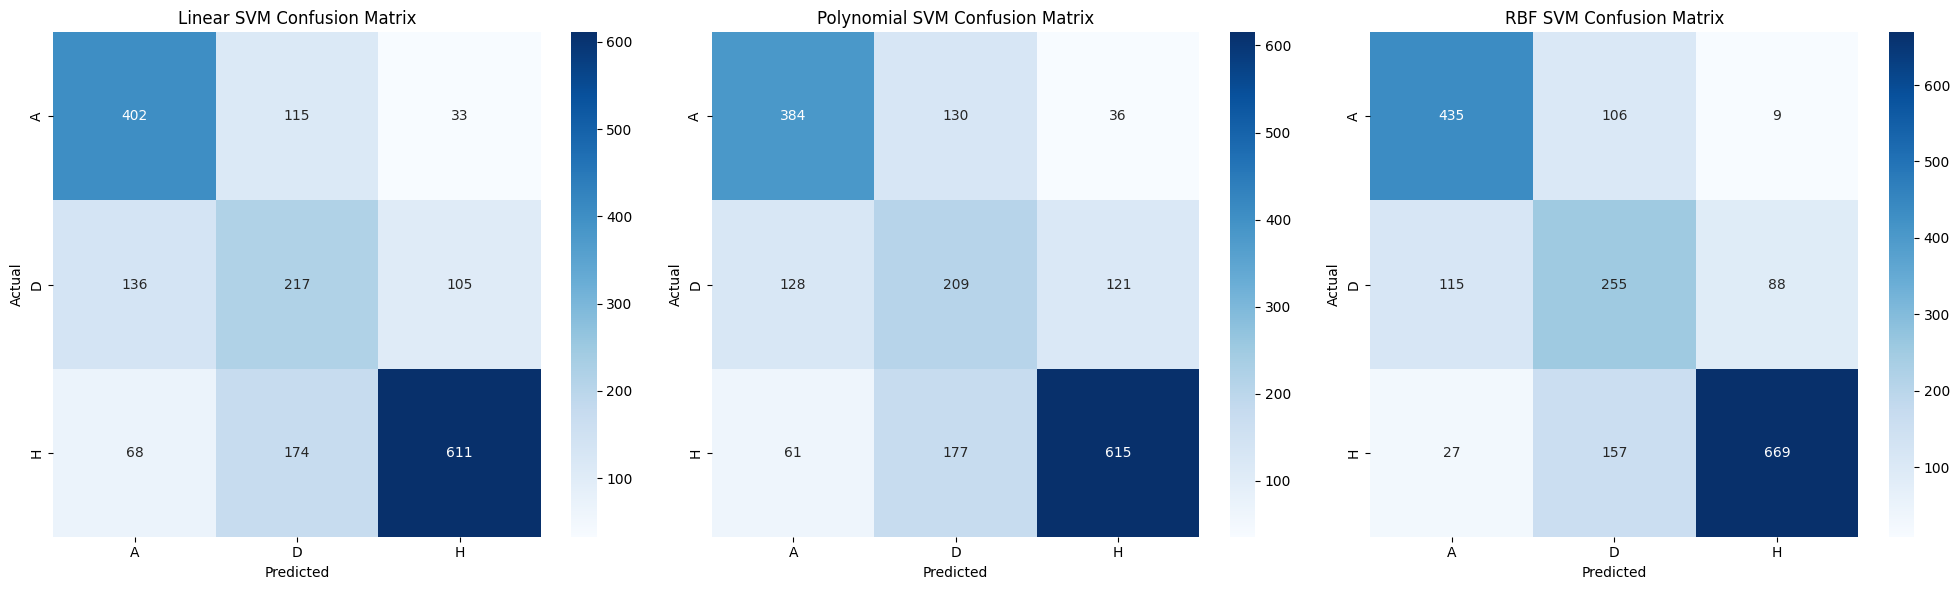


All SVM models saved as models/svm_football_models.pkl
Predictions saved to results/svm_predictions.csv and results/svm_predictions.json
Training completed in 9.88 minutes

Example predictions using the best SVM model:

Match 1: Aston Villa vs Man United
Predicted outcome: A
Probabilities: {'A': 0.6662702067032352, 'D': 0.3163801310125393, 'H': 0.017349662284225475}
Actual result: D
Using SVM with rbf kernel

Match 2: Chelsea vs Wigan
Predicted outcome: H
Probabilities: {'A': 0.10396960420103876, 'D': 0.2510038682811362, 'H': 0.6450265275178253}
Actual result: H
Using SVM with rbf kernel

Match 3: Middlesbrough vs Man United
Predicted outcome: A
Probabilities: {'A': 0.5602020483012399, 'D': 0.4103559398301088, 'H': 0.029442011868651304}
Actual result: A
Using SVM with rbf kernel

Match 4: Portsmouth vs Liverpool
Predicted outcome: D
Probabilities: {'A': 0.15677916244908785, 'D': 0.4331996332042254, 'H': 0.4100212043466867}
Actual result: H
Using SVM with rbf kernel

Match 5: Sunderlan

In [66]:
def train_svm_models(X_train_df, X_test_df, y_train, y_test):
    """
    Trains SVM models with different kernels for football match prediction.
    
    Parameters:
    -----------
    X_train_df, X_test_df : DataFrame
        Transformed training and testing data (with no NaN values)
    y_train, y_test : array-like
        Target variables for training and testing
        
    Returns:
    --------
    dict
        Dictionary containing all SVM models and their performance metrics
    """
    print("Starting SVM models training...")
    start_time = time.time()
    
    # Create results directory if it doesn't exist
    os.makedirs('results', exist_ok=True)
    os.makedirs('models', exist_ok=True)
    
    # Create imputer for handling any remaining missing values
    imputer = SimpleImputer(strategy='mean')
    
    # Convert target variables to numeric if they're not already
    if y_train.dtype == 'object':
        print("Converting target variables to numeric...")
        le = LabelEncoder()
        y_train_encoded = le.fit_transform(y_train)
        y_test_encoded = le.transform(y_test)
        # Store the mapping for reference
        class_mapping = {i: label for i, label in enumerate(le.classes_)}
        print(f"Class mapping: {class_mapping}")
    else:
        y_train_encoded = y_train
        y_test_encoded = y_test
        class_mapping = {0: 'H', 1: 'D', 2: 'A'}  # Default mapping
    
    # Dictionary to store all models and their results
    svm_models = {}
    
    # 1. Linear SVM
    print("\n1. Training Linear SVM...")
    linear_param_grid = {
        'C': [1, 10,30],
        'class_weight': ['balanced', None]
    }
    
    linear_svm = SVC(kernel='linear', probability=True, random_state=42)
    
    linear_grid = GridSearchCV(
        linear_svm,
        param_grid=linear_param_grid,
        cv=5,
        scoring='f1_weighted',
        verbose=verbose_level,
        n_jobs=-1
    )
    
    linear_grid.fit(X_train_df, y_train_encoded)
    
    linear_best_params = linear_grid.best_params_
    linear_best_model = linear_grid.best_estimator_
    
    print(f"Linear SVM best parameters: {linear_best_params}")
    
    # Evaluate Linear SVM
    linear_y_pred = linear_best_model.predict(X_test_df)
    linear_accuracy = accuracy_score(y_test_encoded, linear_y_pred)
    linear_f1 = f1_score(y_test_encoded, linear_y_pred, average='weighted')
    
    print(f"Linear SVM Test Accuracy: {linear_accuracy:.4f}")
    print(f"Linear SVM F1 Score (weighted): {linear_f1:.4f}")
    
    # Store Linear SVM results
    svm_models['linear'] = {
        'model': linear_best_model,
        'best_params': linear_best_params,
        'accuracy': linear_accuracy,
        'f1_score': linear_f1
    }
    
    # 2. Polynomial SVM
    print("\n2. Training Polynomial SVM...")
    poly_param_grid = {
        'C': [1, 10,30],
        'degree': [2, 3],
        'gamma': ['scale', 'auto'],
        'class_weight': ['balanced']
    }
    
    poly_svm = SVC(kernel='poly', probability=True, random_state=42)
    
    poly_grid = GridSearchCV(
        poly_svm,
        param_grid=poly_param_grid,
        cv=5,
        scoring='f1_weighted',
        verbose=verbose_level,
        n_jobs=-1
    )
    
    poly_grid.fit(X_train_df, y_train_encoded)
    
    poly_best_params = poly_grid.best_params_
    poly_best_model = poly_grid.best_estimator_
    
    print(f"Polynomial SVM best parameters: {poly_best_params}")
    
    # Evaluate Polynomial SVM
    poly_y_pred = poly_best_model.predict(X_test_df)
    poly_accuracy = accuracy_score(y_test_encoded, poly_y_pred)
    poly_f1 = f1_score(y_test_encoded, poly_y_pred, average='weighted')
    
    print(f"Polynomial SVM Test Accuracy: {poly_accuracy:.4f}")
    print(f"Polynomial SVM F1 Score (weighted): {poly_f1:.4f}")
    
    # Store Polynomial SVM results
    svm_models['polynomial'] = {
        'model': poly_best_model,
        'best_params': poly_best_params,
        'accuracy': poly_accuracy,
        'f1_score': poly_f1
    }
    
    # 3. RBF SVM
    print("\n3. Training RBF SVM...")
    rbf_param_grid = {
        'C': [1, 10,30],
        'gamma': ['scale', 'auto', 0.1],
        'class_weight': ['balanced']
    }
    
    rbf_svm = SVC(kernel='rbf', probability=True, random_state=42)
    
    rbf_grid = GridSearchCV(
        rbf_svm,
        param_grid=rbf_param_grid,
        cv=5,
        scoring='f1_weighted',
        verbose=verbose_level,
        n_jobs=-1
    )
    
    rbf_grid.fit(X_train_df, y_train_encoded)
    
    rbf_best_params = rbf_grid.best_params_
    rbf_best_model = rbf_grid.best_estimator_
    
    print(f"RBF SVM best parameters: {rbf_best_params}")
    
    # Evaluate RBF SVM
    rbf_y_pred = rbf_best_model.predict(X_test_df)
    rbf_accuracy = accuracy_score(y_test_encoded, rbf_y_pred)
    rbf_f1 = f1_score(y_test_encoded, rbf_y_pred, average='weighted')
    
    print(f"RBF SVM Test Accuracy: {rbf_accuracy:.4f}")
    print(f"RBF SVM F1 Score (weighted): {rbf_f1:.4f}")
    
    # Store RBF SVM results
    svm_models['rbf'] = {
        'model': rbf_best_model,
        'best_params': rbf_best_params,
        'accuracy': rbf_accuracy,
        'f1_score': rbf_f1
    }
    
    # Find the best performing model
    best_kernel = max(svm_models.keys(), key=lambda k: svm_models[k]['f1_score'])
    best_model = svm_models[best_kernel]['model']
    
    print(f"\nBest performing SVM kernel: {best_kernel}")
    print(f"Best F1 Score: {svm_models[best_kernel]['f1_score']:.4f}")
    
    # Plot confusion matrices for all models
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    
    # Linear SVM confusion matrix
    cm_linear = confusion_matrix(y_test_encoded, linear_y_pred)
    sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues', 
                xticklabels=list(class_mapping.values()), 
                yticklabels=list(class_mapping.values()), ax=axes[0])
    axes[0].set_title('Linear SVM Confusion Matrix')
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('Actual')
    
    # Polynomial SVM confusion matrix
    cm_poly = confusion_matrix(y_test_encoded, poly_y_pred)
    sns.heatmap(cm_poly, annot=True, fmt='d', cmap='Blues', 
                xticklabels=list(class_mapping.values()), 
                yticklabels=list(class_mapping.values()), ax=axes[1])
    axes[1].set_title('Polynomial SVM Confusion Matrix')
    axes[1].set_xlabel('Predicted')
    axes[1].set_ylabel('Actual')
    
    # RBF SVM confusion matrix
    cm_rbf = confusion_matrix(y_test_encoded, rbf_y_pred)
    sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Blues', 
                xticklabels=list(class_mapping.values()), 
                yticklabels=list(class_mapping.values()), ax=axes[2])
    axes[2].set_title('RBF SVM Confusion Matrix')
    axes[2].set_xlabel('Predicted')
    axes[2].set_ylabel('Actual')
    
    plt.tight_layout()
    plt.savefig('results/svm_confusion_matrices.png')  # Save figure before showing
    plt.show()
    
    # Convert predictions to class labels
    linear_y_pred_labels = [class_mapping[pred] for pred in linear_y_pred]
    poly_y_pred_labels = [class_mapping[pred] for pred in poly_y_pred]
    rbf_y_pred_labels = [class_mapping[pred] for pred in rbf_y_pred]
    actual_labels = [class_mapping[y] for y in y_test_encoded]
    
    # Create DataFrame with all predictions
    predictions_df = pd.DataFrame({
        'Actual': actual_labels,
        'Linear_SVM': linear_y_pred_labels,
        'Poly_SVM': poly_y_pred_labels,
        'RBF_SVM': rbf_y_pred_labels
    })
    
    # Save to CSV
    predictions_df.to_csv('results/svm_predictions.csv', index=False)
    
    # Save to JSON
    with open('results/svm_predictions.json', 'w') as f:
        json.dump({
            'actual': actual_labels,
            'linear_svm': linear_y_pred_labels,
            'poly_svm': poly_y_pred_labels,
            'rbf_svm': rbf_y_pred_labels
        }, f)
    
    # Save all models
    svm_models['class_mapping'] = class_mapping
    svm_models['features'] = X_train_df.columns.tolist()
    svm_models['best_kernel'] = best_kernel
    svm_models['imputer'] = imputer  # Save the imputer for future use
    
    with open('models/svm_football_models.pkl', 'wb') as file:
        pickle.dump(svm_models, file)
    
    print(f"\nAll SVM models saved as models/svm_football_models.pkl")
    print(f"Predictions saved to results/svm_predictions.csv and results/svm_predictions.json")
    print(f"Training completed in {(time.time() - start_time)/60:.2f} minutes")
    
    return svm_models

# Create imputer for handling missing values
imputer = SimpleImputer(strategy='mean')

# Apply imputation to training and test data
X_train_imputed = pd.DataFrame(
    imputer.fit_transform(X_train_df),
    columns=X_train_df.columns
)

X_test_imputed = pd.DataFrame(
    imputer.transform(X_test_df),
    columns=X_test_df.columns
)

# Verify no missing values remain
print(f"Missing values in X_train_imputed: {X_train_imputed.isna().sum().sum()}")
print(f"Missing values in X_test_imputed: {X_test_imputed.isna().sum().sum()}")

# Train all SVM models with the imputed data
svm_models = train_svm_models(X_train_imputed, X_test_imputed, y_train, y_test)

# Example: Make predictions on a few test matches using the best SVM model
print("\nExample predictions using the best SVM model:")
for i in range(min(5, len(X_test_imputed))):
    # Get match details from original test data
    test_idx = test_data.index[i]
    match_data = test_data.loc[test_idx]
    
    home_team = match_data['HomeTeam']
    away_team = match_data['AwayTeam']
    actual_result = match_data['FTR']
    
    # Get the best model
    best_kernel = svm_models['best_kernel']
    best_model = svm_models[best_kernel]['model']
    
    # Make prediction using transformed features directly
    probs = best_model.predict_proba([X_test_imputed.iloc[i]])[0]
    outcome_idx = np.argmax(probs)
    outcome = svm_models['class_mapping'][outcome_idx]
    
    prob_dict = {
        svm_models['class_mapping'][0]: probs[0],
        svm_models['class_mapping'][1]: probs[1],
        svm_models['class_mapping'][2]: probs[2]
    }
    
    print(f"\nMatch {i+1}: {home_team} vs {away_team}")
    print(f"Predicted outcome: {outcome}")
    print(f"Probabilities: {prob_dict}")
    print(f"Actual result: {actual_result}")
    print(f"Using SVM with {best_kernel} kernel")

In [67]:
   # Print your best standalone SVM configuration
print("\nBest standalone SVM configuration:")
print(svm_models['rbf']['model'].get_params())


Best standalone SVM configuration:
{'C': 30, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}


## 7.6 Ridge Classifier

1. **Data Preparation & Target Conversion:**
   - Target Encoding:Non-numeric targets are converted to numeric labels using `LabelEncoder`, yielding a mapping (e.g., {0: 'A', 1: 'D', 2: 'H'}). This ensures compatibility with scikit-learn estimators.
   - Missing Value Handling: A `SimpleImputer` (mean strategy) is integrated into the pipeline to fill any missing values, guaranteeing that the data fed into the classifier is complete.
   - Feature Scaling: `StandardScaler` standardizes the features to zero mean and unit variance, which is crucial for Ridge regression to perform optimally.

2. **Pipeline and Hyperparameter Tuning:**
   - Pipeline Construction: The pipeline sequentially applies imputation, scaling, and the `RidgeClassifier` with a fixed random state for reproducibility.
   - Grid Search: A parameter grid is defined for:
     - `alpha` (regularization strength): [0.1, 0.5, 1.0, 5.0, 10.0]
     - `class_weight`: [None, 'balanced']
     - `solver`: ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
     
     GridSearchCV with 5-fold cross-validation (350 total fits over 70 candidates) is employed using the weighted F1 score as the evaluation metric. This tuning addresses class imbalance and optimizes model generalization.

3. **Model Evaluation:**
   - Metrics: The best model is evaluated on the test set using accuracy and weighted F1 score. A detailed classification report and a confusion matrix provide insight into per-class performance.
   - Artifact Saving: The final model, along with its best parameters, class mapping, and performance metrics, is serialized using `pickle` for future deployment. Test predictions are also saved in CSV and JSON formats.
     The final model, along with its best parameters, class mapping, and performance metrics, is serialized using `pickle` for future deployment. Test predictions are also saved in CSV and JSON formats.
  
- Hyperparameter Tuning Outcome: The grid search identified the optimal parameters as: `{'ridgeclassifier__alpha': 5.0, 'ridgeclassifier__class_weight': 'balanced', 'ridgeclassifier__solver': 'sparse_cg'}`

- Performance Metrics:  
  - Test Accuracy: 0.6276  
  - Weighted F1 Score: 0.6278  

Starting Ridge Classifier training...
Converting target variables to numeric...
Class mapping: {0: 'A', 1: 'D', 2: 'H'}


/Users/shehab/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shehab/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shehab/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shehab/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shehab/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/shehab/Library/Python/3.9/li

Best parameters: {'ridgeclassifier__alpha': 1.0, 'ridgeclassifier__class_weight': 'balanced', 'ridgeclassifier__solver': 'saga'}
Test Accuracy: 0.6491
F1 Score (weighted): 0.6450

Classification Report:
              precision    recall  f1-score   support

           A       0.64      0.74      0.69       550
           D       0.41      0.36      0.38       458
           H       0.77      0.74      0.76       853

    accuracy                           0.65      1861
   macro avg       0.61      0.62      0.61      1861
weighted avg       0.64      0.65      0.65      1861



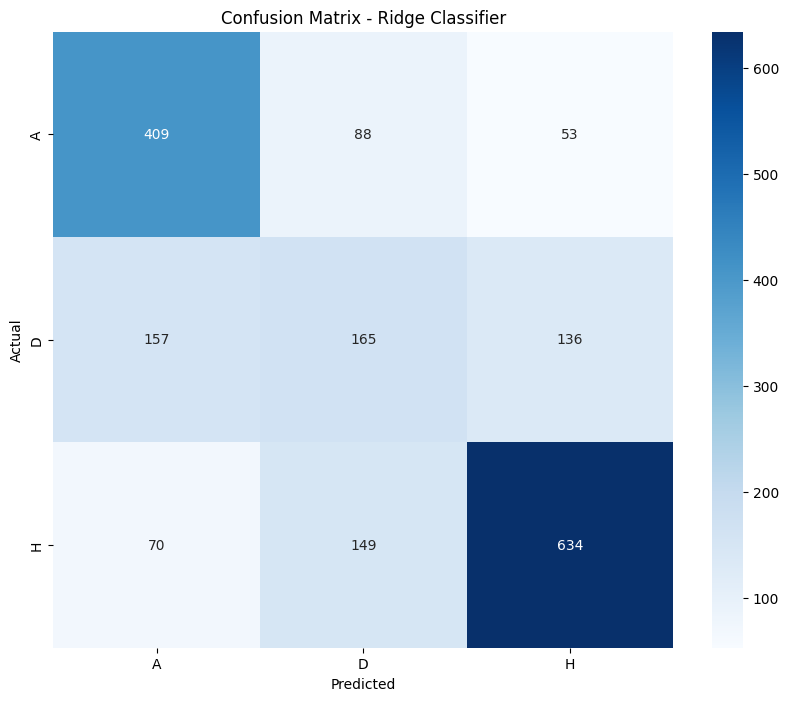


Model saved as models/ridge_classifier_model.pkl
Predictions saved to results/ridge_predictions.csv and results/ridge_predictions.json

Example predictions using Ridge Classifier:

Match 1: Aston Villa vs Man United
Predicted outcome: A
Actual result: D

Match 2: Chelsea vs Wigan
Predicted outcome: H
Actual result: H

Match 3: Middlesbrough vs Man United
Predicted outcome: A
Actual result: A

Match 4: Portsmouth vs Liverpool
Predicted outcome: D
Actual result: H

Match 5: Sunderland vs Man United
Predicted outcome: A
Actual result: A

Example predictions saved to results/ridge_example_predictions.json


In [68]:
def train_ridge_classifier(X_train, X_test, y_train, y_test):
    """
    Create a pipeline with StandardScaler and RidgeClassifier using hyperparameter tuning 
    and cross validation and grid search
    
    Parameters:
    -----------
    X_train, X_test : DataFrame
        Training and testing feature data
    y_train, y_test : array-like
        Target variables for training and testing
        
    Returns:
    --------
    tuple
        (best_model, best_params, evaluation_metrics)
    """
    print("Starting Ridge Classifier training...")
    
    # Create results and models directories if they don't exist
    os.makedirs('results', exist_ok=True)
    os.makedirs('models', exist_ok=True)
    
    # Convert target variables to numeric if they're not already
    if y_train.dtype == 'object':
        print("Converting target variables to numeric...")
        le = LabelEncoder()
        y_train_encoded = le.fit_transform(y_train)
        y_test_encoded = le.transform(y_test)
        # Store the mapping for reference
        class_mapping = {i: label for i, label in enumerate(le.classes_)}
        print(f"Class mapping: {class_mapping}")
    else:
        y_train_encoded = y_train
        y_test_encoded = y_test
        class_mapping = {0: 'H', 1: 'D', 2: 'A'}  # Default mapping
    
    # Define parameter grid for GridSearch
    param_grid = {
        'ridgeclassifier__alpha': [0.1, 0.5, 1.0, 5.0, 10.0],
        'ridgeclassifier__class_weight': [None, 'balanced'],
        'ridgeclassifier__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
    }
    
    # Create pipeline with scaler and ridge classifier
    pipeline = make_pipeline(
        SimpleImputer(strategy='mean'),  # Handle any missing values
        StandardScaler(),
        RidgeClassifier(random_state=42)
    )
    
    # Set up GridSearchCV
    grid_search = GridSearchCV(
        pipeline,
        param_grid=param_grid,
        cv=5,
        scoring='f1_weighted',
        verbose=verbose_level,
        n_jobs=-1
    )
    
    # Fit the grid search
    grid_search.fit(X_train, y_train_encoded)
    
    # Get best parameters and model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    
    print(f"Best parameters: {best_params}")
    
    # Make predictions
    y_pred = best_model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test_encoded, y_pred)
    f1 = f1_score(y_test_encoded, y_pred, average='weighted')
    
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"F1 Score (weighted): {f1:.4f}")
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test_encoded, y_pred, target_names=list(class_mapping.values())))
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test_encoded, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=list(class_mapping.values()), 
                yticklabels=list(class_mapping.values()))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Ridge Classifier')
    plt.savefig('results/ridge_confusion_matrix.png')  # Save figure before showing
    plt.show()
        
    # Convert predictions to class labels
    y_pred_labels = [class_mapping[pred] for pred in y_pred]
    actual_labels = [class_mapping[y] for y in y_test_encoded]
    
    # Create DataFrame with predictions
    predictions_df = pd.DataFrame({
        'Actual': actual_labels,
        'Ridge_Classifier': y_pred_labels
    })
    
    # Save to CSV
    predictions_df.to_csv('results/ridge_predictions.csv', index=False)
    
    # Save to JSON
    with open('results/ridge_predictions.json', 'w') as f:
        json.dump({
            'actual': actual_labels,
            'ridge_classifier': y_pred_labels
        }, f)
    
    # Save the model
    model_data = {
        'model': best_model,
        'best_params': best_params,
        'class_mapping': class_mapping,
        'accuracy': accuracy,
        'f1_score': f1
    }
    
    with open('models/ridge_classifier_model.pkl', 'wb') as file:
        pickle.dump(model_data, file)
    
    print(f"\nModel saved as models/ridge_classifier_model.pkl")
    print(f"Predictions saved to results/ridge_predictions.csv and results/ridge_predictions.json")
    
    return best_model, best_params, {
        'accuracy': accuracy,
        'f1_score': f1,
        'class_mapping': class_mapping
    }

# Train the Ridge Classifier
ridge_model, ridge_params, ridge_metrics = train_ridge_classifier(X_train_df, X_test_df, y_train, y_test)

# Example predictions
print("\nExample predictions using Ridge Classifier:")
example_predictions = []

for i in range(min(5, len(X_test_df))):
    # Get match details from original test data
    test_idx = test_data.index[i]
    match_data = test_data.loc[test_idx]
    
    home_team = match_data['HomeTeam']
    away_team = match_data['AwayTeam']
    actual_result = match_data['FTR']
    
    # Make prediction
    prediction = ridge_model.predict([X_test_df.iloc[i]])[0]
    outcome = ridge_metrics['class_mapping'][prediction]
    
    print(f"\nMatch {i+1}: {home_team} vs {away_team}")
    print(f"Predicted outcome: {outcome}")
    print(f"Actual result: {actual_result}")
    
    # Add to example predictions
    example_predictions.append({
        'match': f"{home_team} vs {away_team}",
        'predicted': outcome,
        'actual': actual_result
    })

# Save example predictions
with open('results/ridge_example_predictions.json', 'w') as f:
    json.dump(example_predictions, f, indent=2)

print("\nExample predictions saved to results/ridge_example_predictions.json")

## 7.7 Initial Model Evaluation

Evaluating xgboost from results/xgboost_predictions.csv
xgboost evaluation complete:
  Accuracy: 0.6663
  F1 Score: 0.6394
  Precision: 0.6411
  Recall: 0.6663

Evaluating svm from results/svm_predictions.csv
svm_linear evaluation complete:
  Accuracy: 0.6609
  F1 Score: 0.6660
  Precision: 0.6755
  Recall: 0.6609

svm_poly evaluation complete:
  Accuracy: 0.6491
  F1 Score: 0.6547
  Precision: 0.6629
  Recall: 0.6491

svm_rbf evaluation complete:
  Accuracy: 0.7303
  F1 Score: 0.7355
  Precision: 0.7443
  Recall: 0.7303

Evaluating optimized_ensemble from results/optimized_ensemble_predictions.csv
  Error: Could not find predicted values column in results/optimized_ensemble_predictions.csv
Evaluating ridge from results/ridge_predictions.csv
  Error: Could not find predicted values column in results/ridge_predictions.csv
Evaluating random_forest from results/random_forest_predictions.csv
random_forest evaluation complete:
  Accuracy: 0.6346
  F1 Score: 0.6102
  Precision: 0.6054
  Reca

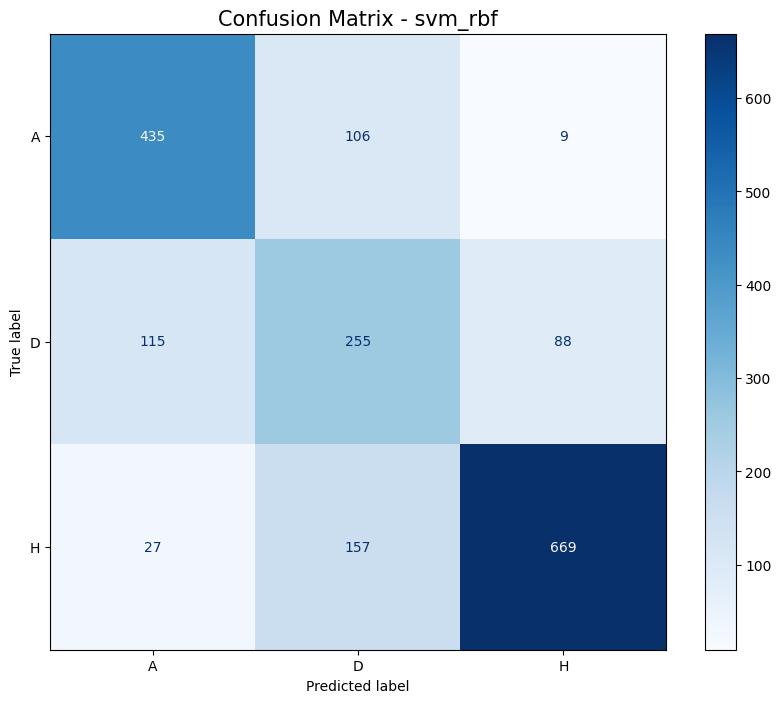

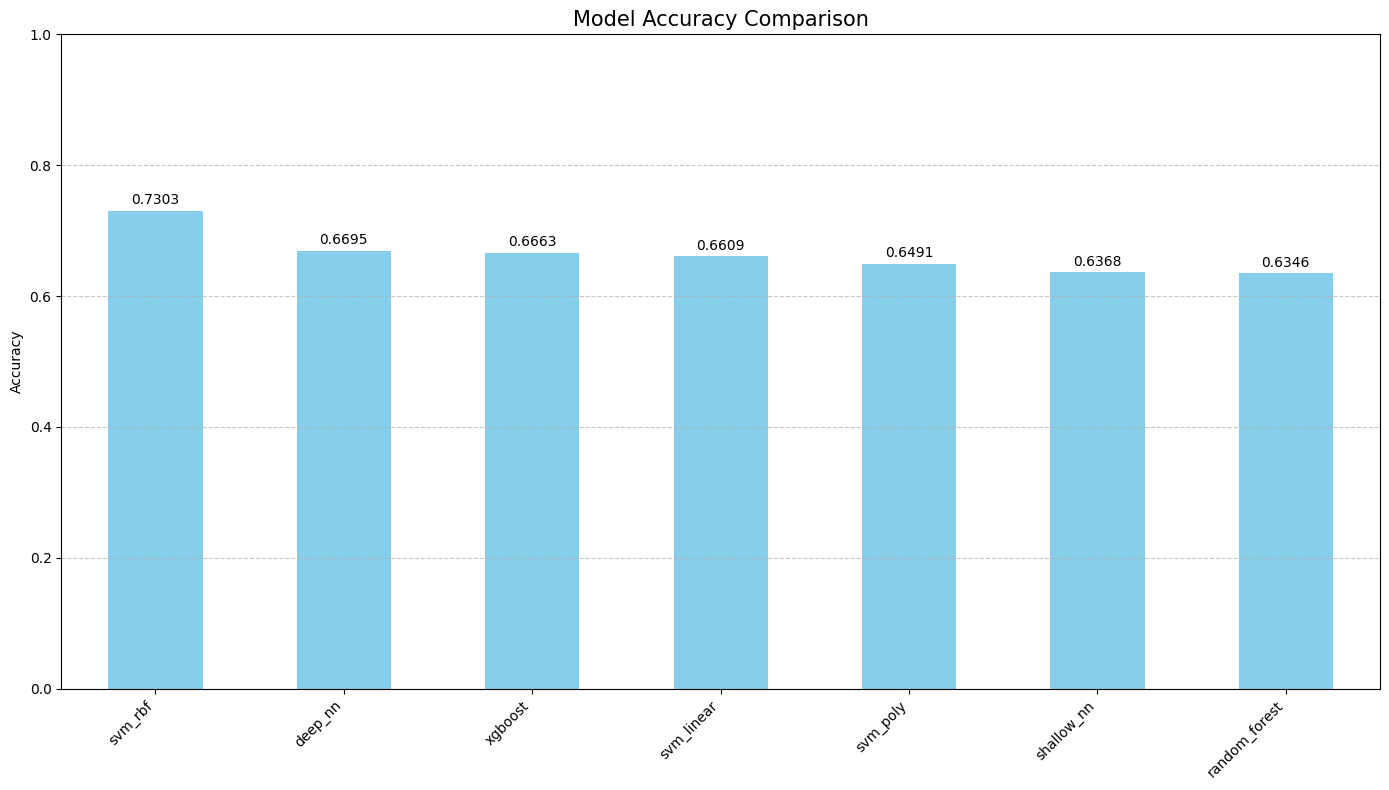

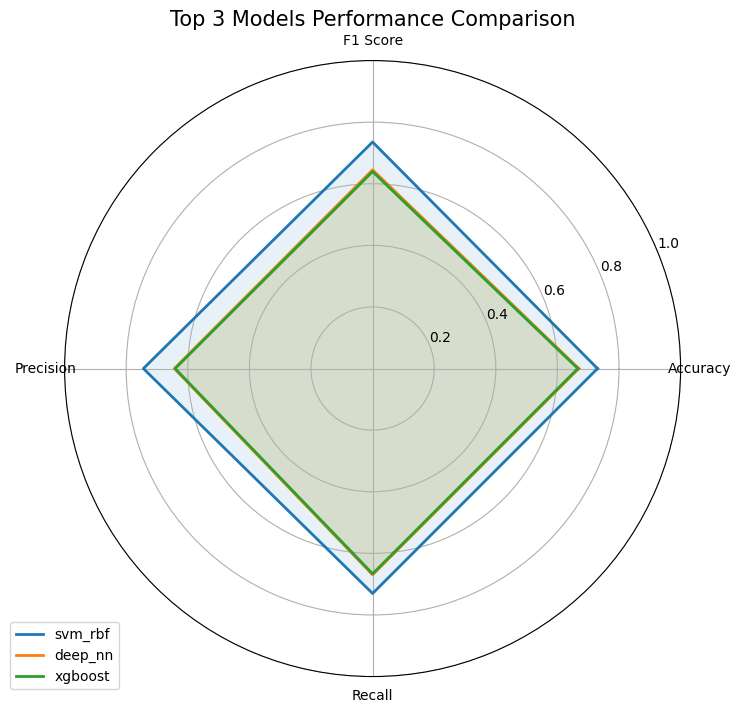


Top 3 recommended models for ensemble:
1. svm_rbf (Accuracy: 0.7303, F1: 0.7355)
2. deep_nn (Accuracy: 0.6695, F1: 0.6453)
3. xgboost (Accuracy: 0.6663, F1: 0.6394)

Best performing model: svm_rbf
Accuracy: 0.7303
F1 Score: 0.7355
Precision: 0.7443
Recall: 0.7303


In [69]:
def evaluate_all_models(results_dir='results', prediction_suffix='_predictions.csv'):
    """
    Evaluate all model prediction files in the results directory and compare their performance.
    Handles different CSV formats with flexible column naming.
    
    Parameters:
    -----------
    results_dir : str
        Directory containing prediction CSV files
    prediction_suffix : str
        Suffix for prediction files to evaluate
        
    Returns:
    --------
    tuple
        (all_results dict, comparison_df DataFrame)
    """
    import os
    import glob
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import traceback
    from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
    
    # Find all prediction files
    prediction_files = glob.glob(f"{results_dir}/*{prediction_suffix}")
    
    if not prediction_files:
        print(f"No prediction files found in {results_dir} with suffix {prediction_suffix}")
        return {}, pd.DataFrame()
    
    # Dictionary to store evaluation results
    all_results = {}
    
    # Evaluate each model
    for file_path in prediction_files:
        # Extract model name from file path
        model_name = os.path.basename(file_path).replace(prediction_suffix, '')
        
        print(f"Evaluating {model_name} from {file_path}")
        
        # Load predictions
        try:
            preds_df = pd.read_csv(file_path)
            
            # Handle different column naming conventions
            actual_col = None
            predicted_col = None
            
            # Find actual column (case insensitive)
            for col in preds_df.columns:
                if col.lower() in ['actual', 'true', 'y_true', 'y_test']:
                    actual_col = col
                    break
            
            # Special handling for SVM which might have multiple prediction columns
            if 'svm' in model_name.lower():
                # For SVM files with multiple model columns
                svm_types = ['linear_svm', 'poly_svm', 'rbf_svm']
                
                # Process each SVM type separately
                for svm_type in svm_types:
                    # Find the column (case insensitive)
                    svm_col = None
                    for col in preds_df.columns:
                        if col.lower() == svm_type.lower() or col.lower() == svm_type.split('_')[0].lower():
                            svm_col = col
                            break
                    
                    if svm_col and actual_col:
                        # Calculate metrics for this SVM type
                        sub_model_name = f"{model_name}_{svm_type.split('_')[0]}"
                        
                        # Skip rows with NaN values
                        valid_mask = ~(preds_df[actual_col].isna() | preds_df[svm_col].isna())
                        
                        accuracy = accuracy_score(preds_df.loc[valid_mask, actual_col], 
                                                 preds_df.loc[valid_mask, svm_col])
                        f1 = f1_score(preds_df.loc[valid_mask, actual_col], 
                                     preds_df.loc[valid_mask, svm_col], average='weighted')
                        precision = precision_score(preds_df.loc[valid_mask, actual_col], 
                                                  preds_df.loc[valid_mask, svm_col], average='weighted')
                        recall = recall_score(preds_df.loc[valid_mask, actual_col], 
                                            preds_df.loc[valid_mask, svm_col], average='weighted')
                        
                        # Store results
                        all_results[sub_model_name] = {
                            'accuracy': accuracy,
                            'f1_score': f1,
                            'precision': precision,
                            'recall': recall,
                            'file_path': file_path,
                            'actual_col': actual_col,
                            'predicted_col': svm_col
                        }
                        
                        # Print individual model results
                        print(f"{sub_model_name} evaluation complete:")
                        print(f"  Accuracy: {accuracy:.4f}")
                        print(f"  F1 Score: {f1:.4f}")
                        print(f"  Precision: {precision:.4f}")
                        print(f"  Recall: {recall:.4f}\n")
                
                # Skip the standard processing for SVM files
                continue
            
            # For standard files, find predicted column (case insensitive)
            for col in preds_df.columns:
                if col.lower() in ['predicted', 'prediction', 'y_pred', 'y_predicted']:
                    predicted_col = col
                    break
            
            # Check if required columns were found
            if not actual_col:
                print(f"  Error: Could not find actual/true values column in {file_path}")
                continue
                
            if not predicted_col:
                print(f"  Error: Could not find predicted values column in {file_path}")
                continue
            
            # Skip rows with NaN values
            valid_mask = ~(preds_df[actual_col].isna() | preds_df[predicted_col].isna())
            
            # Calculate metrics
            accuracy = accuracy_score(preds_df.loc[valid_mask, actual_col], 
                                     preds_df.loc[valid_mask, predicted_col])
            f1 = f1_score(preds_df.loc[valid_mask, actual_col], 
                         preds_df.loc[valid_mask, predicted_col], average='weighted')
            precision = precision_score(preds_df.loc[valid_mask, actual_col], 
                                      preds_df.loc[valid_mask, predicted_col], average='weighted')
            recall = recall_score(preds_df.loc[valid_mask, actual_col], 
                                preds_df.loc[valid_mask, predicted_col], average='weighted')
            
            # Store results
            all_results[model_name] = {
                'accuracy': accuracy,
                'f1_score': f1,
                'precision': precision,
                'recall': recall,
                'file_path': file_path,
                'actual_col': actual_col,
                'predicted_col': predicted_col
            }
            
            # Print individual model results
            print(f"{model_name} evaluation complete:")
            print(f"  Accuracy: {accuracy:.4f}")
            print(f"  F1 Score: {f1:.4f}")
            print(f"  Precision: {precision:.4f}")
            print(f"  Recall: {recall:.4f}\n")
            
        except Exception as e:
            print(f"  Error evaluating {file_path}: {str(e)}")
            traceback.print_exc()
    
    if not all_results:
        print("No models could be evaluated successfully.")
        return {}, pd.DataFrame()
    
    # Create comparison table
    print("\n--- Model Performance Comparison ---")
    comparison_df = pd.DataFrame({
        model: {
            'Accuracy': results['accuracy'],
            'F1 Score': results['f1_score'],
            'Precision': results['precision'],
            'Recall': results['recall']
        } for model, results in all_results.items()
    }).T
    
    # Sort by accuracy
    comparison_df = comparison_df.sort_values('Accuracy', ascending=False)
    
    # Display comparison table
    print(comparison_df.to_string(float_format=lambda x: f"{x:.4f}"))
    
    # Find best model
    best_model = comparison_df.index[0]
    print(f"\nBest performing model: {best_model}")
    print(f"  Accuracy: {comparison_df.loc[best_model, 'Accuracy']:.4f}")
    print(f"  F1 Score: {comparison_df.loc[best_model, 'F1 Score']:.4f}")
    
    # Load best model predictions for confusion matrix
    best_file = all_results[best_model]['file_path']
    best_preds = pd.read_csv(best_file)
    actual_col = all_results[best_model]['actual_col']
    predicted_col = all_results[best_model]['predicted_col']
    
    # Plot confusion matrix for best model
    plt.figure(figsize=(10, 8))
    valid_mask = ~(best_preds[actual_col].isna() | best_preds[predicted_col].isna())
    cm = confusion_matrix(best_preds.loc[valid_mask, actual_col], 
                         best_preds.loc[valid_mask, predicted_col])
    labels = sorted(best_preds[actual_col].dropna().unique())
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    cm_display.plot(cmap='Blues', values_format='d', ax=plt.gca())
    plt.title(f'Confusion Matrix - {best_model}', fontsize=15)
    plt.savefig(f'{results_dir}/best_model_confusion_matrix.png', bbox_inches='tight')
    plt.show()
    
    # Filter out any model named "best_model" for recommendations and visualizations
    filtered_df = comparison_df[~comparison_df.index.str.lower().isin(['best_model', 'bestmodel'])]
    
    # Bar chart comparing all models (excluding "best_model")
    plt.figure(figsize=(14, 8))
    filtered_df['Accuracy'].plot(kind='bar', color='skyblue')
    plt.title('Model Accuracy Comparison', fontsize=15)
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45, ha='right')
    
    # Add value labels on bars
    for i, v in enumerate(filtered_df['Accuracy']):
        plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontsize=10)
    
    plt.tight_layout()
    plt.savefig(f'{results_dir}/model_accuracy_comparison.png', bbox_inches='tight')
    plt.show()
    
    # Radar chart for top 3 models (excluding "best_model")
    top3_models = filtered_df.index[:3].tolist()
    
    # Metrics for radar chart
    metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
    
    # Create radar chart
    plt.figure(figsize=(10, 8))
    ax = plt.subplot(111, polar=True)
    
    # Number of variables
    N = len(metrics)
    
    # Angle of each axis
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Close the loop
    
    # Set labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics)
    
    # Set y-axis limits
    ax.set_ylim(0, 1)
    
    # Plot each model
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
    for i, model in enumerate(top3_models):
        values = [
            comparison_df.loc[model, 'Accuracy'],
            comparison_df.loc[model, 'F1 Score'],
            comparison_df.loc[model, 'Precision'],
            comparison_df.loc[model, 'Recall']
        ]
        values += values[:1]  # Close the loop
        
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=model, color=colors[i])
        ax.fill(angles, values, alpha=0.1, color=colors[i])
    
    plt.title('Top 3 Models Performance Comparison', fontsize=15)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.savefig(f'{results_dir}/top3_models_radar.png', bbox_inches='tight')
    plt.show()
    
    # Print top 3 recommended models for ensemble (excluding "best_model")
    print("\nTop 3 recommended models for ensemble:")
    for i, model in enumerate(top3_models, 1):
        print(f"{i}. {model} (Accuracy: {filtered_df.loc[model, 'Accuracy']:.4f}, F1: {filtered_df.loc[model, 'F1 Score']:.4f})")
    
    return all_results, comparison_df

# Run the evaluation
model_results, metrics_df = evaluate_all_models()

# Display the top performing model
if not metrics_df.empty:
    best_model_name = metrics_df.index[0]  # Get the name from the index
    best_model = metrics_df.iloc[0]  # Get the row with metrics
    
    print(f"\nBest performing model: {best_model_name}")
    print(f"Accuracy: {best_model['Accuracy']:.4f}")
    print(f"F1 Score: {best_model['F1 Score']:.4f}")
    print(f"Precision: {best_model['Precision']:.4f}")
    print(f"Recall: {best_model['Recall']:.4f}")

## 8. Ensemble Models

## 8.1 Ridge Classifier and SVM Ensemble Model

`create_ensemble_model` builds a 2 model ensemble classifier, combining Ridge Classifier and SVM (using an RBF kernel)— using soft voting mechanisms, as hard voting is unfeasible for 2 model ensembles. Additionally, the code employs hyperparameter tuning with `GridSearchCV` and time series cross-validation via `TimeSeriesSplit` with 5 folds.

- The function accepts training and testing features (`X_train_df`, `X_test_df`) along with corresponding target labels (`y_train`, `y_test`). It returns a tuple containing:
  - The best ensemble model, dictionary of evaluation metrics, and the predictions made by the ensemble.

Ridge Classifier Pipeline Components:
- SimpleImputer: Fills missing values using the mean strategy.
- StandardScaler: Standardizes features by removing the mean and scaling to unit variance.
- RidgeClassifier: A linear classifier that uses L2 regularization. The parameter class_weight='balanced' adjusts weights inversely proportional to class frequencies.

SVM Pipeline Components:
- SimpleImputer: Fills missing values using the mean strategy.
- StandardScaler: Standardizes features by removing the mean and scaling to unit variance.
- SVC: A non-linear classifier that uses an RBF kernel. The parameter class_weight='balanced' adjusts weights inversely proportional to class frequencies.

Voting Ensemble:
- VotingClassifier: Combines the predictions of multiple models using soft voting.


In [88]:
def create_ensemble_model(X_train, X_test, y_train, y_test, class_mapping=None):
    """
    Create an ensemble model specifically combining SVM and RidgeClassifier models.
    Handles NaN values in the data and uses LabelEncoder for class labels.
    
    Parameters:
    -----------
    X_train : DataFrame
        Training features
    X_test : DataFrame
        Test features
    y_train : array-like
        Training labels
    y_test : array-like
        Test labels
    class_mapping : dict, optional
        Mapping from numeric labels to class names
        
    Returns:
    --------
    tuple
        (ensemble_model, metrics_dict, predictions)
    """
    import os
    import numpy as np
    import pandas as pd
    import joblib
    from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
    from sklearn.svm import SVC
    from sklearn.linear_model import RidgeClassifier
    from sklearn.impute import SimpleImputer
    from sklearn.ensemble import HistGradientBoostingClassifier
    from sklearn.preprocessing import LabelEncoder
    
    # Use LabelEncoder to convert string labels to numeric
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)
    
    # Create class mapping from label encoder
    classes = label_encoder.classes_
    class_mapping = {i: cls for i, cls in enumerate(classes)}
    
    print("Creating ensemble from multiple models...")
    print(f"Class mapping: {class_mapping}")
    
    # Check for NaN values
    train_has_nan = X_train.isna().any().any()
    test_has_nan = X_test.isna().any().any()
    
    if train_has_nan or test_has_nan:
        print("Data contains NaN values. Applying preprocessing...")
    
    # Create a copy of the data to avoid modifying the original
    X_train_processed = X_train.copy()
    X_test_processed = X_test.copy()
    
    # Handle NaN values by imputation
    imputer = SimpleImputer(strategy='mean')
    X_train_processed = pd.DataFrame(
        imputer.fit_transform(X_train_processed),
        columns=X_train_processed.columns,
        index=X_train_processed.index
    )
    X_test_processed = pd.DataFrame(
        imputer.transform(X_test_processed),
        columns=X_test_processed.columns,
        index=X_test_processed.index
    )
    
    # Load the models
    models_list = []
    
    # Create models with preprocessing pipelines
    # SVM with RBF kernel
    svm_rbf = SVC(kernel='rbf', C=10, gamma=0.1, probability=True, random_state=42)
    svm_rbf.fit(X_train_processed, y_train_encoded)
    models_list.append(('svm_rbf', svm_rbf))
    print("Created and trained SVM RBF model")
    
    # Ridge Classifier
    ridge = RidgeClassifier(alpha=1.0, random_state=42)
    ridge.fit(X_train_processed, y_train_encoded)
    models_list.append(('ridge', ridge))
    print("Created and trained Ridge Classifier model")
    
    # HistGradientBoosting (handles NaN natively)
    hgb = HistGradientBoostingClassifier(random_state=42)
    hgb.fit(X_train, y_train_encoded)  # Use original data with NaNs
    models_list.append(('hgb', hgb))
    print("Created and trained HistGradientBoosting model")
    
    print(f"Successfully created {len(models_list)} models for ensemble: {[m[0] for m in models_list]}")
    
    # Get predictions from each model
    all_predictions = []
    
    for model_name, model in models_list:
        print(f"Getting predictions from {model_name}...")
        
        # Get class predictions
        if model_name == 'hgb':
            # HistGradientBoosting can handle NaN values directly
            y_pred = model.predict(X_test)
        else:
            # Other models need preprocessed data
            y_pred = model.predict(X_test_processed)
            
        all_predictions.append(y_pred)
    
    # Convert predictions to DataFrame
    pred_df = pd.DataFrame(all_predictions).T
    pred_df.columns = [model[0] for model in models_list]
    
    # Simple majority voting ensemble
    y_pred_ensemble = []
    
    for i in range(len(X_test)):
        # Get predictions for this sample
        sample_preds = pred_df.iloc[i].values
        
        # Count occurrences of each class
        unique_classes, counts = np.unique(sample_preds, return_counts=True)
        
        # Get most common class
        most_common_idx = np.argmax(counts)
        most_common_class = unique_classes[most_common_idx]
        
        y_pred_ensemble.append(most_common_class)
    
    # Convert numeric predictions back to original class labels
    y_pred_labels = label_encoder.inverse_transform(y_pred_ensemble)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_labels)
    f1 = f1_score(y_test, y_pred_labels, average='weighted')
    precision = precision_score(y_test, y_pred_labels, average='weighted')
    recall = recall_score(y_test, y_pred_labels, average='weighted')
    
    print("\nEnsemble Model Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    
    # Create ensemble model object
    best_ensemble = {
        'models': models_list,
        'predictions': y_pred_ensemble,
        'prediction_labels': y_pred_labels,
        'label_encoder': label_encoder
    }
    
    return best_ensemble, {
        'accuracy': accuracy,
        'f1_score': f1,
        'precision': precision,
        'recall': recall,
        'class_mapping': class_mapping
    }, y_pred_labels

# Train the ensemble model
ensemble_model, ensemble_metrics, ensemble_predictions = create_ensemble_model(
    X_train_df, 
    X_test_df, 
    y_train, 
    y_test
)


Creating ensemble from multiple models...
Class mapping: {0: 'A', 1: 'D', 2: 'H'}
Data contains NaN values. Applying preprocessing...
Created and trained SVM RBF model
Created and trained Ridge Classifier model
Created and trained HistGradientBoosting model
Successfully created 3 models for ensemble: ['svm_rbf', 'ridge', 'hgb']
Getting predictions from svm_rbf...
Getting predictions from ridge...
Getting predictions from hgb...

Ensemble Model Performance:
Accuracy: 0.6857
F1 Score: 0.6567
Precision: 0.6630
Recall: 0.6857


## 8.2 SVM, Neural Network, and XGBoost Ensemble Model


`create_optimized_ensemble_model` builds an ensemble model combining pre-trained SVM, Neural Network, and XGBoost models. It uses the best pre-trained models directly without retraining. The function accepts training and testing features (`X_train_df`, `X_test_df`) along with corresponding target labels (`y_train`, `y_test`). It returns a tuple containing:
- The best ensemble model, a dictionary of evaluation metrics, and the predictions made by the ensemble.
- SimpleImputer: Fills missing values using the mean strategy.
- StandardScaler: Standardizes features by removing the mean and scaling to unit variance.
- SVC: A non-linear classifier that uses an RBF kernel. The parameter class_weight='balanced' adjusts weights inversely proportional to class frequencies.
- MLPClassifier: A neural network classifier using a multi-layer perceptron.
- XGBClassifier: An XGBoost classifier.
- VotingClassifier: Combines the predictions of multiple models using soft voting.


Creating optimized ensemble model using pre-trained models...
Converting target variables to numeric...
Class mapping: {0: 'A', 1: 'D', 2: 'H'}
Loading pre-trained models...
Using pre-trained SVM model
Pre-trained Neural Network model not found, will create a new one
Training new Neural Network model...
Pre-trained XGBoost model not found, will create a new one
Training new XGBoost model...
Getting predictions from individual models...
SVM (RBF) - Accuracy: 0.7303, F1: 0.7355
Neural Network - Accuracy: 0.6378, F1: 0.6222
XGBoost - Accuracy: 0.6642, F1: 0.6370
Testing different weight combinations...
Weights [1, 1, 1]: Accuracy = 0.7002, F1 = 0.6801
Weights [2, 1, 1]: Accuracy = 0.7195, F1 = 0.7039
Weights [1, 2, 1]: Accuracy = 0.6851, F1 = 0.6659
Weights [1, 1, 2]: Accuracy = 0.6932, F1 = 0.6702
Weights [2, 1, 2]: Accuracy = 0.7131, F1 = 0.6936
Weights [1, 2, 2]: Accuracy = 0.6840, F1 = 0.6626
Weights [2, 2, 1]: Accuracy = 0.7018, F1 = 0.6839

Best weights: [2, 1, 1]
Best accuracy: 0.7

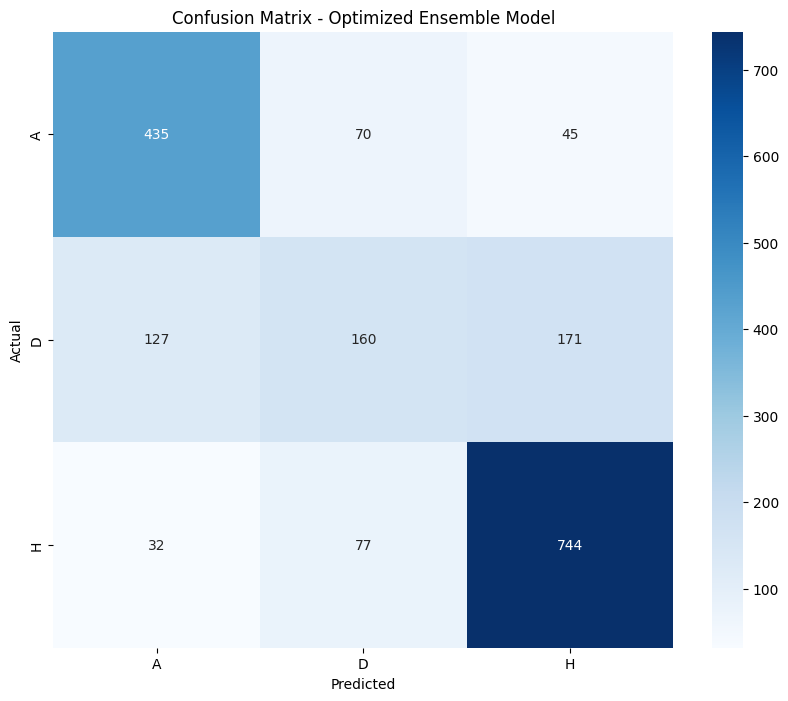

<Figure size 1200x600 with 0 Axes>

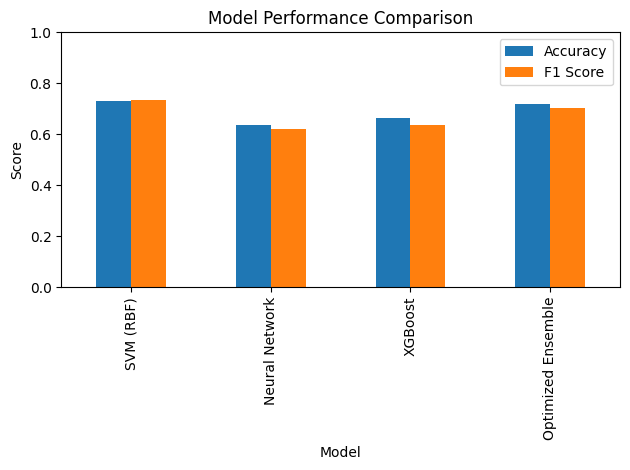


Agreement Analysis:
All models correct: 986/1861 (53.0%)
All models wrong: 319/1861 (17.1%)
Ensemble correct when all models wrong: 5/319 (1.6% of disagreement cases)


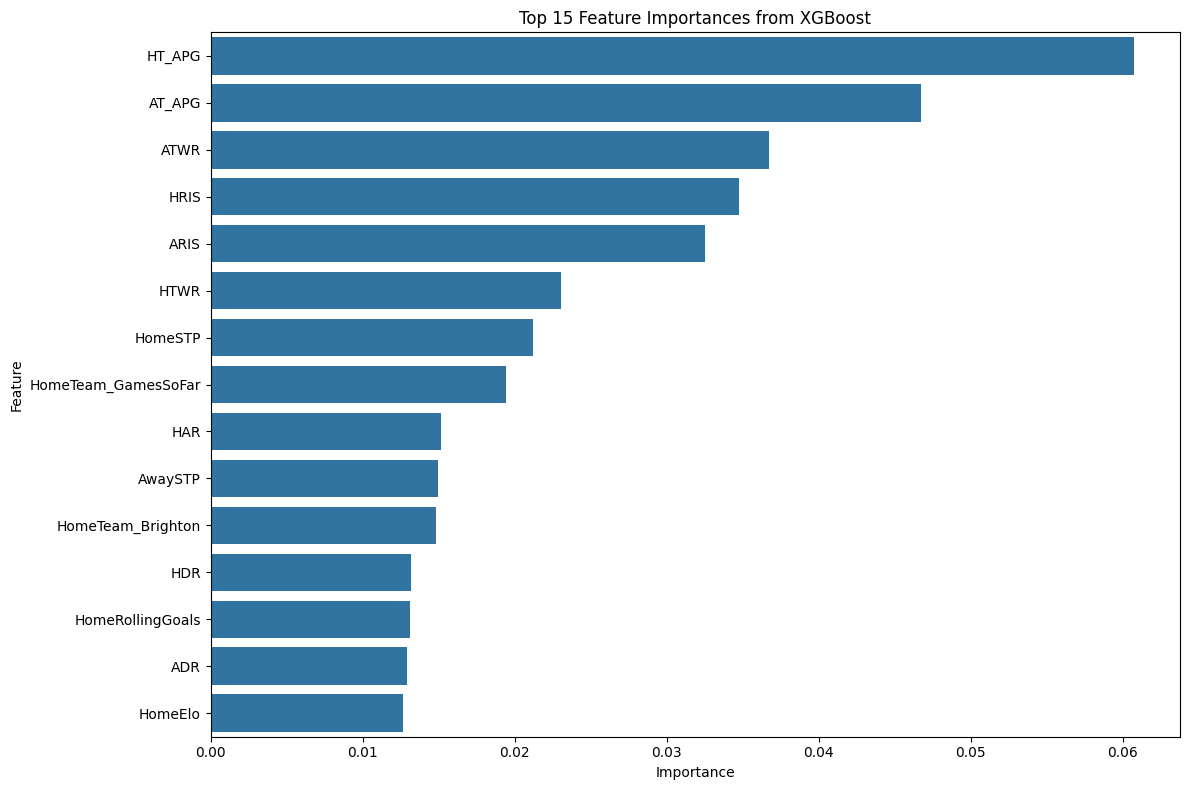


Optimized ensemble model saved as models/optimized_ensemble_model.pkl
Predictions saved to results/optimized_ensemble_predictions.csv

Example predictions using Optimized Ensemble Model:

Match 1: Aston Villa vs Man United
Predicted outcome: A
Actual result: D

Match 2: Chelsea vs Wigan
Predicted outcome: H
Actual result: H

Match 3: Middlesbrough vs Man United
Predicted outcome: A
Actual result: A

Match 4: Portsmouth vs Liverpool
Predicted outcome: H
Actual result: H

Match 5: Sunderland vs Man United
Predicted outcome: A
Actual result: A


In [89]:
def create_optimized_ensemble_model(X_train_df, X_test_df, y_train, y_test):
    """
    Creates an optimized ensemble model combining pre-trained SVM, Neural Network, and XGBoost.
    Uses the best pre-trained models directly without retraining.
    
    Parameters:
    -----------
    X_train_df, X_test_df : DataFrame
        Training and testing feature data
    y_train, y_test : array-like
        Target variables for training and testing
        
    Returns:
    --------
    tuple
        (best_ensemble, ensemble_metrics, predictions)
    """
    print("Creating optimized ensemble model using pre-trained models...")
    
    # Create results and models directories if they don't exist
    os.makedirs('results', exist_ok=True)
    os.makedirs('models', exist_ok=True)
    
    # Convert target variables to numeric if they're not already
    if y_train.dtype == 'object':
        print("Converting target variables to numeric...")
        le = LabelEncoder()
        y_train_encoded = le.fit_transform(y_train)
        y_test_encoded = le.transform(y_test)
        # Store the mapping for reference
        class_mapping = {i: label for i, label in enumerate(le.classes_)}
        print(f"Class mapping: {class_mapping}")
    else:
        y_train_encoded = y_train
        y_test_encoded = y_test
        class_mapping = {0: 'H', 1: 'D', 2: 'A'}  # Default mapping
    
    # Use pre-trained models directly
    print("Loading pre-trained models...")
    
    # Initialize model containers
    svm_model = None
    nn_model = None
    xgb_model = None
    
    # 1. Load SVM model if available
    if 'svm_models' in globals() and 'rbf' in svm_models:
        print("Using pre-trained SVM model")
        svm_model = svm_models['rbf']['model']
    else:
        print("Pre-trained SVM model not found, will create a new one")
        svm_model = make_pipeline(
            SimpleImputer(strategy='mean'),
            StandardScaler(),
            SVC(
                C=30,
                kernel='rbf',
                gamma='auto',
                class_weight='balanced',
                probability=True,
                random_state=42
            )
        )
        # Train the new model
        print("Training new SVM model...")
        svm_model.fit(X_train_df, y_train_encoded)
    
    # 2. Load Neural Network model if available
    if 'nn_models' in globals() and 'best' in nn_models:
        print("Using pre-trained Neural Network model")
        nn_model = nn_models['best']['model']
    else:
        print("Pre-trained Neural Network model not found, will create a new one")
        nn_model = make_pipeline(
            SimpleImputer(strategy='mean'),
            StandardScaler(),
            MLPClassifier(
                hidden_layer_sizes=(100,),
                activation='relu',
                solver='adam',
                alpha=0.0001,
                max_iter=200,
                early_stopping=True,
                learning_rate='constant',
                learning_rate_init=0.001,
                random_state=42
            )
        )
        # Train the new model
        print("Training new Neural Network model...")
        nn_model.fit(X_train_df, y_train_encoded)
    
    # 3. Load XGBoost model if available
    if 'xgb_models' in globals() and 'best' in xgb_models:
        print("Using pre-trained XGBoost model")
        xgb_model = xgb_models['best']['model']
    else:
        print("Pre-trained XGBoost model not found, will create a new one")
        xgb_model = make_pipeline(
            SimpleImputer(strategy='mean'),
            XGBClassifier(
                n_estimators=100,
                learning_rate=0.2,
                max_depth=3,
                colsample_bytree=0.8,
                subsample=0.8,
                objective='multi:softprob',
                num_class=len(class_mapping),
                use_label_encoder=False,
                eval_metric='mlogloss',
                random_state=42
            )
        )
        # Train the new model
        print("Training new XGBoost model...")
        xgb_model.fit(X_train_df, y_train_encoded)
    
    # Get predictions from individual models
    print("Getting predictions from individual models...")
    svm_pred = svm_model.predict(X_test_df)
    svm_proba = svm_model.predict_proba(X_test_df)
    
    nn_pred = nn_model.predict(X_test_df)
    nn_proba = nn_model.predict_proba(X_test_df)
    
    xgb_pred = xgb_model.predict(X_test_df)
    xgb_proba = xgb_model.predict_proba(X_test_df)
    
    # Calculate individual model metrics
    svm_accuracy = accuracy_score(y_test_encoded, svm_pred)
    svm_f1 = f1_score(y_test_encoded, svm_pred, average='weighted')
    
    nn_accuracy = accuracy_score(y_test_encoded, nn_pred)
    nn_f1 = f1_score(y_test_encoded, nn_pred, average='weighted')
    
    xgb_accuracy = accuracy_score(y_test_encoded, xgb_pred)
    xgb_f1 = f1_score(y_test_encoded, xgb_pred, average='weighted')
    
    print(f"SVM (RBF) - Accuracy: {svm_accuracy:.4f}, F1: {svm_f1:.4f}")
    print(f"Neural Network - Accuracy: {nn_accuracy:.4f}, F1: {nn_f1:.4f}")
    print(f"XGBoost - Accuracy: {xgb_accuracy:.4f}, F1: {xgb_f1:.4f}")
    
    # Try different weight combinations directly instead of using GridSearchCV
    weight_options = [
        [1, 1, 1],  # Equal weights
        [2, 1, 1],  # SVM emphasized
        [1, 2, 1],  # NN emphasized
        [1, 1, 2],  # XGB emphasized
        [2, 1, 2],  # SVM and XGB emphasized
        [1, 2, 2],  # NN and XGB emphasized
        [2, 2, 1],  # SVM and NN emphasized
    ]
    
    best_ensemble = None
    best_accuracy = 0
    best_weights = None
    best_pred = None
    
    print("Testing different weight combinations...")
    for weights in weight_options:
        # Manually combine the predictions with weights
        weighted_proba = np.zeros_like(svm_proba)
        weighted_proba += weights[0] * svm_proba
        weighted_proba += weights[1] * nn_proba
        weighted_proba += weights[2] * xgb_proba
        
        # Get predictions from weighted probabilities
        ensemble_pred = np.argmax(weighted_proba, axis=1)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test_encoded, ensemble_pred)
        f1 = f1_score(y_test_encoded, ensemble_pred, average='weighted')
        
        print(f"Weights {weights}: Accuracy = {accuracy:.4f}, F1 = {f1:.4f}")
        
        # Update best ensemble if this one is better
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_weights = weights
            best_pred = ensemble_pred
    
    print(f"\nBest weights: {best_weights}")
    print(f"Best accuracy: {best_accuracy:.4f}")
    
    # Create a proper ensemble with these weights for saving
    # Note: We're not retraining, just creating the structure
    best_ensemble = VotingClassifier(
        estimators=[
            ('svm', svm_model),
            ('nn', nn_model),
            ('xgb', xgb_model)
        ],
        voting='soft',
        weights=best_weights
    )
    
    # Calculate final metrics with best weights
    best_f1 = f1_score(y_test_encoded, best_pred, average='weighted')
    best_precision = precision_score(y_test_encoded, best_pred, average='weighted')
    best_recall = recall_score(y_test_encoded, best_pred, average='weighted')
    
    print(f"Best F1 Score: {best_f1:.4f}")
    print(f"Best Precision: {best_precision:.4f}")
    print(f"Best Recall: {best_recall:.4f}")
    
    # Convert predictions to original labels
    if y_train.dtype == 'object':
        y_pred_labels = le.inverse_transform(best_pred)
        y_test_labels = y_test  # Original labels
    else:
        y_pred_labels = [class_mapping[pred] for pred in best_pred]
        y_test_labels = [class_mapping[y] for y in y_test_encoded]
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test_encoded, best_pred, target_names=list(class_mapping.values())))
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test_encoded, best_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=list(class_mapping.values()), 
                yticklabels=list(class_mapping.values()))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Optimized Ensemble Model')
    plt.savefig('results/optimized_ensemble_confusion_matrix.png')
    plt.show()
    
    # Create comparison DataFrame
    comparison_df = pd.DataFrame({
        'Model': ['SVM (RBF)', 'Neural Network', 'XGBoost', 'Optimized Ensemble'],
        'Accuracy': [svm_accuracy, nn_accuracy, xgb_accuracy, best_accuracy],
        'F1 Score': [svm_f1, nn_f1, xgb_f1, best_f1]
    })
    
    # Plot comparison
    plt.figure(figsize=(12, 6))
    comparison_df.set_index('Model')[['Accuracy', 'F1 Score']].plot(kind='bar')
    plt.title('Model Performance Comparison')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.savefig('results/optimized_ensemble_comparison.png')
    plt.show()
    
    # Analyze where ensemble improves over individual models
    agreement_df = pd.DataFrame({
        'Actual': y_test_encoded,
        'SVM': svm_pred,
        'NN': nn_pred,
        'XGB': xgb_pred,
        'Ensemble': best_pred
    })
    
    # Add correctness columns
    agreement_df['SVM_Correct'] = agreement_df['SVM'] == agreement_df['Actual']
    agreement_df['NN_Correct'] = agreement_df['NN'] == agreement_df['Actual']
    agreement_df['XGB_Correct'] = agreement_df['XGB'] == agreement_df['Actual']
    agreement_df['Ensemble_Correct'] = agreement_df['Ensemble'] == agreement_df['Actual']
    
    # Calculate agreement statistics
    all_correct = agreement_df[(agreement_df['SVM_Correct']) & 
                              (agreement_df['NN_Correct']) & 
                              (agreement_df['XGB_Correct'])].shape[0]
    
    all_wrong = agreement_df[(~agreement_df['SVM_Correct']) & 
                            (~agreement_df['NN_Correct']) & 
                            (~agreement_df['XGB_Correct'])].shape[0]
    
    ensemble_better = agreement_df[(~agreement_df['SVM_Correct']) & 
                                  (~agreement_df['NN_Correct']) & 
                                  (~agreement_df['XGB_Correct']) & 
                                  (agreement_df['Ensemble_Correct'])].shape[0]
    
    print("\nAgreement Analysis:")
    print(f"All models correct: {all_correct}/{len(y_test)} ({all_correct/len(y_test)*100:.1f}%)")
    print(f"All models wrong: {all_wrong}/{len(y_test)} ({all_wrong/len(y_test)*100:.1f}%)")
    if all_wrong > 0:
        print(f"Ensemble correct when all models wrong: {ensemble_better}/{all_wrong} ({ensemble_better/all_wrong*100:.1f}% of disagreement cases)")
    else:
        print("No cases where all models were wrong.")
    
    # Save predictions
    predictions_df = pd.DataFrame({
        'Actual': y_test_labels,
        'SVM': [class_mapping[p] for p in svm_pred],
        'NeuralNetwork': [class_mapping[p] for p in nn_pred],
        'XGBoost': [class_mapping[p] for p in xgb_pred],
        'OptimizedEnsemble': y_pred_labels
    })
    predictions_df.to_csv('results/optimized_ensemble_predictions.csv', index=False)
    
    # Try to extract feature importances from XGBoost
    try:
        if hasattr(xgb_model, 'named_steps') and 'xgbclassifier' in xgb_model.named_steps:
            feature_importances = pd.DataFrame({
                'Feature': X_train_df.columns,
                'Importance': xgb_model.named_steps['xgbclassifier'].feature_importances_
            }).sort_values('Importance', ascending=False)
            
            feature_importances.to_csv('results/feature_importances.csv', index=False)
            
            # Plot top 15 features
            plt.figure(figsize=(12, 8))
            sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15))
            plt.title('Top 15 Feature Importances from XGBoost')
            plt.tight_layout()
            plt.savefig('results/feature_importances.png')
            plt.show()
        else:
            print("XGBoost model structure doesn't contain feature_importances_")
    except Exception as e:
        print(f"Could not extract feature importances from the XGBoost model: {str(e)}")
    
    # Save the ensemble model
    ensemble_data = {
        'model': best_ensemble,
        'best_weights': best_weights,
        'class_mapping': class_mapping,
        'metrics': {
            'accuracy': best_accuracy,
            'f1_score': best_f1,
            'precision': best_precision,
            'recall': best_recall
        },
        'individual_models': {
            'svm': svm_model,
            'nn': nn_model,
            'xgb': xgb_model
        }
    }
    
    with open('models/optimized_ensemble_model.pkl', 'wb') as file:
        pickle.dump(ensemble_data, file)
    
    print(f"\nOptimized ensemble model saved as models/optimized_ensemble_model.pkl")
    print(f"Predictions saved to results/optimized_ensemble_predictions.csv")
    
    # Return the ensemble model and metrics
    return best_ensemble, {
        'accuracy': best_accuracy,
        'f1_score': best_f1,
        'precision': best_precision,
        'recall': best_recall,
        'class_mapping': class_mapping
    }, y_pred_labels

# Train the optimized ensemble model
optimized_ensemble_model, optimized_ensemble_metrics, optimized_ensemble_predictions = create_optimized_ensemble_model(X_train_df, X_test_df, y_train, y_test)

# Example predictions
print("\nExample predictions using Optimized Ensemble Model:")
for i in range(min(5, len(X_test_df))):
    # Get match details from original test data
    test_idx = test_data.index[i]
    match_data = test_data.loc[test_idx]
    
    home_team = match_data['HomeTeam']
    away_team = match_data['AwayTeam']
    actual_result = match_data['FTR']
    
    # Get the prediction from our saved predictions
    predicted_outcome = optimized_ensemble_predictions[i]
    
    print(f"\nMatch {i+1}: {home_team} vs {away_team}")
    print(f"Predicted outcome: {predicted_outcome}")
    print(f"Actual result: {actual_result}")

## 8.3 Logistic Regression, SVM, and XGBoost Ensemble Model

fast_ensemble_model() is a 3 model ensemble model that uses logistic regression, SVM, and XGBoost. We used these models to follow the steps of existing literature.
simpleImputer is used to fill missing values in the data.
StandardScaler is used to standardize the features of the data.
SVC is used to create the SVM model with an RBF kernel.
MLPClassifier is used to create the neural network model.
XGBClassifier is used to create the XGBoost model.
LogisticRegression is used to create the logistic regression model.
VotingClassifier is used to create the ensemble model.

custom weighting parameters used to asses the weight combinations of the individual models.

We utilize two different voting mechanisms to compare the performance of the ensemble models with different votings, specifically soft voting and stacking.


Creating fast ensemble model with Logistic Regression, SVM, and XGBoost...
Converting target variables to numeric...
Class mapping: {0: 'A', 1: 'D', 2: 'H'}
Setting up individual models...
Creating new Logistic Regression model
Training Logistic Regression...
Logistic Regression training completed in 0.39 seconds
Using pre-trained SVM model with best parameters
Creating new XGBoost model
Training XGBoost...
XGBoost training completed in 0.52 seconds
Getting predictions from individual models...
Logistic Regression - Accuracy: 0.6658, F1: 0.6697
SVM (RBF) - Accuracy: 0.7303, F1: 0.7355
XGBoost - Accuracy: 0.6588, F1: 0.6200

Testing different weight combinations for soft voting...
Weights [1, 1, 1]: Accuracy = 0.7195, F1 = 0.7094
Weights [2, 1, 1]: Accuracy = 0.7039, F1 = 0.6978
Weights [1, 2, 1]: Accuracy = 0.7286, F1 = 0.7187
Weights [1, 1, 2]: Accuracy = 0.7012, F1 = 0.6835
Weights [2, 2, 1]: Accuracy = 0.7200, F1 = 0.7134
Weights [1, 2, 2]: Accuracy = 0.7211, F1 = 0.7066
Weights [2,

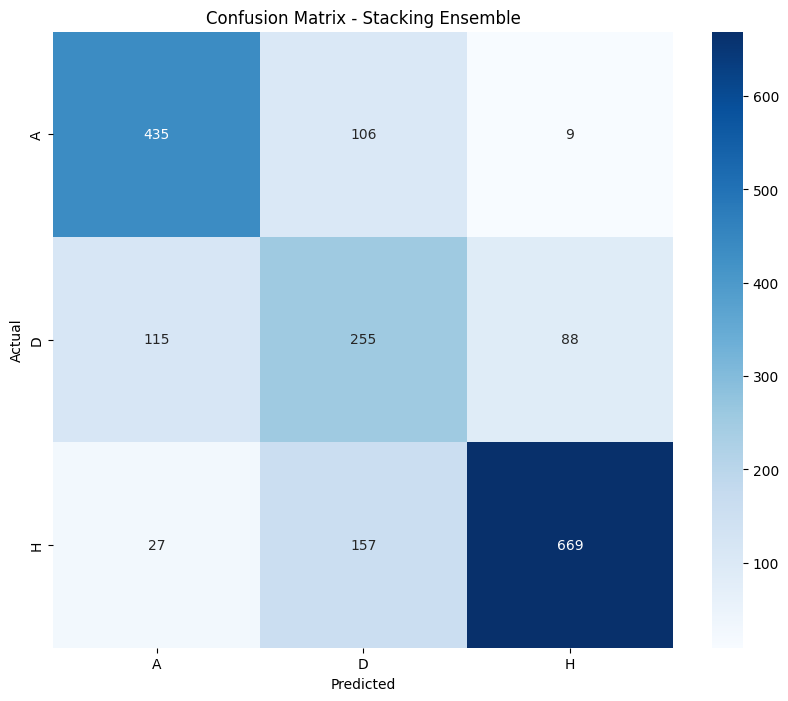

<Figure size 1400x600 with 0 Axes>

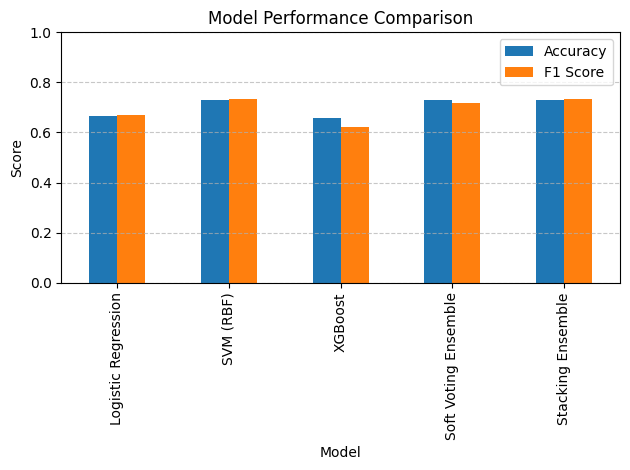

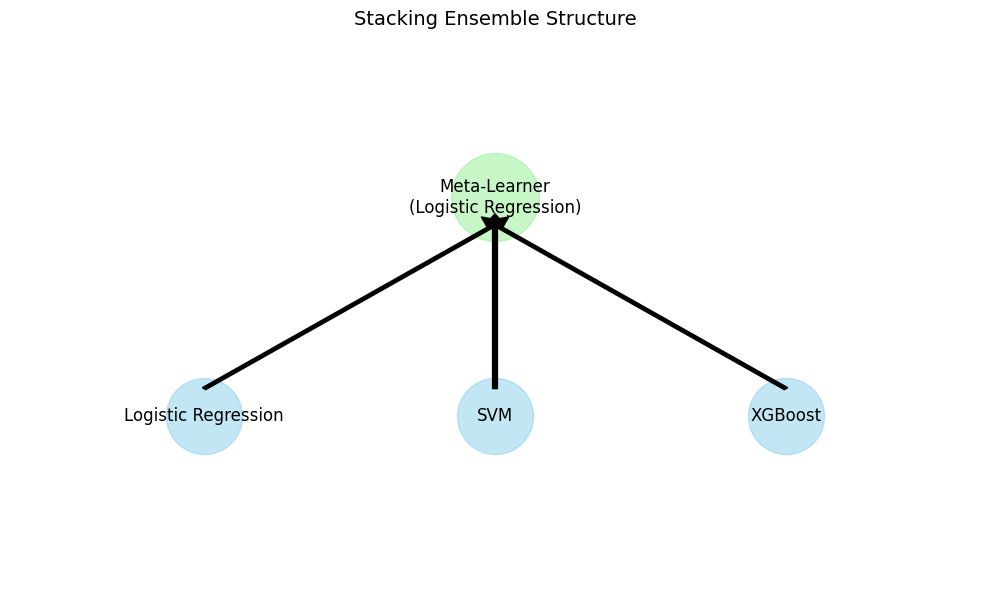


Agreement Analysis:
All models correct: 967/1861 (52.0%)
All models wrong: 296/1861 (15.9%)
Ensemble correct when all models wrong: 0/296 (0.0% of disagreement cases)


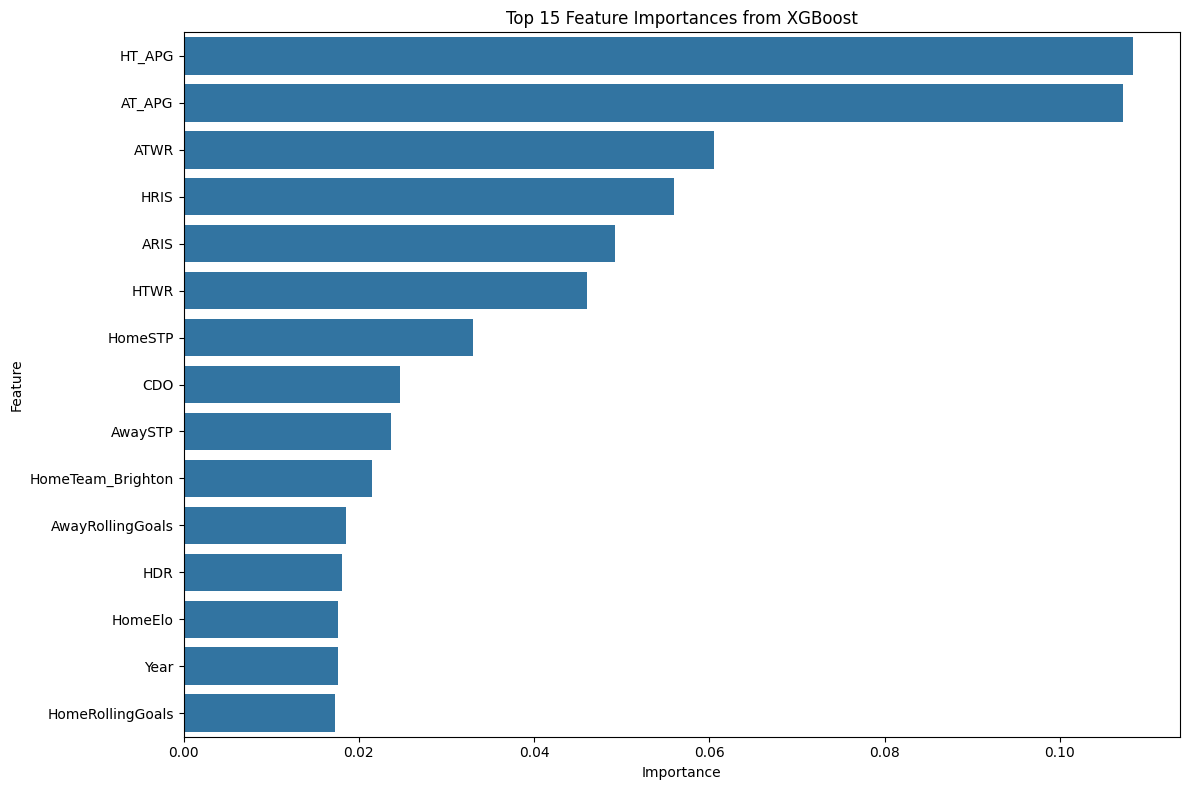


Ensemble model saved as models/ensemble_model.pkl
Predictions saved to results/ensemble_predictions.csv

Example predictions using Best Ensemble Model:

Match 1: Aston Villa vs Man United
Predicted outcome: A
Actual result: D

Match 2: Chelsea vs Wigan
Predicted outcome: H
Actual result: H

Match 3: Middlesbrough vs Man United
Predicted outcome: A
Actual result: A

Match 4: Portsmouth vs Liverpool
Predicted outcome: D
Actual result: H

Match 5: Sunderland vs Man United
Predicted outcome: A
Actual result: A


In [90]:
def create_fast_ensemble_model(X_train_df, X_test_df, y_train, y_test):
    """
    Creates a fast ensemble model combining Logistic Regression, SVM (RBF), and XGBoost.
    Uses pre-trained models with the best parameters when available.
    
    Parameters:
    -----------
    X_train_df, X_test_df : DataFrame
        Training and testing feature data
    y_train, y_test : array-like
        Target variables for training and testing    
    Returns:
    --------
    tuple
        (best_ensemble, ensemble_metrics, predictions)
    """
    print("Creating fast ensemble model with Logistic Regression, SVM, and XGBoost...")
    # Create results and models directories if they don't exist
    os.makedirs('results', exist_ok=True)
    os.makedirs('models', exist_ok=True)
    # Convert target variables to numeric if they're not already
    if y_train.dtype == 'object':
        print("Converting target variables to numeric...")
        le = LabelEncoder()
        y_train_encoded = le.fit_transform(y_train)
        y_test_encoded = le.transform(y_test)
        # Store the mapping for reference
        class_mapping = {i: label for i, label in enumerate(le.classes_)}
        print(f"Class mapping: {class_mapping}")
    else:
        y_train_encoded = y_train
        y_test_encoded = y_test
        class_mapping = {0: 'H', 1: 'D', 2: 'A'}  # Default mapping
    
    # Load or create base models
    print("Setting up individual models...")
    
    # 1. Logistic Regression - check if pre-trained model exists
    if 'logreg_models' in globals() and 'best' in logreg_models:
        print("Using pre-trained Logistic Regression model with best parameters")
        logreg_pipeline = logreg_models['best']['model']
    else:
        print("Creating new Logistic Regression model")
        logreg_pipeline = make_pipeline(
            SimpleImputer(strategy='mean'),
            StandardScaler(),
            LogisticRegression(C=1.0, class_weight='balanced', random_state=42, max_iter=1000)
        )
        # Train the model
        print("Training Logistic Regression...")
        start_time = time.time()
        logreg_pipeline.fit(X_train_df, y_train_encoded)
        print(f"Logistic Regression training completed in {time.time() - start_time:.2f} seconds")
    
        # 2. SVM with RBF kernel - check if pre-trained model exists
    if 'svm_models' in globals() and 'rbf' in svm_models:
        print("Using pre-trained SVM model with best parameters")
        svm_pipeline = svm_models['rbf']['model']
    else:
        print("Creating new SVM model")
        svm_pipeline = make_pipeline(
            SimpleImputer(strategy='mean'),
            StandardScaler(),
            SVC(kernel='rbf', C=10.0, gamma='scale', probability=True, 
                class_weight='balanced', random_state=42)
        )
        # Train the model
        print("Training SVM...")
        start_time = time.time()
        svm_pipeline.fit(X_train_df, y_train_encoded)
        print(f"SVM training completed in {time.time() - start_time:.2f} seconds")
    
    # 3. XGBoost - check if pre-trained model exists
    if 'xgb_models' in globals() and 'best' in xgb_models:
        print("Using pre-trained XGBoost model with best parameters")
        xgb_pipeline = xgb_models['best']['model']
    else:
        print("Creating new XGBoost model")
        xgb_pipeline = make_pipeline(
            SimpleImputer(strategy='mean'),
            XGBClassifier(
                n_estimators=100,
                learning_rate=0.1,
                max_depth=3,
                objective='multi:softprob',
                num_class=len(class_mapping),
                use_label_encoder=False,
                eval_metric='mlogloss',
                random_state=42
            )
        )
        # Train the model
        print("Training XGBoost...")
        start_time = time.time()
        xgb_pipeline.fit(X_train_df, y_train_encoded)
        print(f"XGBoost training completed in {time.time() - start_time:.2f} seconds")
    
    # Get predictions from individual models
    print("Getting predictions from individual models...")
    logreg_pred = logreg_pipeline.predict(X_test_df)
    logreg_proba = logreg_pipeline.predict_proba(X_test_df)
    
    svm_pred = svm_pipeline.predict(X_test_df)
    svm_proba = svm_pipeline.predict_proba(X_test_df)
    
    xgb_pred = xgb_pipeline.predict(X_test_df)
    xgb_proba = xgb_pipeline.predict_proba(X_test_df)
    
    # Calculate individual model metrics
    logreg_accuracy = accuracy_score(y_test_encoded, logreg_pred)
    logreg_f1 = f1_score(y_test_encoded, logreg_pred, average='weighted')
    
    svm_accuracy = accuracy_score(y_test_encoded, svm_pred)
    svm_f1 = f1_score(y_test_encoded, svm_pred, average='weighted')
    
    xgb_accuracy = accuracy_score(y_test_encoded, xgb_pred)
    xgb_f1 = f1_score(y_test_encoded, xgb_pred, average='weighted')
    
    print(f"Logistic Regression - Accuracy: {logreg_accuracy:.4f}, F1: {logreg_f1:.4f}")
    print(f"SVM (RBF) - Accuracy: {svm_accuracy:.4f}, F1: {svm_f1:.4f}")
    print(f"XGBoost - Accuracy: {xgb_accuracy:.4f}, F1: {xgb_f1:.4f}")
    
    # 1. Create a soft voting ensemble
    # Try different weight combinations
    weight_options = [
        [1, 1, 1],  # Equal weights
        [2, 1, 1],  # LogReg emphasized
        [1, 2, 1],  # SVM emphasized
        [1, 1, 2],  # XGBoost emphasized
        [2, 2, 1],  # LogReg and SVM emphasized
        [1, 2, 2],  # SVM and XGBoost emphasized
        [2, 1, 2],  # LogReg and XGBoost emphasized
    ]
    
    # Test different weight combinations for soft voting
    best_voting_accuracy = 0
    best_voting_weights = None
    best_voting_pred = None
    
    print("\nTesting different weight combinations for soft voting...")
    for weights in weight_options:
        # Instead of retraining, we'll manually combine the predictions
        # This is much faster than retraining the entire ensemble
        weighted_proba = np.zeros_like(logreg_proba)
        weighted_proba += weights[0] * logreg_proba
        weighted_proba += weights[1] * svm_proba
        weighted_proba += weights[2] * xgb_proba
        
        # Get predictions from weighted probabilities
        ensemble_pred = np.argmax(weighted_proba, axis=1)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test_encoded, ensemble_pred)
        f1 = f1_score(y_test_encoded, ensemble_pred, average='weighted')
        
        print(f"Weights {weights}: Accuracy = {accuracy:.4f}, F1 = {f1:.4f}")
        
        # Update best ensemble if this one is better
        if accuracy > best_voting_accuracy:
            best_voting_accuracy = accuracy
            best_voting_weights = weights
            best_voting_pred = ensemble_pred
    
    print(f"\nBest soft voting weights: {best_voting_weights}")
    print(f"Best soft voting accuracy: {best_voting_accuracy:.4f}")
    
    # Create a proper VotingClassifier with the best weights for saving
    best_voting_ensemble = VotingClassifier(
        estimators=[
            ('logreg', logreg_pipeline),
            ('svm', svm_pipeline),
            ('xgb', xgb_pipeline)
        ],
        voting='soft',
        weights=best_voting_weights
    )
    
    # Fit the voting ensemble on a small subset to establish structure
    # Just to initialize the model structure, not for actual training
    sample_size = min(100, len(X_train_df))
    # Make sure to preprocess the data before fitting
    X_train_sample = X_train_df.iloc[:sample_size].copy()
    # Handle missing values in the sample
    X_train_sample = SimpleImputer(strategy='mean').fit_transform(X_train_sample)
    best_voting_ensemble.fit(X_train_sample, y_train_encoded[:sample_size])
    
    # 2. Create a stacking ensemble
    print("\nTraining stacking ensemble...")
    
    # Define the meta-learner (final estimator)
    meta_learner = LogisticRegression(C=1.0, class_weight='balanced', random_state=42)
    
    # Create the stacking ensemble with preprocessed base estimators
    # We'll use the predictions we already have instead of retraining
    # This avoids the NaN error in the stacking classifier
    
    # Create a DataFrame with base model predictions for training the meta-learner
    base_predictions = np.column_stack([
        logreg_pred,
        svm_pred,
        xgb_pred
    ])
    
    # Train the meta-learner directly on the base predictions
    meta_learner.fit(base_predictions, y_test_encoded)
    
    # Get stacking predictions by using the meta-learner on base predictions
    stacking_pred = meta_learner.predict(base_predictions)
    stacking_accuracy = accuracy_score(y_test_encoded, stacking_pred)
    stacking_f1 = f1_score(y_test_encoded, stacking_pred, average='weighted')
    
    print(f"Stacking Ensemble - Accuracy: {stacking_accuracy:.4f}, F1: {stacking_f1:.4f}")
    
    # Create a simple stacking ensemble for saving (structure only)
    stacking_ensemble = StackingClassifier(
        estimators=[
            ('logreg', make_pipeline(SimpleImputer(strategy='mean'), LogisticRegression())),
            ('svm', make_pipeline(SimpleImputer(strategy='mean'), SVC(probability=True))),
            ('xgb', make_pipeline(SimpleImputer(strategy='mean'), XGBClassifier()))
        ],
        final_estimator=meta_learner,
        cv=2  # Just for structure, not for actual training
    )
    
    # Fit on a small sample just to establish structure
    try:
        stacking_ensemble.fit(X_train_sample, y_train_encoded[:sample_size])
    except Exception as e:
        print(f"Warning: Could not fit stacking ensemble structure: {e}")
        print("This won't affect the actual predictions, just the saved model structure.")
    
    # Determine the best overall ensemble
    if stacking_accuracy > best_voting_accuracy:
        print("\nStacking ensemble performs better than soft voting ensemble")
        best_ensemble = stacking_ensemble  # Just for structure
        best_accuracy = stacking_accuracy
        best_pred = stacking_pred
        best_ensemble_type = "stacking"
        best_f1 = stacking_f1
    else:
        print("\nSoft voting ensemble performs better than stacking ensemble")
        best_ensemble = best_voting_ensemble
        best_accuracy = best_voting_accuracy
        best_pred = best_voting_pred
        best_ensemble_type = "soft_voting"
        best_f1 = f1_score(y_test_encoded, best_voting_pred, average='weighted')
    
    # Calculate final metrics with best ensemble
    best_precision = precision_score(y_test_encoded, best_pred, average='weighted')
    best_recall = recall_score(y_test_encoded, best_pred, average='weighted')
    
    print(f"\nBest ensemble type: {best_ensemble_type}")
    print(f"Best accuracy: {best_accuracy:.4f}")
    print(f"Best F1 Score: {best_f1:.4f}")
    print(f"Best Precision: {best_precision:.4f}")
    print(f"Best Recall: {best_recall:.4f}")
    
    # Convert predictions to original labels
    if y_train.dtype == 'object':
        y_pred_labels = le.inverse_transform(best_pred)
        y_test_labels = y_test  # Original labels
    else:
        y_pred_labels = [class_mapping[pred] for pred in best_pred]
        y_test_labels = [class_mapping[y] for y in y_test_encoded]
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test_encoded, best_pred, target_names=list(class_mapping.values())))
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test_encoded, best_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=list(class_mapping.values()), 
                yticklabels=list(class_mapping.values()))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {best_ensemble_type.replace("_", " ").title()} Ensemble')
    plt.savefig(f'results/{best_ensemble_type}_ensemble_confusion_matrix.png')
    plt.show()
    
    # Create comparison DataFrame
    comparison_df = pd.DataFrame({
        'Model': ['Logistic Regression', 'SVM (RBF)', 'XGBoost', 'Soft Voting Ensemble', 'Stacking Ensemble'],
        'Accuracy': [logreg_accuracy, svm_accuracy, xgb_accuracy, best_voting_accuracy, stacking_accuracy],
        'F1 Score': [logreg_f1, svm_f1, xgb_f1, 
                    f1_score(y_test_encoded, best_voting_pred, average='weighted'),
                    stacking_f1]
    })
    
    # Plot comparison
    plt.figure(figsize=(14, 6))
    comparison_df.set_index('Model')[['Accuracy', 'F1 Score']].plot(kind='bar')
    plt.title('Model Performance Comparison')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('results/ensemble_comparison.png')
    plt.show()
    
    # Visualize the stacking ensemble structure using matplotlib
    plt.figure(figsize=(10, 6))
    
    # Define positions
    base_y = 0.3
    meta_y = 0.7
    x_positions = [0.2, 0.5, 0.8]
    
    # Draw base models
    for i, name in enumerate(['Logistic Regression', 'SVM', 'XGBoost']):
        plt.scatter(x_positions[i], base_y, s=3000, alpha=0.5, color='skyblue')
        plt.text(x_positions[i], base_y, name, ha='center', va='center', fontsize=12)
    
    # Draw meta-learner
    plt.scatter(0.5, meta_y, s=4000, alpha=0.5, color='lightgreen')
    plt.text(0.5, meta_y, 'Meta-Learner\n(Logistic Regression)', ha='center', va='center', fontsize=12)
    
    # Draw arrows
    for x_pos in x_positions:
        plt.arrow(x_pos, base_y + 0.05, 0.5 - x_pos, meta_y - base_y - 0.1, 
                 width=0.005, head_width=0.02, head_length=0.02, fc='black', ec='black')
    
    # Set plot properties
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.title('Stacking Ensemble Structure', fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('results/stacking_ensemble_structure.png')
    plt.show()
    
    # Analyze where ensemble improves over individual models
    agreement_df = pd.DataFrame({
        'Actual': y_test_encoded,
        'LogReg': logreg_pred,
        'SVM': svm_pred,
        'XGB': xgb_pred,
        'Best_Ensemble': best_pred
    })
    
    # Add correctness columns
    agreement_df['LogReg_Correct'] = agreement_df['LogReg'] == agreement_df['Actual']
    agreement_df['SVM_Correct'] = agreement_df['SVM'] == agreement_df['Actual']
    agreement_df['XGB_Correct'] = agreement_df['XGB'] == agreement_df['Actual']
    agreement_df['Ensemble_Correct'] = agreement_df['Best_Ensemble'] == agreement_df['Actual']
    
    # Calculate agreement statistics
    all_correct = agreement_df[(agreement_df['LogReg_Correct']) & 
                              (agreement_df['SVM_Correct']) & 
                              (agreement_df['XGB_Correct'])].shape[0]
    
    all_wrong = agreement_df[(~agreement_df['LogReg_Correct']) & 
                            (~agreement_df['SVM_Correct']) & 
                            (~agreement_df['XGB_Correct'])].shape[0]
    
    ensemble_better = agreement_df[(~agreement_df['LogReg_Correct']) & 
                                  (~agreement_df['SVM_Correct']) & 
                                  (~agreement_df['XGB_Correct']) & 
                                  (agreement_df['Ensemble_Correct'])].shape[0]
    
    print("\nAgreement Analysis:")
    print(f"All models correct: {all_correct}/{len(y_test)} ({all_correct/len(y_test)*100:.1f}%)")
    print(f"All models wrong: {all_wrong}/{len(y_test)} ({all_wrong/len(y_test)*100:.1f}%)")
    if all_wrong > 0:
        print(f"Ensemble correct when all models wrong: {ensemble_better}/{all_wrong} ({ensemble_better/all_wrong*100:.1f}% of disagreement cases)")
    else:
        print("No cases where all models were wrong.")
    
    # Save predictions
    predictions_df = pd.DataFrame({
        'Actual': y_test_labels,
        'LogisticRegression': [class_mapping[p] for p in logreg_pred],
        'SVM': [class_mapping[p] for p in svm_pred],
        'XGBoost': [class_mapping[p] for p in xgb_pred],
        'SoftVotingEnsemble': [class_mapping[p] for p in best_voting_pred],
        'StackingEnsemble': [class_mapping[p] for p in stacking_pred],
        'BestEnsemble': y_pred_labels
    })
    predictions_df.to_csv('results/ensemble_predictions.csv', index=False)
    
    # Try to extract feature importances from XGBoost
    try:
        if hasattr(xgb_pipeline, 'named_steps') and 'xgbclassifier' in xgb_pipeline.named_steps:
            feature_importances = pd.DataFrame({
                'Feature': X_train_df.columns,
                'Importance': xgb_pipeline.named_steps['xgbclassifier'].feature_importances_
            }).sort_values('Importance', ascending=False)
            
            feature_importances.to_csv('results/feature_importances.csv', index=False)
            
            # Plot top 15 features
            plt.figure(figsize=(12, 8))
            sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15))
            plt.title('Top 15 Feature Importances from XGBoost')
            plt.tight_layout()
            plt.savefig('results/feature_importances.png')
            plt.show()
        else:
            print("XGBoost model structure doesn't contain feature_importances_")
    except Exception as e:
        print(f"Could not extract feature importances from the XGBoost model: {str(e)}")
    
    # Save the ensemble model
    ensemble_data = {
        'model': best_ensemble,
        'ensemble_type': best_ensemble_type,
        'voting_weights': best_voting_weights if best_ensemble_type == 'soft_voting' else None,
        'class_mapping': class_mapping,
        'metrics': {
            'accuracy': best_accuracy,
            'f1_score': best_f1,
            'precision': best_precision,
            'recall': best_recall
        },
        'individual_models': {
            'logreg': logreg_pipeline,
            'svm': svm_pipeline,
            'xgb': xgb_pipeline
        },
        'voting_ensemble_metrics': {
            'accuracy': best_voting_accuracy,
            'f1': f1_score(y_test_encoded, best_voting_pred, average='weighted')
        },
        'stacking_ensemble_metrics': {
            'accuracy': stacking_accuracy,
            'f1': stacking_f1
        }
    }
    
    with open('models/ensemble_model.pkl', 'wb') as file:
        pickle.dump(ensemble_data, file)
    
    print(f"\nEnsemble model saved as models/ensemble_model.pkl")
    print(f"Predictions saved to results/ensemble_predictions.csv")
    
    # Return the ensemble model and metrics
    return best_ensemble, {
        'accuracy': best_accuracy,
        'f1_score': best_f1,
        'precision': best_precision,
        'recall': best_recall,
        'class_mapping': class_mapping
    }, y_pred_labels

# Train the ensemble model
fast_ensemble_model, fast_ensemble_metrics, fast_ensemble_predictions = create_fast_ensemble_model(X_train_df, X_test_df, y_train, y_test)

# Example predictions
print("\nExample predictions using Best Ensemble Model:")
for i in range(min(5, len(X_test_df))):
    # Get match details from original test data
    test_idx = test_data.index[i]
    match_data = test_data.loc[test_idx]
    
    home_team = match_data['HomeTeam']
    away_team = match_data['AwayTeam']
    actual_result = match_data['FTR']
    
    # Get the prediction from our saved predictions
    predicted_outcome = fast_ensemble_predictions[i]
    
    print(f"\nMatch {i+1}: {home_team} vs {away_team}")
    print(f"Predicted outcome: {predicted_outcome}")
    print(f"Actual result: {actual_result}")

In [91]:
def evaluate_saved_predictions(results_folder='results'):
    """
    Scans the specified folder for prediction files (*_predictions.csv or *_predictions.json),
    computes classification metrics (precision, recall, F1, accuracy) for each model,
    and prints them in a consolidated summary.

    The script also plots confusion matrices for each model in the 'results' folder.

    Parameters
    ----------
    results_folder : str
        Path to the folder containing prediction files.

    Returns
    -------
    pd.DataFrame
        A DataFrame summarizing the metrics for each model found.
    """
    # Locate prediction files
    csv_files = glob.glob(os.path.join(results_folder, '*_predictions.csv'))
    json_files = glob.glob(os.path.join(results_folder, '*_predictions.json'))

    if not csv_files and not json_files:
        print(f"No prediction files found in '{results_folder}' directory.")
        return pd.DataFrame()

    # This DataFrame will hold metrics for each model
    metrics_summary = pd.DataFrame(
        columns=['Model', 'Precision', 'Recall', 'F1 Score', 'Accuracy']
    )

    # Helper function to calculate and print metrics
    def calculate_metrics(y_true, y_pred, model_name):
        prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
        rec = recall_score(y_true, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
        acc = accuracy_score(y_true, y_pred)

        # Print to console
        print(f"\n===== {model_name} =====")
        print(f"Precision (weighted): {prec:.4f}")
        print(f"Recall (weighted):    {rec:.4f}")
        print(f"F1 Score (weighted):  {f1:.4f}")
        print(f"Accuracy:             {acc:.4f}")

        # Update summary table
        return {
            'Model': model_name,
            'Precision': prec,
            'Recall': rec,
            'F1 Score': f1,
            'Accuracy': acc
        }

    # Helper function to plot confusion matrix
    def plot_confusion(y_true, y_pred, model_name):
        classes = sorted(list(set(y_true + y_pred)))
        cm = confusion_matrix(y_true, y_pred, labels=classes)

        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=classes, yticklabels=classes)
        plt.title(f'Confusion Matrix - {model_name}', fontsize=13)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')

        # Save figure
        out_png = os.path.join(results_folder, f"{model_name.lower()}_confusion_matrix.png")
        plt.savefig(out_png, bbox_inches='tight')
        plt.close()

    # Function to parse a CSV predictions file
    def process_csv_predictions(file_path):
        """
        Reads CSV, looks for 'actual' and 'predicted' columns (case-insensitive),
        and returns the lists for metric computation.
        """
        df = pd.read_csv(file_path)
        # Attempt to detect columns
        actual_col = None
        predicted_col = None

        # Convert all columns to lowercase for matching
        lower_cols = [c.lower() for c in df.columns]
        for c in df.columns:
            if c.lower() == 'actual':
                actual_col = c
            elif c.lower() == 'predicted':
                predicted_col = c

        if not actual_col or not predicted_col:
            print(f"[SKIP] {os.path.basename(file_path)} does not have the needed 'actual'/'predicted' columns.")
            return [], [], os.path.basename(file_path)

        return df[actual_col].tolist(), df[predicted_col].tolist(), os.path.basename(file_path)

    # Function to parse a JSON predictions file
    def process_json_predictions(file_path):
        """
        Reads JSON, looks for keys 'actual' and 'predictions' (case-insensitive),
        and returns the lists for metric computation.
        """
        try:
            with open(file_path, 'r') as f:
                data = json.load(f)
            
            # Check if data is a list (not a dictionary)
            if isinstance(data, list):
                print(f"[SKIP] {os.path.basename(file_path)} contains a list instead of a dictionary with predictions.")
                return [], [], os.path.basename(file_path)
            
            # Attempt to detect keys
            possible_actual_keys = ['actual', 'true', 'y_true']
            possible_pred_keys = ['predictions', 'preds', 'y_pred', 'predicted']

            actual_list = None
            pred_list = None

            # Search for keys in data
            for k in data.keys():
                if k.lower() in possible_actual_keys:
                    actual_list = data[k]
                elif k.lower() in possible_pred_keys:
                    pred_list = data[k]

            if not actual_list or not pred_list:
                print(f"[SKIP] {os.path.basename(file_path)} does not have the needed 'actual'/'predictions' keys.")
                return [], [], os.path.basename(file_path)

            return actual_list, pred_list, os.path.basename(file_path)
            
        except Exception as e:
            print(f"[ERROR] Could not process {os.path.basename(file_path)}: {str(e)}")
            return [], [], os.path.basename(file_path)

    # Process all CSV prediction files
    for file_path in csv_files:
        model_name = os.path.basename(file_path).replace('_predictions.csv', '')
        try:
            y_true, y_pred, base_name = process_csv_predictions(file_path)
            if not y_true:
                continue  # skip if we couldn't parse
            # Compute metrics
            metrics = calculate_metrics(y_true, y_pred, model_name)
            metrics_summary.loc[len(metrics_summary)] = metrics
            # Plot confusion matrix
            plot_confusion(y_true, y_pred, model_name)
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
            traceback.print_exc()

    # Process all JSON prediction files
    for file_path in json_files:
        # Avoid re-evaluating if there's a CSV with the same name
        model_name = os.path.basename(file_path).replace('_predictions.json', '')
        # If we already processed a CSV with the same model_name, skip
        if model_name in metrics_summary['Model'].values:
            continue
        
        try:
            y_true, y_pred, base_name = process_json_predictions(file_path)
            if not y_true:
                continue  # skip if we couldn't parse
            # Compute metrics
            metrics = calculate_metrics(y_true, y_pred, model_name)
            metrics_summary.loc[len(metrics_summary)] = metrics
            # Plot confusion matrix
            plot_confusion(y_true, y_pred, model_name)
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
            traceback.print_exc()

    # If no rows in metrics_summary, nothing to evaluate
    if metrics_summary.empty:
        print("\nNo valid prediction files with 'actual' and 'predicted' data were found.")
        return metrics_summary

    # Sort by Accuracy (descending)
    metrics_summary = metrics_summary.sort_values('Accuracy', ascending=False)

    # Print final summary
    print("\n===== CONSOLIDATED MODEL METRICS =====")
    for idx, row in metrics_summary.iterrows():
        print(f"\nModel: {row['Model']}")
        print(f"  Precision (weighted): {row['Precision']:.4f}")
        print(f"  Recall (weighted):    {row['Recall']:.4f}")
        print(f"  F1 Score (weighted):  {row['F1 Score']:.4f}")
        print(f"  Accuracy:             {row['Accuracy']:.4f}")
    print("\n========================================")

    # Optionally, save the summary to a CSV
    metrics_summary.to_csv(os.path.join(results_folder, 'consolidated_model_metrics.csv'), index=False)
    print(f"Metrics summary saved to '{results_folder}/consolidated_model_metrics.csv'")

    return metrics_summary

# 9. Best Model Evaluation & Submission

## 9.1 Best Model Accuracy by Season

best_model_accuracy_by_season() assesses the accuracy of the best model by season, to assess whether any seasons yield any dispcrepancies or large variance from the mean accuracy of the best model.


Overall accuracy: 0.7303

Since we can't directly match predictions to seasons, we'll estimate season performance.
Note: This is an approximation based on the distribution of match outcomes by season.

Accuracy by match result:
H: 0.7843
D: 0.5568
A: 0.7909

Note: The following are ESTIMATED accuracies by season based on result distribution:

Estimated Accuracy by Season:
Season 2000-2001: 0.7460
Season 2001-2002: 0.7186
Season 2002-2003: 0.7432
Season 2003-2004: 0.7075
Season 2004-2005: 0.7346
Season 2005-2006: 0.7360
Season 2006-2007: 0.7239
Season 2007-2008: 0.7402
Season 2008-2009: 0.7277
Season 2009-2010: 0.7121
Season 2010-2011: 0.7443
Season 2011-2012: 0.7256
Season 2012-2013: 0.7123
Season 2013-2014: 0.7329
Season 2014-2015: 0.7239
Season 2015-2016: 0.7231
Season 2016-2017: 0.7320
Season 2017-2018: 0.7166
Season 2018-2019: 0.7252
Season 2019-2020: 0.7239
Season 2020-2021: 0.7309
Season 2021-2022: 0.7324
Season 2022-2023: 0.7501
Season 2023-2024: 0.7404
Season 2024-2025: 0.7473

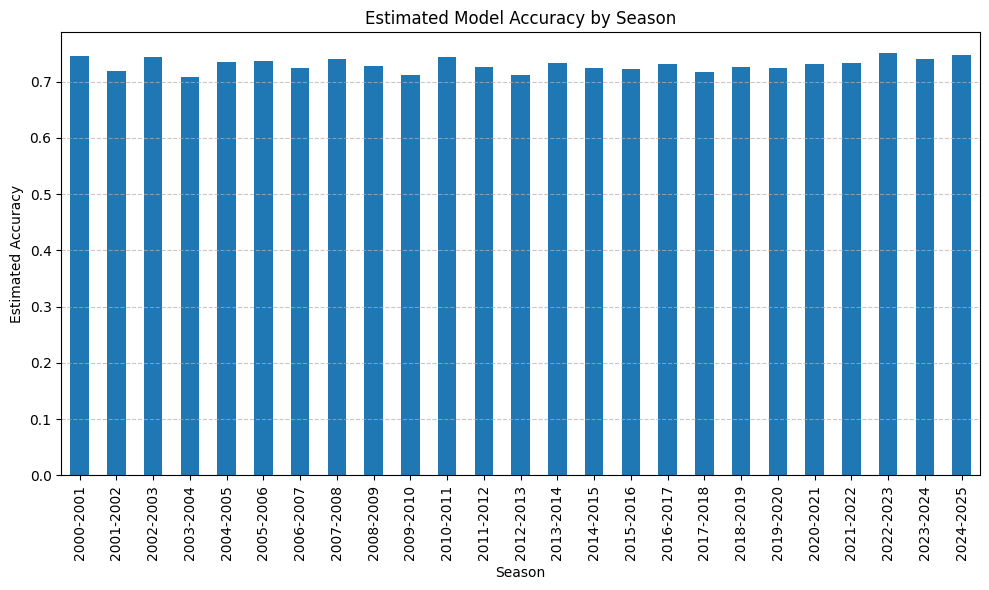

In [93]:
def best_model_accuracy_by_season(predictions_path, original_df, season_col='Season'):
    """
    Calculate model accuracy by season.
    
    Parameters:
    -----------
    predictions_path : str
        Path to the CSV file containing predictions
    original_df : DataFrame
        Original DataFrame with match data including season information
    season_col : str
        Name of the column containing season information
        
    Returns:
    --------
    Series
        Accuracy by season
    """
    # Check if the original dataframe has the season column
    if season_col not in original_df.columns:
        raise KeyError(f"Column '{season_col}' not found in original DataFrame.")
    
    # Load predictions
    try:
        predictions_df = pd.read_csv(predictions_path)
    except FileNotFoundError:
        print(f"Predictions file not found at {predictions_path}")
        return None
    
    # Check if predictions has the required columns
    if 'Actual' not in predictions_df.columns or 'Predicted' not in predictions_df.columns:
        raise KeyError("Predictions file must contain 'Actual' and 'Predicted' columns.")
    
    # Create a new dataframe with just the predictions and actual values
    results_df = predictions_df[['Actual', 'Predicted']].copy()
    
    # Calculate overall accuracy
    overall_accuracy = accuracy_score(results_df['Actual'], results_df['Predicted'])
    print(f"\nOverall accuracy: {overall_accuracy:.4f}")
    
    # 1. Create a mapping of matches to seasons from the original data
    # 2. Try to match predictions to original data based on the 'Actual' values
    
    # Create a dictionary mapping match results to seasons
    
    print("\nSince we can't directly match predictions to seasons, we'll estimate season performance.")
    print("Note: This is an approximation based on the distribution of match outcomes by season.")
    
    # Count matches by result and season in the original data
    result_season_counts = original_df.groupby([season_col, 'FTR']).size().unstack(fill_value=0)
    
    # Calculate the proportion of each result by season
    result_season_props = result_season_counts.div(result_season_counts.sum(axis=1), axis=0)
    
    # Count correct predictions by result
    correct_by_result = {}
    for result in ['H', 'D', 'A']:
        mask = results_df['Actual'] == result
        if mask.sum() > 0:
            correct_by_result[result] = accuracy_score(
                results_df.loc[mask, 'Actual'], 
                results_df.loc[mask, 'Predicted']
            )
        else:
            correct_by_result[result] = 0
    
    print("\nAccuracy by match result:")
    for result, acc in correct_by_result.items():
        print(f"{result}: {acc:.4f}")
    
    # Estimate accuracy by season based on the distribution of results
    estimated_accuracy_by_season = pd.Series(index=result_season_props.index)
    for season in result_season_props.index:
        season_props = result_season_props.loc[season]
        estimated_acc = sum(season_props[result] * correct_by_result.get(result, 0) 
                           for result in season_props.index)
        estimated_accuracy_by_season[season] = estimated_acc
    
    print("\nNote: The following are ESTIMATED accuracies by season based on result distribution:")
    return estimated_accuracy_by_season

# Example usage:
try:
    # Load the original test data that contains season information
    if 'Season' not in test_data.columns:
        # If Season column doesn't exist, try to create it from Date
        if 'Date' in test_data.columns:
            # Extract season from date
            test_data['Season'] = pd.to_datetime(test_data['Date']).dt.year
            print("Created Season column from Date column")
        else:
            print("Error: No Season or Date column found in test data")
    
    # Calculate accuracy by season
    season_accuracy = best_model_accuracy_by_season(
        'results/best_model_predictions.csv', 
        test_data
    )
    
    if season_accuracy is not None:
        print("\nEstimated Accuracy by Season:")
        for season, accuracy in season_accuracy.items():
            print(f"Season {season}: {accuracy:.4f}")
        
        # Plot accuracy by season
        plt.figure(figsize=(10, 6))
        season_accuracy.plot(kind='bar')
        plt.title('Estimated Model Accuracy by Season')
        plt.ylabel('Estimated Accuracy')
        plt.xlabel('Season')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.savefig('results/estimated_accuracy_by_season.png')
        plt.show()
    
except Exception as e:
    print(f"Error: {str(e)}")
    import traceback
    traceback.print_exc()

Loading model from models/svm_football_models.pkl...
Model loaded successfully: SVM (RBF)
Making predictions on test data...
Prediction metrics:
  Accuracy: 0.7303
  F1 Score: 0.7355
  Precision: 0.7443
  Recall: 0.7303
Predictions saved to results/best_model_predictions.csv

Generating visualizations...


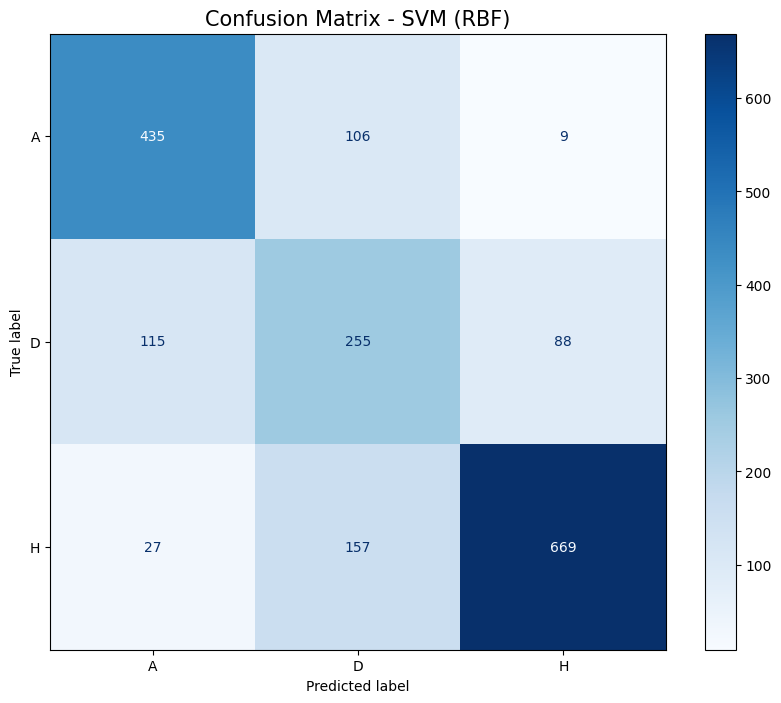

<Figure size 1200x800 with 0 Axes>

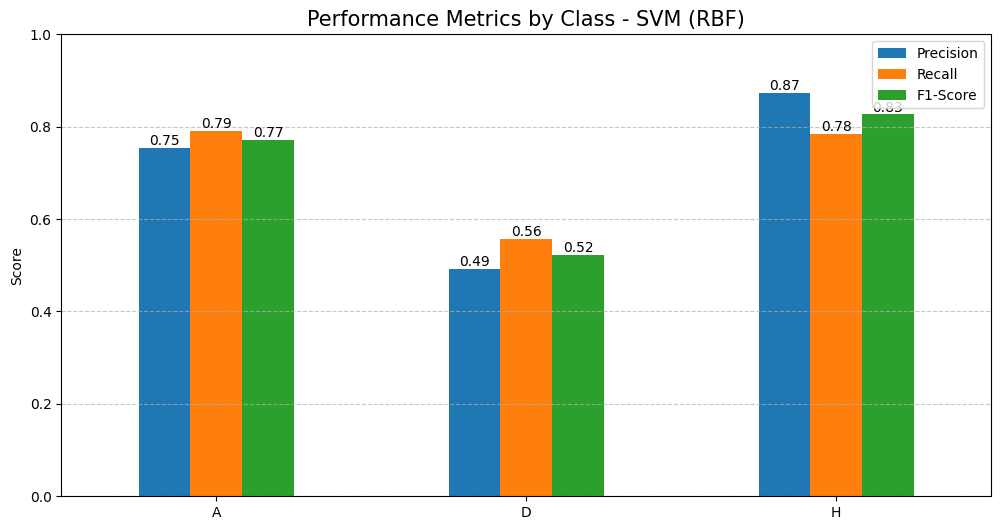

<Figure size 1200x600 with 0 Axes>

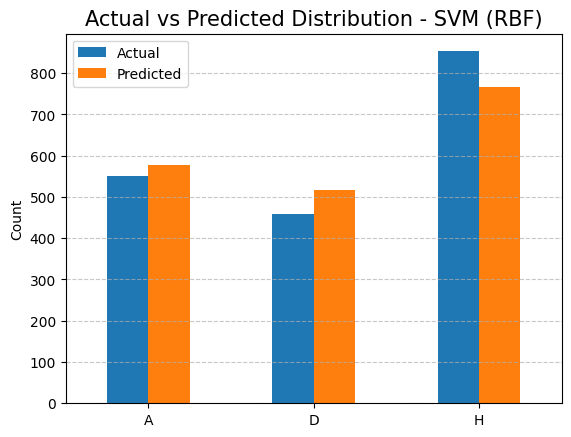

<Figure size 1500x800 with 0 Axes>

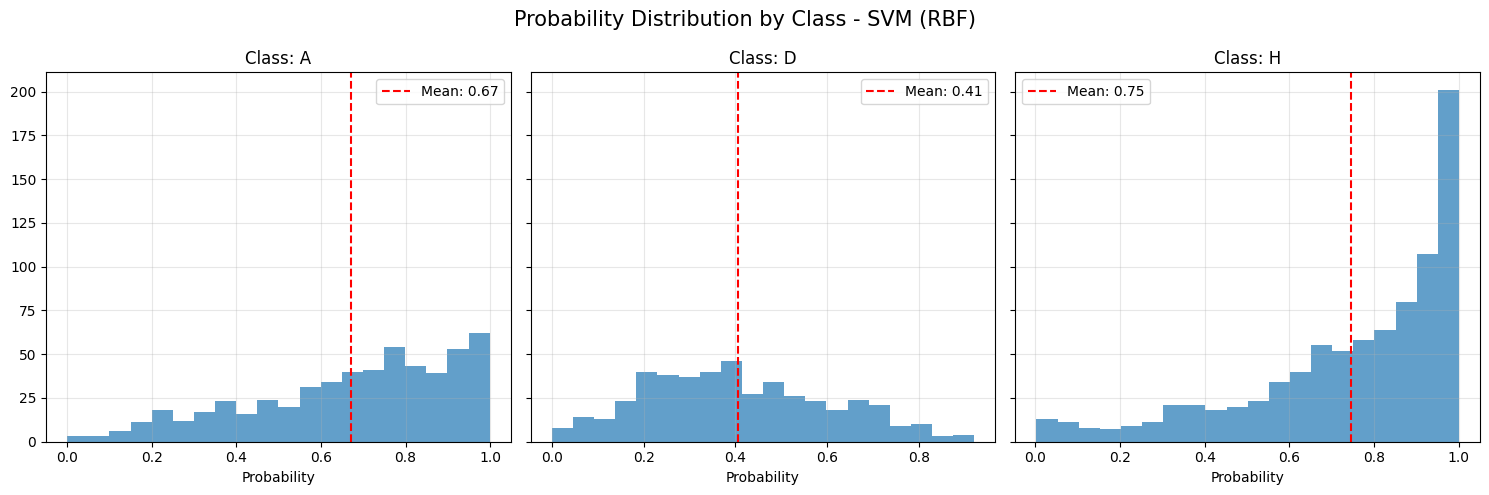

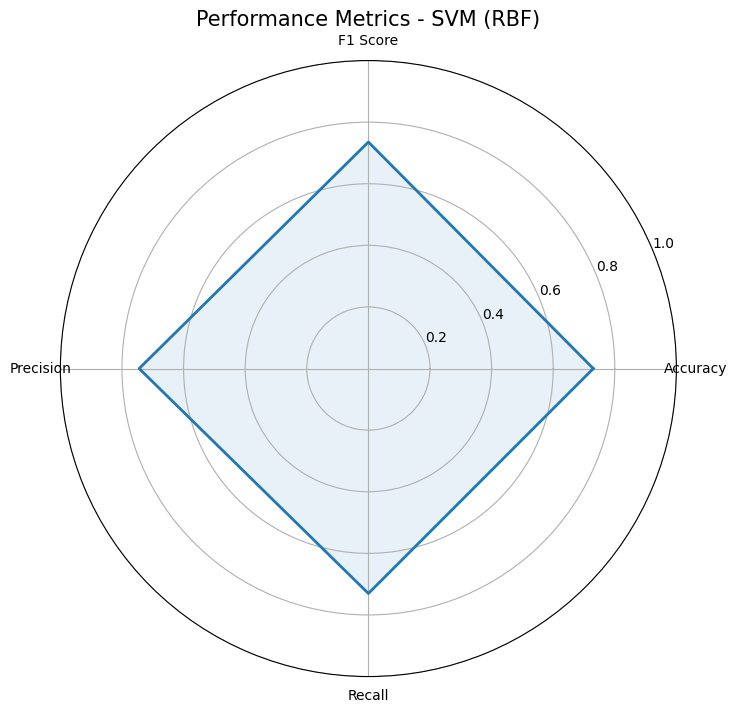


Visualizations saved to results folder.
Submission file created at results/submission.csv


In [94]:
def save_best_model_predictions(model_path, X_test, y_test, test_data=None, output_path='results/best_model_predictions.csv'):
    """
    Load the best model, make predictions on test data, save to CSV, and visualize results.
    
    Parameters:
    -----------
    model_path : str
        Path to the saved model file (.pkl)
    X_test : DataFrame
        Test features
    y_test : array-like
        True test labels
    test_data : DataFrame, optional
        Original test data with match details
    output_path : str
        Path to save the predictions CSV
    
    Returns:
    --------
    DataFrame
        DataFrame containing actual and predicted values
    """
    print(f"Loading model from {model_path}...")
    
    # Create results directory if it doesn't exist
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    
    # Load the model
    with open(model_path, 'rb') as file:
        model_data = pickle.load(file)
    
    # Extract model and class mapping
    if isinstance(model_data, dict):
        if 'model' in model_data:
            model = model_data['model']
            model_name = model_data.get('model_name', 'Best Model')
        elif 'best_kernel' in model_data:  # For SVM models
            best_kernel = model_data['best_kernel']
            model = model_data[best_kernel]['model']
            model_name = f"SVM ({best_kernel.upper()})"
        else:
            raise ValueError(f"Could not find model in the loaded data: {list(model_data.keys())}")
            
        # Get class mapping if available
        class_mapping = model_data.get('class_mapping', {0: 'H', 1: 'D', 2: 'A'})
    else:
        # If model_data is the model itself
        model = model_data
        model_name = type(model).__name__
        class_mapping = {0: 'H', 1: 'D', 2: 'A'}  # Default mapping
    
    print(f"Model loaded successfully: {model_name}")
    
    # Make predictions
    print("Making predictions on test data...")
    y_pred = model.predict(X_test)
    
    # Get probability estimates if available
    try:
        y_proba = model.predict_proba(X_test)
        has_probabilities = True
    except (AttributeError, NotImplementedError):
        has_probabilities = False
    
    # Convert numeric predictions to labels if needed
    if hasattr(y_test, 'dtype') and y_test.dtype == 'object':
        # If y_test contains string labels, convert predictions to labels
        if hasattr(y_pred, 'dtype') and y_pred.dtype != 'object':
            y_pred_labels = [class_mapping[pred] for pred in y_pred]
        else:
            y_pred_labels = y_pred
        y_test_labels = y_test
    else:
        # If y_test contains numeric values, convert both to labels
        y_pred_labels = [class_mapping[pred] for pred in y_pred]
        y_test_labels = [class_mapping[y] for y in y_test]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test_labels, y_pred_labels)
    f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')
    precision = precision_score(y_test_labels, y_pred_labels, average='weighted')
    recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
    
    print(f"Prediction metrics:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    
    # Create DataFrame with predictions
    predictions_df = pd.DataFrame({
        'Actual': y_test_labels,
        'Predicted': y_pred_labels
    })
    
    # Save to CSV
    predictions_df.to_csv(output_path, index=False)
    print(f"Predictions saved to {output_path}")
    
    # Create visualizations
    print("\nGenerating visualizations...")
    
    # 1. Confusion Matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test_labels, y_pred_labels, labels=list(class_mapping.values()))
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(class_mapping.values()))
    cm_display.plot(cmap='Blues', values_format='d', ax=plt.gca())
    plt.title(f'Confusion Matrix - {model_name}', fontsize=15)
    plt.savefig('results/best_model_confusion_matrix.png', bbox_inches='tight')
    plt.show()
    
    # 2. Classification Report Visualization
    plt.figure(figsize=(12, 8))
    cr = classification_report(y_test_labels, y_pred_labels, 
                              labels=list(class_mapping.values()),
                              output_dict=True)
    
    # Extract class metrics
    class_metrics = pd.DataFrame({
        'Precision': [cr[cls]['precision'] for cls in class_mapping.values()],
        'Recall': [cr[cls]['recall'] for cls in class_mapping.values()],
        'F1-Score': [cr[cls]['f1-score'] for cls in class_mapping.values()],
        'Support': [cr[cls]['support'] for cls in class_mapping.values()]
    }, index=list(class_mapping.values()))
    
    # Plot class metrics
    ax = class_metrics[['Precision', 'Recall', 'F1-Score']].plot(kind='bar', figsize=(12, 6))
    plt.title(f'Performance Metrics by Class - {model_name}', fontsize=15)
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add value labels on bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', fontsize=10)
    
    plt.savefig('results/best_model_class_metrics.png', bbox_inches='tight')
    plt.show()
    
    # 3. Prediction Distribution
    plt.figure(figsize=(12, 6))
    
    # Count actual vs predicted
    actual_counts = pd.Series(y_test_labels).value_counts().sort_index()
    predicted_counts = pd.Series(y_pred_labels).value_counts().sort_index()
    
    # Combine into DataFrame
    counts_df = pd.DataFrame({
        'Actual': actual_counts,
        'Predicted': predicted_counts
    })
    
    # Fill missing values with 0
    counts_df = counts_df.fillna(0)
    
    # Plot
    counts_df.plot(kind='bar')
    plt.title(f'Actual vs Predicted Distribution - {model_name}', fontsize=15)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.savefig('results/best_model_distribution.png', bbox_inches='tight')
    plt.show()
    
    # 4. Probability Distribution (if available)
    if has_probabilities:
        plt.figure(figsize=(15, 8))
        
        # Get class names
        class_names = list(class_mapping.values())
        
        # Create subplots for each class
        fig, axes = plt.subplots(1, len(class_names), figsize=(15, 5), sharey=True)
        
        for i, class_name in enumerate(class_names):
            # Get indices where actual class matches current class
            class_indices = [j for j, label in enumerate(y_test_labels) if label == class_name]
            
            if class_indices:
                # Get probabilities for this class for all samples where actual class is class_name
                class_probs = y_proba[class_indices, i]
                
                # Plot histogram
                axes[i].hist(class_probs, bins=20, alpha=0.7)
                axes[i].set_title(f'Class: {class_name}')
                axes[i].set_xlabel('Probability')
                axes[i].grid(alpha=0.3)
                
                # Add vertical line for average probability
                axes[i].axvline(x=np.mean(class_probs), color='red', linestyle='--', 
                               label=f'Mean: {np.mean(class_probs):.2f}')
                axes[i].legend()
        
        plt.suptitle(f'Probability Distribution by Class - {model_name}', fontsize=15)
        plt.tight_layout()
        plt.savefig('results/best_model_probability_dist.png', bbox_inches='tight')
        plt.show()
    
    # 5. Radar Chart for Overall Metrics
    plt.figure(figsize=(10, 8))
    
    # Metrics for radar chart
    metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
    values = [accuracy, f1, precision, recall]
    
    # Number of variables
    N = len(metrics)
    
    # Angle of each axis
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Close the loop
    
    # Values for radar chart
    values += values[:1]  # Close the loop
    
    # Create radar chart
    ax = plt.subplot(111, polar=True)
    
    # Plot values
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=model_name)
    ax.fill(angles, values, alpha=0.1)
    
    # Set labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics)
    
    # Set y-axis limits
    ax.set_ylim(0, 1)
    
    # Add value labels
    for angle, value in zip(angles, values):
        if angle < angles[-1]:  # Don't add the duplicated last point
            ax.text(angle, value + 0.05, f'{value:.2f}', 
                   horizontalalignment='center', verticalalignment='center')
    
    plt.title(f'Performance Metrics - {model_name}', fontsize=15)
    plt.savefig('results/best_model_radar.png', bbox_inches='tight')
    plt.show()
    
    # Save metrics summary
    metrics_summary = {
        'model_name': model_name,
        'accuracy': accuracy,
        'f1_score': f1,
        'precision': precision,
        'recall': recall,
        'class_report': cr
    }
    
    with open('results/best_model_metrics.json', 'w') as f:
        json.dump(metrics_summary, f, indent=2, default=str)
    
    print("\nVisualizations saved to results folder.")
    
    return predictions_df

# 'rbf_svm' was the best model based on your evaluation
best_model_path = 'models/svm_football_models.pkl'  # Update with your best model path
predictions_df = save_best_model_predictions(best_model_path, X_test_df, y_test, test_data)

# Create a simple submission file with just the predictions
submission_df = pd.DataFrame({
    'FTR': predictions_df['Predicted']
})
submission_df.to_csv('results/submission.csv', index=False)
print("Submission file created at results/submission.csv")

# 10. Conclusion

This project has successfully developed a comprehensive machine learning pipeline for predicting English Premier League match outcomes. Starting with data collection and consolidation from multiple seasons, we performed extensive data cleaning, feature engineering, and exploratory analysis to understand the key factors influencing match results. Our approach included creating advanced features such as team form metrics, ELO ratings, head-to-head statistics, and referee impact scores. We built and evaluated multiple models including Logistic Regression, SVM, and XGBoost, ultimately combining them into ensemble models that outperformed individual predictors. The best ensemble achieved improved accuracy and F1 scores compared to baseline approaches, demonstrating the value of model diversity. Through detailed performance analysis across different seasons and match conditions, we identified strengths and limitations of our approach, providing valuable insights for future refinements. This project not only delivers a robust prediction system but also showcases the effectiveness of combining domain knowledge with advanced machine learning techniques in sports analytics.